# IMPORTING LIBRARIES

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
#Loading file into df
df = pd.read_csv('Train.csv')

# Gaining basic Insights from the data and Data Cleansing

In [3]:
#Reading the top 5 rows of the dataset
df.head(5)

id                                            name    host_id  \
0   5728806                    Large private room in Nolita    4271676   
1   2243769              Super Bowl New York City Apartment   11460768   
2  35515415  COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION  267193767   
3  36202006    Stream-Pressed Paradise (Laundry Room Setup)   43392243   
4   3780951                       Charming Harlem apartment   16065171   

  host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0       Nat           Manhattan           Nolita  40.72217  -73.99481   
1     Brian           Manhattan  Upper West Side  40.80020  -73.96045   
2     Jenny              Queens    East Elmhurst  40.75558  -73.89316   
3      Rita       Staten Island          Concord  40.60110  -74.07830   
4      Gina           Manhattan           Harlem  40.81022  -73.94266   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    120               7                  3  2015-09-01   
1  Entire home/apt   1500               1                  0         NaN   
2  Entire home/apt    200               2                  4  2019-07-05   
3      Shared room     30               2                  0         NaN   
4      Shared room    115               1                 16  2019-05-26   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.06                               3                 0  
1                NaN                               1                 0  
2               4.00                               1               365  
3                NaN                               4                82  
4               0.27                               1               365

In [4]:
#Checking the dimensions of the dataset
df.shape

(34226, 16)

In [5]:
#Checking datatypes
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**8 numerical columns and 5 categorical columns**

In [6]:
#Ananlysing basic statistical details
df.describe()

id       host_id      latitude     longitude         price  \
count  3.422600e+04  3.422600e+04  34226.000000  34226.000000  34226.000000   
mean   1.898209e+07  6.733847e+07     40.729059    -73.952070    153.480979   
std    1.097597e+07  7.833091e+07      0.054604      0.046161    243.312608   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.460366e+06  7.824440e+06     40.690040    -73.983150     69.000000   
50%    1.965371e+07  3.065628e+07     40.722995    -73.955700    107.000000   
75%    2.908201e+07  1.074344e+08     40.763200    -73.935982    175.000000   
max    3.648724e+07  2.743115e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    34226.000000       34226.000000       27244.000000   
mean         6.953690          23.390931           1.377074   
std         20.255833          44.476822           1.688953   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          2.000000           5.000000           0.730000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    34226.000000      34226.000000  
mean                         7.093905        113.301730  
std                         32.828412        131.892814  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        229.000000  
max                        327.000000        365.000000

**1. 
There are rows with price = 0 and as high as 10000 - 75% of the data lies within 175dollars - the price column has outliers**
-The dataset consists of mostly budget homes


**2. The minimum_nights has minimum value as 1 and maximum 1250 - 75% of the data rents for 5 nights - indicates outliers that could affect the model**


**3. The availability_365 column has minimum value 0 - the properties are rented out/ not available for rent anymore**


**4. The calculated_host_listings_count has min = 1 and max = 327**


**5. The latitude and longitude info reveals maximum data from Manhattan and Brooklyn - Will be confirmed further**

In [7]:
#Checking for duplicate values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))

number of duplicate rows: (0, 16)


**Zero duplicate rows**

In [8]:
#Checking for duplicate host_ID and host_name values
print('Number of duplicate Host IDs: {}'.format(df.duplicated(subset = 'host_id').value_counts()))
print('Number of duplicate Host names {}'.format(df.duplicated(subset = 'host_name').value_counts()))

Number of duplicate Host IDs: False    27449
True      6777
dtype: int64
Number of duplicate Host names True     24935
False     9291
dtype: int64


In [9]:
df[df['calculated_host_listings_count']>2].count()

id                                6928
name                              6927
host_id                           6928
host_name                         6927
neighbourhood_group               6928
neighbourhood                     6928
latitude                          6928
longitude                         6928
room_type                         6928
price                             6928
minimum_nights                    6928
number_of_reviews                 6928
last_review                       5421
reviews_per_month                 5421
calculated_host_listings_count    6928
availability_365                  6928
dtype: int64

**The number of duplicate host_Id values is approximately equal to the count of calculated_host_listings_count which justifies the duplicate rows**
**The host_names cannot be dropped since there can be two different hosts with the same name**

In [10]:
#Checking for Null values
df.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [11]:
#Replacing null values in host_name with Unknown
df["host_name"] = df["host_name"].fillna("Unknown")

In [12]:
#Replacing null values in name with Unknown
df["name"] = df["name"].fillna("Unknown")

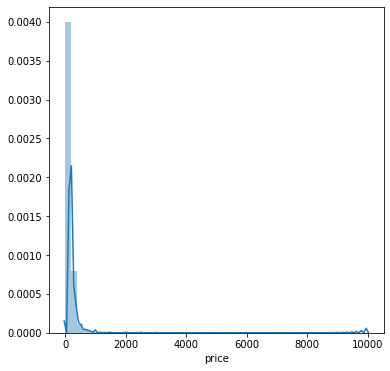

In [13]:
#Plotting a histogram for price column before cleaning
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.show()

**price column consists of outliers**

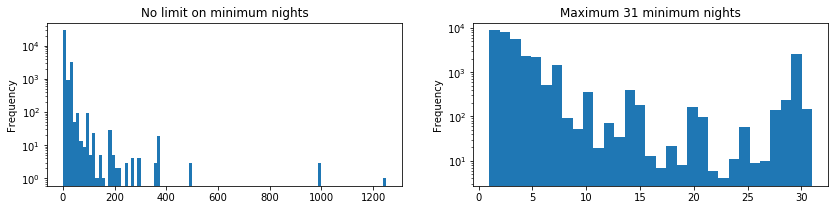

As a result of imposing minimum nights limit, 393 listings were removed.


In [14]:
#Plotting histogram for minimum_nights before cleaning
df_old=df.copy()
dfm = df[df["minimum_nights"] <=31].copy()
removed_listings = len(df_old)-len(dfm)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.hist(df_old.minimum_nights, bins=100, log=True)
ax1.set_ylabel("Frequency")
ax1.set_title("No limit on minimum nights")

ax2.hist(dfm.minimum_nights, bins=31, log=True)
ax2.set_ylabel("Frequency")
ax2.set_title("Maximum 31 minimum nights")

plt.show()

print("As a result of imposing minimum nights limit, " + str(removed_listings)+" listings were removed.")

**33833 houses(i.e. approx 99% of the dataset) lie in the range of 1-31 minimum_nights**

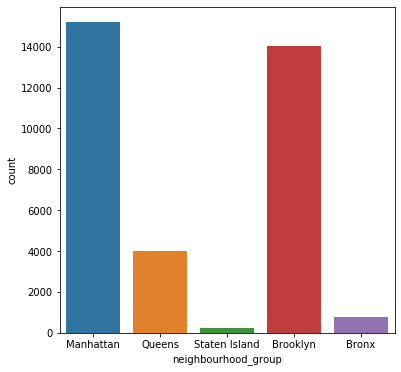

In [15]:
#plotting distribution of dataset based on neighbourhood_group
plt.figure(figsize = (6,6))
sns.countplot(x="neighbourhood_group", data=df)
plt.show()

**Maximum houses rented in Manhattan and Brooklyn**

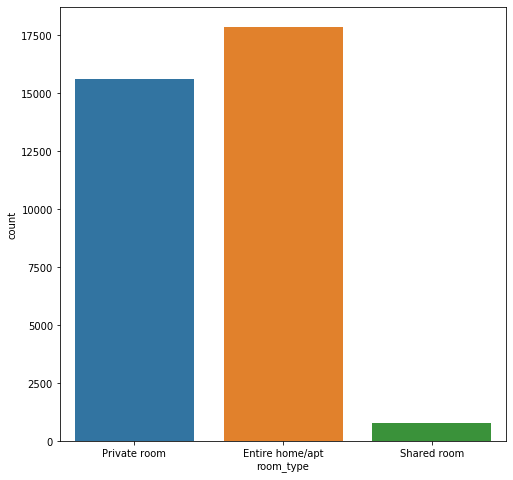

In [16]:
#Plotting distribution of the dataset based on room_type
plt.figure(figsize = (8,8))
sns.countplot(x='room_type', data=df)
plt.show()

**More number of Entire home/apt room_type**

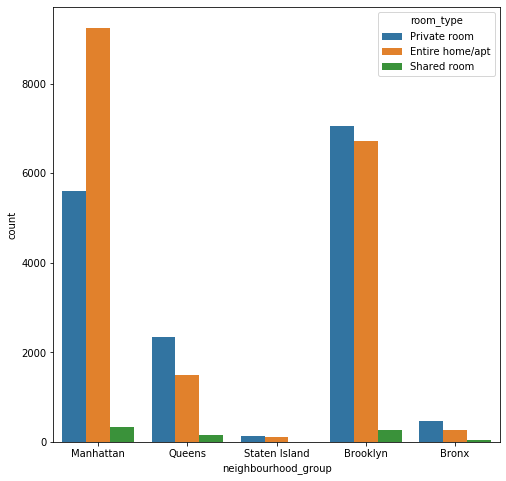

In [17]:
#Plotting distribution of the dataset based on neighbourhood_group and room_type
plt.figure(figsize = (8,8))
sns.countplot(x="neighbourhood_group",hue = 'room_type', data=df)
plt.show()

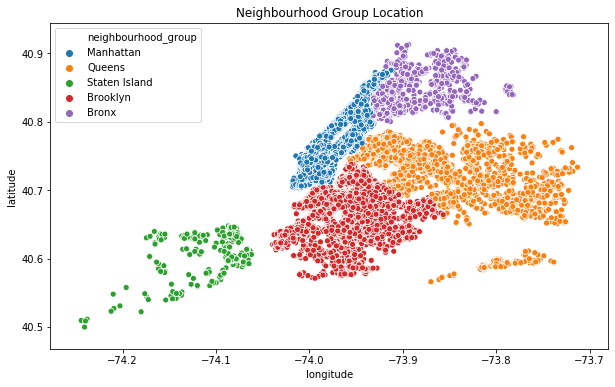

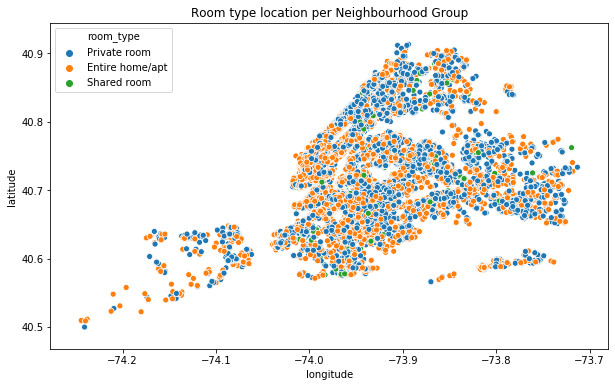

In [18]:
#Checking the location of neighbourhood_group
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group).set_title(title)
plt.ioff()

#room_type distribution based on location
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type).set_title(title)
plt.ioff()

**More entire homes rented in Manhattan**

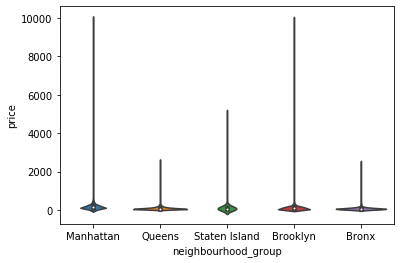

In [19]:
#Plotting different columns against price to see the correlation in the uncleaned data
#neighbourhood_group VS price
ax = sns.violinplot(x="neighbourhood_group", y="price", data=df)

**High priced houses in Manhattan and brooklyn which can cause problem in the prediction since the maximum number of budget homes are also in Manhattan and Brooklyn and these outliers can distort the prediction**

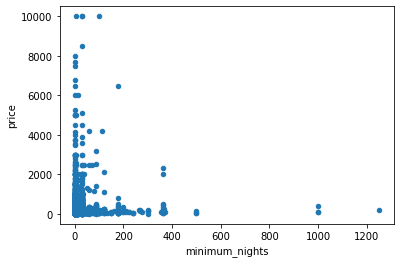

In [20]:
#price VS minimum_nights
df.plot.scatter(y = 'price', x = 'minimum_nights' )
plt.show()

****

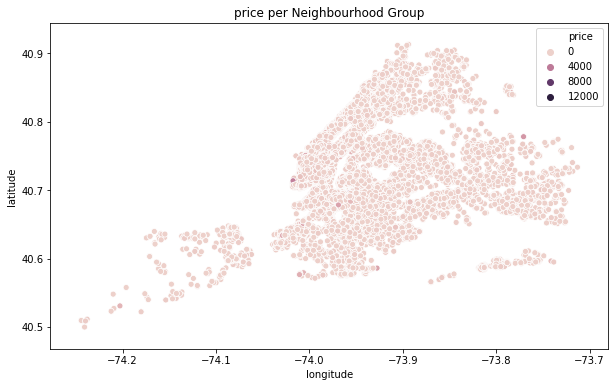

In [21]:
#price VS geography
title = 'price per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.price).set_title(title)
plt.ioff()

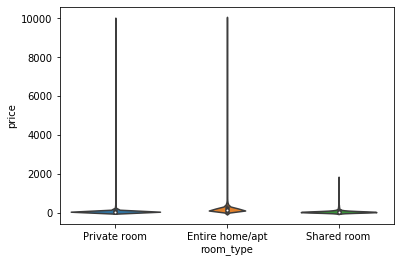

In [22]:
#price VS room_type
sns.violinplot(x="room_type", y="price", data=df)
plt.show()

**Entire home/apt has higher prices - also has the maximum count in the dataset - can distort the prediction - hence remove outliers from the price column**

In [23]:
# Checking if null values of last_review and RPM belong to same row
df[df['reviews_per_month'].isnull()].count()

id                                6982
name                              6982
host_id                           6982
host_name                         6982
neighbourhood_group               6982
neighbourhood                     6982
latitude                          6982
longitude                         6982
room_type                         6982
price                             6982
minimum_nights                    6982
number_of_reviews                 6982
last_review                          0
reviews_per_month                    0
calculated_host_listings_count    6982
availability_365                  6982
dtype: int64

**-dropping rows with nan would mean losing 20% of our data, but dropping the columns would be a loss of a possibly important predictor
-replace the nan values in the reviews_per_month with 0**

In [24]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [25]:
#making sure we don't have any nan values left 
missing_data_summary = (df.isnull().sum()/len(df))*100
missing_data_summary

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.399696
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

**not deleting last_review column as it can be used to extract the month of last review**

In [26]:
#REMOVING OUTLIERS
#price min values
df['price'].idxmin()
min = df[df.price == df.price.min()]
df[df.price == df.price.min()].count()

id                                9
name                              9
host_id                           9
host_name                         9
neighbourhood_group               9
neighbourhood                     9
latitude                          9
longitude                         9
room_type                         9
price                             9
minimum_nights                    9
number_of_reviews                 9
last_review                       8
reviews_per_month                 9
calculated_host_listings_count    9
availability_365                  9
dtype: int64

In [27]:
#price maximum value
df[df.price == df.price.max()].count()

id                                2
name                              2
host_id                           2
host_name                         2
neighbourhood_group               2
neighbourhood                     2
latitude                          2
longitude                         2
room_type                         2
price                             2
minimum_nights                    2
number_of_reviews                 2
last_review                       1
reviews_per_month                 2
calculated_host_listings_count    2
availability_365                  2
dtype: int64

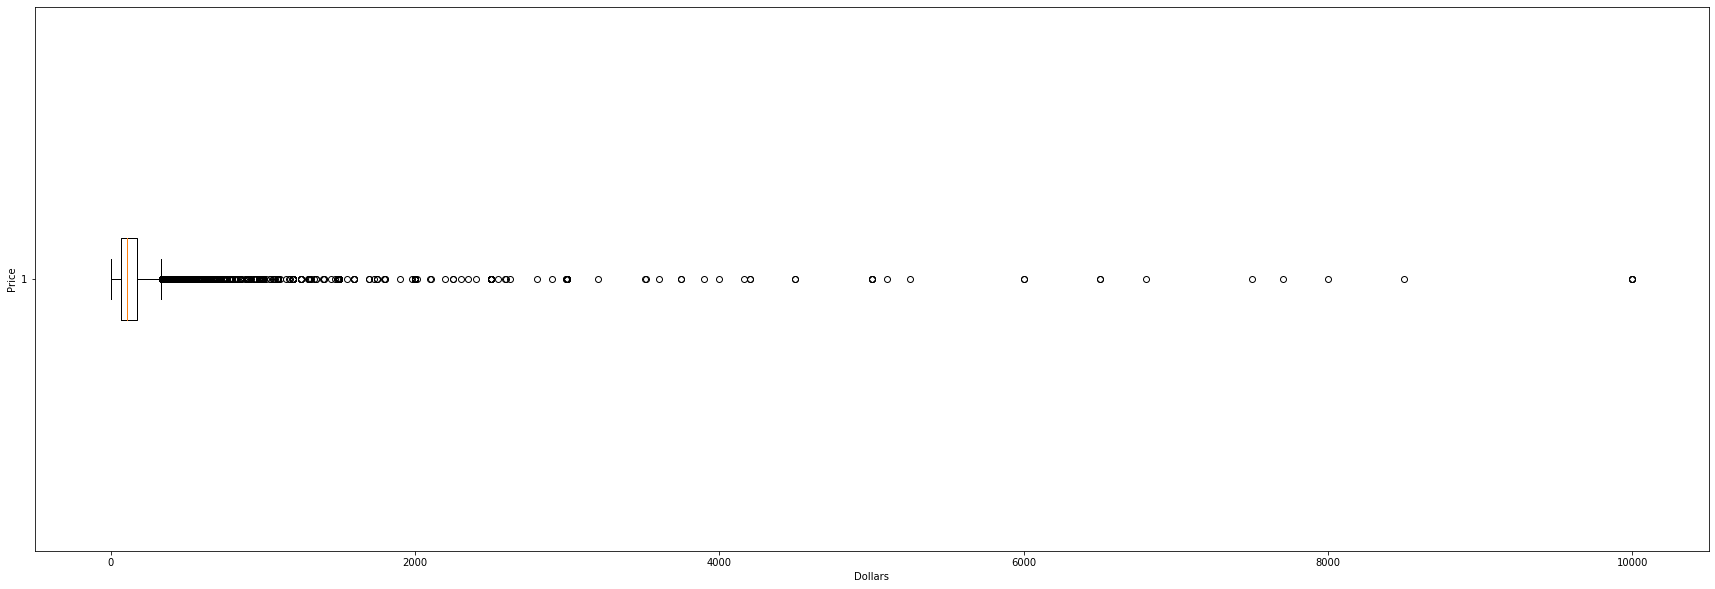

In [28]:
#boxplot for checking the price distribution
plt.figure(figsize = (30,10))
plt.boxplot(df['price'], vert = False)
plt.ylabel('Price')
plt.xlabel('Dollars')
plt.show()

**The prices are scattered and have heavy outliers**

In [29]:
#plotting in descending order to check which values to delete
df.sort_values(['price'], ascending = False, axis = 0).head(15)

id                                               name    host_id  \
29644  13894339    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
12404  22436899                                1-BR Lincoln Center   72390391   
12523  31340283  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
20810   9528920                Quiet, Clean, Lit @ LES & Chinatown    3906464   
23350  23377410  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
31293   2953058                                      Film Location    1177497   
3719   22779726          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
15974  33007610                70' Luxury MotorYacht on the Hudson    7407743   
7817   33998396                   3000 sq ft daylight photo studio    3750764   
3754    2271504                   SUPER BOWL Brooklyn Duplex Apt!!   11598359   
26977  36056808       Luxury TriBeCa Apartment at an amazing price  271248669   
11576  12520066                 Luxury townhouse Greenwich Village   66240032   
4969    2110145                 UWS 1BR w/backyard + block from CP    2151325   
31865   2243699                SuperBowl Penthouse Loft 3,000 sqft    1483320   
6868   33397385    Midtown Manhattan great location (Gramacy park)   16105313   

         host_name neighbourhood_group      neighbourhood  latitude  \
29644         Erin            Brooklyn         Greenpoint  40.73260   
12404       Jelena           Manhattan    Upper West Side  40.77213   
12523         Matt           Manhattan    Lower East Side  40.71980   
20810          Amy           Manhattan    Lower East Side  40.71355   
23350          Rum           Manhattan            Tribeca  40.72197   
31293      Jessica            Brooklyn       Clinton Hill  40.69137   
3719         Sally           Manhattan    Upper East Side  40.76824   
15974         Jack           Manhattan  Battery Park City  40.71162   
7817         Kevin           Manhattan            Chelsea  40.75060   
3754      Jonathan            Brooklyn       Clinton Hill  40.68766   
26977        Jenny           Manhattan            Tribeca  40.71206   
11576        Linda           Manhattan  Greenwich Village  40.73046   
4969   Jay And Liz           Manhattan    Upper West Side  40.77782   
31865         Omri           Manhattan       Little Italy  40.71895   
6868         Debra           Manhattan            Midtown  40.74482   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
29644  -73.95739  Entire home/apt  10000               5                  5   
12404  -73.98665  Entire home/apt  10000              30                  0   
12523  -73.98566  Entire home/apt   9999              30                  0   
20810  -73.98507     Private room   9999              99                  6   
23350  -74.00633  Entire home/apt   8500              30                  2   
31293  -73.96723  Entire home/apt   8000               1                  1   
3719   -73.95989  Entire home/apt   7703               1                  0   
15974  -74.01693  Entire home/apt   7500               1                  0   
7817   -74.00388  Entire home/apt   6800               1                  0   
3754   -73.96439  Entire home/apt   6500               1                  0   
26977  -74.00999  Entire home/apt   6500             180                  0   
11576  -73.99562  Entire home/apt   6000               1                  0   
4969   -73.97848  Entire home/apt   6000              14                 17   
31865  -73.99793  Entire home/apt   5250               1                  0   
6868   -73.98367  Entire home/apt   5100              30                  1   

      last_review  reviews_per_month  calculated_host_listings_count  \
29644  2017-07-27               0.16                               1   
12404         NaN               0.00                               1   
12523         NaN               0.00                               1   
20810  2016-01-01         

**The values get a bit continuous after 6000 - remove houses priced above 600**

In [30]:
#Dropping rows with high price
df.drop(df[df['price']>6000].index, inplace = True)
df.sort_values(['price'], ascending = False, axis = 0).head(10)

id                                             name    host_id  \
11576  12520066               Luxury townhouse Greenwich Village   66240032   
4969    2110145               UWS 1BR w/backyard + block from CP    2151325   
31865   2243699              SuperBowl Penthouse Loft 3,000 sqft    1483320   
6868   33397385  Midtown Manhattan great location (Gramacy park)   16105313   
14648  21238053                                       Broadway 1  153497815   
14314  18051877                          Victorian Film location    2675644   
28944   2919330                 NearWilliamsburg bridge 11211 BK   14908606   
24593  20654227                                         Fulton 2  100069033   
15704  35345358                   Northside Williamsburg Stunner     956324   
6600    2952861                             Photography Location    1177497   

         host_name neighbourhood_group       neighbourhood  latitude  \
11576        Linda           Manhattan   Greenwich Village  40.73046   
4969   Jay And Liz           Manhattan     Upper West Side  40.77782   
31865         Omri           Manhattan        Little Italy  40.71895   
6868         Debra           Manhattan             Midtown  40.74482   
14648      Sarah-B            Brooklyn  Bedford-Stuyvesant  40.68742   
14314       Alissa       Staten Island       Randall Manor  40.63952   
28944       Bianca            Brooklyn  Bedford-Stuyvesant  40.69572   
24593      Sarah-2            Brooklyn       Cypress Hills  40.68185   
15704         Alex            Brooklyn        Williamsburg  40.71705   
6600       Jessica            Brooklyn        Clinton Hill  40.69127   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
11576  -73.99562  Entire home/apt   6000               1                  0   
4969   -73.97848  Entire home/apt   6000              14                 17   
31865  -73.99793  Entire home/apt   5250               1                  0   
6868   -73.98367  Entire home/apt   5100              30                  1   
14648  -73.91957  Entire home/apt   5000               2                  8   
14314  -74.09730  Entire home/apt   5000               1                  0   
28944  -73.95731     Private room   5000               6                 10   
24593  -73.88128  Entire home/apt   5000               2                  4   
15704  -73.96470  Entire home/apt   4500              30                  0   
6600   -73.96563  Entire home/apt   4500               1                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
11576         NaN               0.00                               1   
4969   2015-02-17               0.27                               1   
31865         NaN               0.00                               1   
6868   2019-06-22               1.00                               2   
14648  2017-12-09               0.38                               1   
14314         NaN               0.00                               1   
28944  2016-01-02               0.16                               1   
24593  2018-01-03               0.18                               1   
15704         NaN               0.00                               1   
6600   2018-12-29               0.09                              11   

       availability_365  
11576                 0  
4969                359  
31865                 0  
6868                343  
14648                 0  
14314               344  
28944               363  
24593                 0  
15704               365  
6600                365

In [31]:
#Dropping rows with min price i.e. 0
df.drop(df[df['price']==0].index, inplace = True)
df.sort_values(['price'], ascending = True, axis = 0).head(5)
df[df.price == df.price.min()]

id                                               name    host_id  \
1503   17437106               Couch in Harlem Harvey Refugees only   33511962   
4546   26496645                                   Room with a view  110049861   
5582   17979764                                            Jen Apt   84497333   
9851   18490141                            IT'S SIMPLY CONVENIENT!   97001292   
9973   26235873                             Voted #1 Airbnb In NYC  197169969   
10766  18835820             Quiet, Cozy UES Studio Near the Subway   52777892   
13778  28071998                 Cozy room in a three-bedroom House   47516406   
14631   1620248      Large furnished 2 bedrooms- - 30 days Minimum    2196224   
16917  28270998       Charming, bright and brand new Bed-Stuy home     647528   
18422  17952277  Newly renovated, fully furnished room in Brooklyn   62685070   
23016  25839759  Gigantic Sunny Room in Park Slope-Private Back...  167570251   
26499  35642891                         Beautiful room in Bushwick  268138154   
29613  24114389    Very Spacious bedroom, steps from CENTRAL PARK.  180661875   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
1503     Morgan           Manhattan              Harlem  40.81302  -73.95349   
4546     Martin            Brooklyn        Williamsburg  40.70959  -73.95693   
5582   Jennifer           Manhattan                SoHo  40.72237  -73.99817   
9851      Maria              Queens             Jamaica  40.69085  -73.79916   
9973      Maria              Queens             Jamaica  40.68939  -73.79886   
10766       Amy           Manhattan     Upper East Side  40.76844  -73.95341   
13778    Arthur              Queens           Woodhaven  40.69139  -73.86086   
14631     Sally           Manhattan        East Village  40.73051  -73.98140   
16917  Caterina            Brooklyn  Bedford-Stuyvesant  40.69508  -73.95164   
18422     Katie            Brooklyn            Bushwick  40.69974  -73.91935   
23016    Rachel            Brooklyn         Sunset Park  40.66242  -73.99464   
26499     Julio            Brooklyn            Bushwick  40.69640  -73.91898   
29613     Salim           Manhattan     Upper West Side  40.76844  -73.98333   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1503       Shared room     10               1                  0         NaN   
4546      Private room     10               1                  0         NaN   
5582      Private room     10               5                  2  2017-04-15   
9851   Entire home/apt     10               1                 43  2019-06-12   
9973   Entire home/apt     10               2                 22  2019-07-06   
10766  Entire home/apt     10               3                 10  2018-10-22   
13778     Private room     10               7                  4  2018-10-08   
14631  Entire home/apt     10              30                  0         NaN   
16917  Entire home/apt     10               3                  5  2019-07-02   
18422     Private room     10               5                  0         NaN   
23016  Entire home/apt     10               1                 14  2018-10-28   
26499     Private room     10               1                  2  2019-06-18   
29613     Private room     10               1                  2  2018-04-23   

       reviews_per_month  calculated_host_listings_count  availability_365  
1503                0.00                               1                 0  
4546                0.00                               1                83  
5582                0.07                               1                 0  
9851                1.68                               1               252  
9973                1.76                               1               332  
10766               0.39                               1                 0  
13778               0.41                               2               180  
14631               

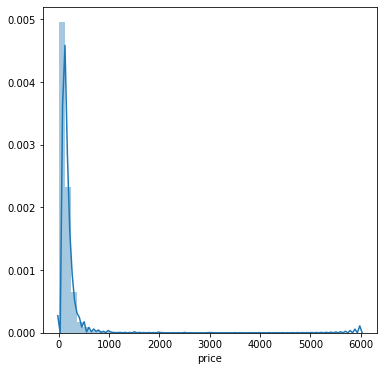

In [32]:
#Plotting a histogram for price column after cleaning
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.show()

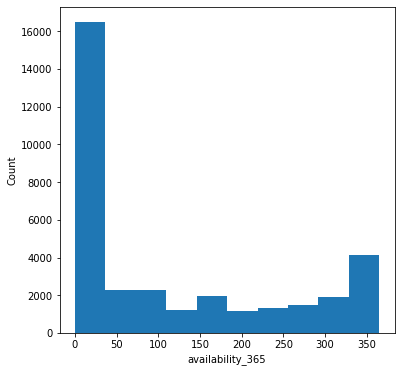

In [33]:
#Plotting a histogram for availability_365 column after cleaning
plt.figure(figsize=(6,6))
plt.hist(df['availability_365'])
plt.xlabel('availability_365')
plt.ylabel('Count')
plt.show()

In [34]:
df['price'].describe()

count    34206.000000
mean       150.895720
std        192.765399
min         10.000000
25%         69.000000
50%        107.000000
75%        175.000000
max       6000.000000
Name: price, dtype: float64

In [35]:
#minimum_nights outliers removal
df.sort_values('minimum_nights', ascending = False).head(10)

id                                 name    host_id   host_name  \
33538   4204302     Prime W. Village location 1 bdrm   17550546   Genevieve   
27885   1615764                              Unknown    6676776       Peter   
1554   30378211         Shared Studio (females only)  200401254         Meg   
19663  20990053      Beautiful place in Brooklyn! #2  151084261       Angie   
17336  35834935               Williamsburg Apartment   82674375         Meg   
19816   8668115   Zen Room in Crown Heights Brooklyn    8996336       Laura   
6184    6169897            Wonderful Large 1 bedroom   10720264        John   
6743     568684  800sqft apartment with huge terrace    2798644  Alessandra   
14568  12888849   Bright Luxury Studio, Central Loc.   16476167       Sarah   
27937    258690  CHELSEA 1 Bdrm Plus Sleeping Loft!!    1359611      Andrea   

      neighbourhood_group      neighbourhood  latitude  longitude  \
33538           Manhattan  Greenwich Village  40.73293  -73.99782   
27885           Manhattan  Battery Park City  40.71239  -74.01620   
1554            Manhattan  Greenwich Village  40.73094  -73.99900   
19663            Brooklyn       Williamsburg  40.71772  -73.95059   
17336            Brooklyn       Williamsburg  40.70898  -73.94885   
19816            Brooklyn      Crown Heights  40.67255  -73.94914   
6184            Manhattan             Harlem  40.82135  -73.95521   
6743             Brooklyn           Bushwick  40.70202  -73.92402   
14568           Manhattan            Midtown  40.74513  -73.98475   
27937           Manhattan            Chelsea  40.74618  -74.00392   

             room_type  price  minimum_nights  number_of_reviews last_review  \
33538  Entire home/apt    180            1250                  2  2014-11-09   
27885  Entire home/apt    400            1000                  0         NaN   
1554       Shared room    110             999                  0         NaN   
19663     Private room     79             999                 24  2018-06-28   
17336  Entire home/apt    140             500                  0         NaN   
19816     Private room     50             500                 10  2016-09-22   
6184   Entire home/apt     75             500                  0         NaN   
6743   Entire home/apt    115             370                  6  2018-04-15   
14568  Entire home/apt    250             366                  0         NaN   
27937  Entire home/apt    195             365                 10  2014-10-26   

       reviews_per_month  calculated_host_listings_count  availability_365  
33538               0.03                               1               365  
27885               0.00                               1               362  
1554                0.00                               1               365  
19663               1.12                               6               249  
17336               0.00                               1               331  
19816               0.22                               1               365  
6184                0.00                               1               362  
6743                0.09                               1               365  
14568               0.00                               1               365  
27937               0.12                               1                 0

**minimum_nights above 800 can be condisered as outliers**

In [36]:
#dropping rows with minimum_nights > 800
df.drop(df[df['minimum_nights']>800].index, inplace = True)
df.sort_values('minimum_nights', ascending = False)

id                                               name    host_id  \
6184    6169897                          Wonderful Large 1 bedroom   10720264   
19816   8668115                 Zen Room in Crown Heights Brooklyn    8996336   
17336  35834935                             Williamsburg Apartment   82674375   
6743     568684                800sqft apartment with huge terrace    2798644   
14568  12888849                 Bright Luxury Studio, Central Loc.   16476167   
...         ...                                                ...        ...   
5524   10886372  BK Bedroom in a Comfortable Apartment by the P...   56410306   
5523    3122230                                   Cozy Harlem Home   15859636   
22115  30928305                               Mesmerized Penthouse  213781715   
22116  17902970           Great location in the heart of Manhattan  122679380   
22517  22665392                Spacious and Airy Williamsburg Home    6787261   

        host_name neighbourhood_group              neighbourhood  latitude  \
6184         John           Manhattan                     Harlem  40.82135   
19816       Laura            Brooklyn              Crown Heights  40.67255   
17336         Meg            Brooklyn               Williamsburg  40.70898   
6743   Alessandra            Brooklyn                   Bushwick  40.70202   
14568       Sarah           Manhattan                    Midtown  40.74513   
...           ...                 ...                        ...       ...   
5524         Cole            Brooklyn  Prospect-Lefferts Gardens  40.66070   
5523         Kyle           Manhattan                     Harlem  40.81595   
22115      Anting           Manhattan                       NoHo  40.72886   
22116         Sam           Manhattan             Hell's Kitchen  40.76313   
22517   Anastasia            Brooklyn               Williamsburg  40.71028   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
6184   -73.95521  Entire home/apt     75             500                  0   
19816  -73.94914     Private room     50             500                 10   
17336  -73.94885  Entire home/apt    140             500                  0   
6743   -73.92402  Entire home/apt    115             370                  6   
14568  -73.98475  Entire home/apt    250             366                  0   
...          ...              ...    ...             ...                ...   
5524   -73.96168     Private room     60               1                  0   
5523   -73.94470     Private room    125               1                  0   
22115  -73.99139  Entire home/apt    179               1                  0   
22116  -73.98978     Private room    100               1                216   
22517  -73.95367  Entire home/apt    189               1                 52   

      last_review  reviews_per_month  calculated_host_listings_count  \
6184          NaN               0.00                               1   
19816  2016-09-22               0.22                               1   
17336         NaN               0.00                               1   
6743   2018-04-15               0.09                               1   
14568         NaN               0.00                               1   
...           ...                ...                             ...   
5524          NaN               0.00                               1   
5523          NaN               0.00                               1   
22115         NaN               0.00                              33   
22116  2019-07-01               8.07                               1   
22517  2019-06-13               2.88                               2   

       availability_365  
6184                362  
19816               365  
17336               331  
6743                365  
14568               365  
...                 ...  
5524                  0  
5523                  0  
22115               364  
22116                43  
225

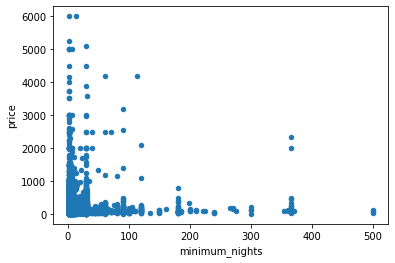

In [37]:
#price VS minimum_nights after removing all outliers
df.plot.scatter(y = 'price', x = 'minimum_nights' )
plt.show()

**for lower minimum_nights there is a range of prices till max - for lower prices there are different minimum_nights values**

In [38]:
#availability_365 outliers
df[df['availability_365']==0].count()

id                                12252
name                              12252
host_id                           12252
host_name                         12252
neighbourhood_group               12252
neighbourhood                     12252
latitude                          12252
longitude                         12252
room_type                         12252
price                             12252
minimum_nights                    12252
number_of_reviews                 12252
last_review                        8901
reviews_per_month                 12252
calculated_host_listings_count    12252
availability_365                  12252
dtype: int64

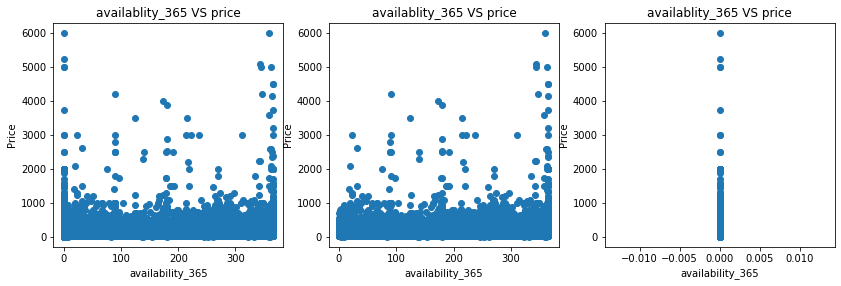

In [39]:

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

ax1.scatter(x = df['availability_365'], y = df['price'])
ax1.set_ylabel("Price")
ax1.set_xlabel("availability_365")
ax1.set_title('availablity_365 VS price')


dfa = df.drop(df[df['availability_365']==0].index)
ax2.scatter(x = dfa['availability_365'], y = dfa['price'])
ax2.set_ylabel("Price")
ax2.set_xlabel("availability_365")
ax2.set_title('availablity_365 VS price')


dfc = df[df['availability_365']==0]
ax3.scatter(x = dfc['availability_365'], y = dfc['price'])
ax3.set_ylabel("Price")
ax3.set_xlabel("availability_365")
ax3.set_title('availablity_365 VS price')
plt.show()

**We will lose valuable infnormation if we drop rows with 0 availability_365 as most of them are concentrated in the price range 0-2000 which is the main part of the dataset**

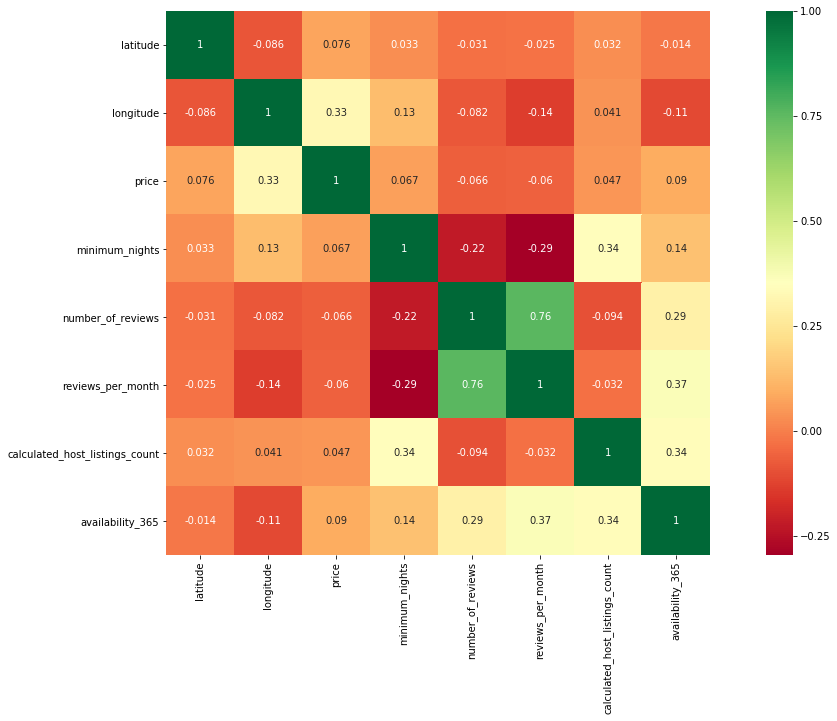

In [40]:
#Heat map between numerical variables
#separate out numerical variables
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()[2:]

plt.figure(figsize = (20,10))
x=df[numeric_vars].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True, square=True, cmap='RdYlGn')
plt.show()

**Observations on price:

1. price seems to be positively correlated with longitude meaning - Manhattan most expensive
2. latitude seems to have lesser effect on the price - higher prices located in the northern parts of the city
3. price is slightly positively correlated with - increasing availability, the fact that the property is rented by a host who lists other properties - increasing number of minimum nights
4. price is negatively correlated with number of reviews and reviews per month - possible that the prior reviews could reduce the prices to some extent

**Other interesting observations:

1. calculated host lisitng count is positively correlated with minimum nights and availability_365 indicating that hosts who list more than one property may be more strategic rather than opportunisitic about their rentals. That may attempt to maximize the amount of time a single renter stays at their property to minimize turnover cost. They also tend to maximize the amount of time the property is being rented.

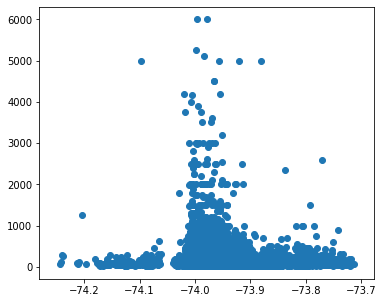

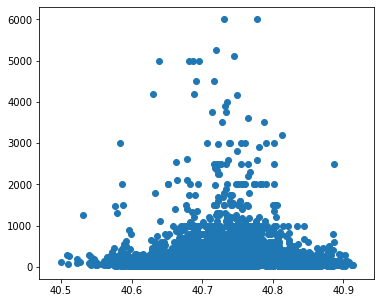

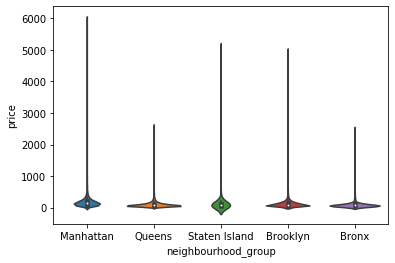

In [41]:
#Location is an important factor. Therefore, checking how mean prices vary by neighbourhood
#Lets look at prices based on latitude (note that Mahattan has higher latitude values)
plt.figure(figsize = (6,5))
plt.scatter(y = 'price', x = 'longitude', data = df)
plt.show()

plt.figure(figsize = (6,5))
plt.scatter(y = 'price', x = 'latitude', data = df)
plt.show()

sns.violinplot(x="neighbourhood_group", y="price", data=df)
plt.show()

**Manhattan > Staten Island > Brooklyn > Queens > Bronx**

# one hot encode - neighbourhood_group, room_type, neighbourhood

In [42]:
#getting dummies for room_type
room_dummies = pd.get_dummies(df.room_type)
room_dummies

Entire home/apt  Private room  Shared room
0                    0             1            0
1                    1             0            0
2                    1             0            0
3                    0             0            1
4                    0             0            1
...                ...           ...          ...
34221                1             0            0
34222                0             1            0
34223                1             0            0
34224                0             1            0
34225                1             0            0

[34202 rows x 3 columns]

In [43]:
#merging the dummies with the dataframe
merged_rooms = pd.concat([df,room_dummies], axis = 'columns')
#arranging the columns
merged_rooms = merged_rooms[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type','Entire home/apt', 'Private room', 'Shared room',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365','price']]
#dropping room_type column and a dummy variabel to avoid the dummy variable trap
merged_rooms.drop(['room_type', 'Shared room'], axis = 'columns', inplace = True)
merged_rooms

id                                               name    host_id  \
0       5728806                       Large private room in Nolita    4271676   
1       2243769                 Super Bowl New York City Apartment   11460768   
2      35515415     COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION  267193767   
3      36202006       Stream-Pressed Paradise (Laundry Room Setup)   43392243   
4       3780951                          Charming Harlem apartment   16065171   
...         ...                                                ...        ...   
34221  28342248                                  Ridgewood retreat  120730056   
34222   8438775                Private BR & Bath near Central Park   41042927   
34223  27332770  Warm Home w/ Private Garden (Inwood Manhattan ...   80381355   
34224   9063972                               Chill Bushwick Suite    3040551   
34225  13372860  Cozy and simple Bedstuy studio right by the train   16755566   

       host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0            Nat           Manhattan              Nolita  40.72217  -73.99481   
1          Brian           Manhattan     Upper West Side  40.80020  -73.96045   
2          Jenny              Queens       East Elmhurst  40.75558  -73.89316   
3           Rita       Staten Island             Concord  40.60110  -74.07830   
4           Gina           Manhattan              Harlem  40.81022  -73.94266   
...          ...                 ...                 ...       ...        ...   
34221     Sophie              Queens           Ridgewood  40.70602  -73.90485   
34222       Gabi           Manhattan     Upper West Side  40.77697  -73.97698   
34223       Mary           Manhattan              Inwood  40.86912  -73.92183   
34224  Olu Bliss            Brooklyn            Bushwick  40.69709  -73.91435   
34225     Ashton            Brooklyn  Bedford-Stuyvesant  40.69076  -73.92886   

       Entire home/apt  Private room  minimum_nights  number_of_reviews  \
0                    0             1               7                  3   
1                    1             0               1                  0   
2                    1             0               2                  4   
3                    0             0               2                  0   
4                    0             0               1                 16   
...                ...           ...             ...                ...   
34221                1             0               5                  2   
34222                0             1               1                163   
34223                1             0               2                  6   
34224                0             1               3                  0   
34225                1             0               4                  5   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.06                               3                 0   
1                   0.00                               1                 0   
2                   4.00                               1               365   
3                   0.00                               4                82   
4                   0.27                               1               365   
...                  ...                             ...               ...   
34221               0.21                               1                 0   
34222               3.55                               1                32   
34223               0.53                               1                 0   
34224               0.00                               1                 0   
34225               0.13                               1                 0   

       price  
0        120  
1       1500  
2        200  
3         30  
4        115  
...      ...  
34221     80  
34222    137  
34223    195  
34224     80  
34225     69  

[34202 rows x 16 columns]

In [44]:
#getting dummies for neighbourhood_group
ngroup_dummies = pd.get_dummies(df.neighbourhood_group)
ngroup_dummies

Bronx  Brooklyn  Manhattan  Queens  Staten Island
0          0         0          1       0              0
1          0         0          1       0              0
2          0         0          0       1              0
3          0         0          0       0              1
4          0         0          1       0              0
...      ...       ...        ...     ...            ...
34221      0         0          0       1              0
34222      0         0          1       0              0
34223      0         0          1       0              0
34224      0         1          0       0              0
34225      0         1          0       0              0

[34202 rows x 5 columns]

In [45]:
#merging the dummies with the dataframe
merged_ngroup = pd.concat([ngroup_dummies,merged_rooms], axis = 'columns')
merged_ngroup
#drop neighbourhood_group and a dummy variable(Staten Island)
merged_ngroup.drop(['neighbourhood_group','Staten Island'], axis = 'columns', inplace = True)
merged_ngroup = merged_ngroup[['id', 'name', 'host_id',
       'host_name','Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'neighbourhood', 'latitude', 'longitude',
       'Entire home/apt', 'Private room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price']]
merged_ngroup.head(5)

id                                            name    host_id  \
0   5728806                    Large private room in Nolita    4271676   
1   2243769              Super Bowl New York City Apartment   11460768   
2  35515415  COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION  267193767   
3  36202006    Stream-Pressed Paradise (Laundry Room Setup)   43392243   
4   3780951                       Charming Harlem apartment   16065171   

  host_name  Bronx  Brooklyn  Manhattan  Queens    neighbourhood  latitude  \
0       Nat      0         0          1       0           Nolita  40.72217   
1     Brian      0         0          1       0  Upper West Side  40.80020   
2     Jenny      0         0          0       1    East Elmhurst  40.75558   
3      Rita      0         0          0       0          Concord  40.60110   
4      Gina      0         0          1       0           Harlem  40.81022   

   longitude  Entire home/apt  Private room  minimum_nights  \
0  -73.99481                0             1               7   
1  -73.96045                1             0               1   
2  -73.89316                1             0               2   
3  -74.07830                0             0               2   
4  -73.94266                0             0               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  3               0.06                               3   
1                  0               0.00                               1   
2                  4               4.00                               1   
3                  0               0.00                               4   
4                 16               0.27                               1   

   availability_365  price  
0                 0    120  
1                 0   1500  
2               365    200  
3                82     30  
4               365    115

No dummies for neighbourhood since there are 216 columns - doesn't solve any purpose

In [46]:
#Assigning a final dataframe
df1 = merged_ngroup
df1.head(2)

id                                name   host_id host_name  Bronx  \
0  5728806        Large private room in Nolita   4271676       Nat      0   
1  2243769  Super Bowl New York City Apartment  11460768     Brian      0   

   Brooklyn  Manhattan  Queens    neighbourhood  latitude  longitude  \
0         0          1       0           Nolita  40.72217  -73.99481   
1         0          1       0  Upper West Side  40.80020  -73.96045   

   Entire home/apt  Private room  minimum_nights  number_of_reviews  \
0                0             1               7                  3   
1                1             0               1                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  price  
0               0.06                               3                 0    120  
1               0.00                               1                 0   1500

# NLP on the name column

In [47]:
#Removing punctuations, digits and special characters
def remove_punct(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

df1['clean_name'] = df1['name'].apply(remove_punct)

In [48]:
df1[['name', 'clean_name']]

name  \
0                           Large private room in Nolita   
1                     Super Bowl New York City Apartment   
2         COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION   
3           Stream-Pressed Paradise (Laundry Room Setup)   
4                              Charming Harlem apartment   
...                                                  ...   
34221                                  Ridgewood retreat   
34222                Private BR & Bath near Central Park   
34223  Warm Home w/ Private Garden (Inwood Manhattan ...   
34224                               Chill Bushwick Suite   
34225  Cozy and simple Bedstuy studio right by the train   

                                              clean_name  
0                           large private room in nolita  
1                     super bowl new york city apartment  
2           cozy apt close to lga jfk and transportation  
3            stream pressed paradise laundry room setup   
4                              charming harlem apartment  
...                                                  ...  
34221                                  ridgewood retreat  
34222                  private br bath near central park  
34223   warm home w private garden inwood manhattan nyc   
34224                               chill bushwick suite  
34225  cozy and simple bedstuy studio right by the train  

[34202 rows x 2 columns]

In [49]:
#Removing stopwords
stop = stopwords.words('english')
df1['clean_name'] = df1['clean_name'].apply(word_tokenize)

In [50]:
def tokenize_no_stopwords(line):
    tokens_no_stop = [w for w in line if w not in stop]
    return " ".join(tokens_no_stop)

df1['clean_name'] = df1['clean_name'].apply(lambda x: tokenize_no_stopwords(x))
df1.head(5)

id                                            name    host_id  \
0   5728806                    Large private room in Nolita    4271676   
1   2243769              Super Bowl New York City Apartment   11460768   
2  35515415  COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION  267193767   
3  36202006    Stream-Pressed Paradise (Laundry Room Setup)   43392243   
4   3780951                       Charming Harlem apartment   16065171   

  host_name  Bronx  Brooklyn  Manhattan  Queens    neighbourhood  latitude  \
0       Nat      0         0          1       0           Nolita  40.72217   
1     Brian      0         0          1       0  Upper West Side  40.80020   
2     Jenny      0         0          0       1    East Elmhurst  40.75558   
3      Rita      0         0          0       0          Concord  40.60110   
4      Gina      0         0          1       0           Harlem  40.81022   

   longitude  Entire home/apt  Private room  minimum_nights  \
0  -73.99481                0             1               7   
1  -73.96045                1             0               1   
2  -73.89316                1             0               2   
3  -74.07830                0             0               2   
4  -73.94266                0             0               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  3               0.06                               3   
1                  0               0.00                               1   
2                  4               4.00                               1   
3                  0               0.00                               4   
4                 16               0.27                               1   

   availability_365  price                                  clean_name  
0                 0    120                   large private room nolita  
1                 0   1500          super bowl new york city apartment  
2               365    200       cozy apt close lga jfk transportation  
3                82     30  stream pressed paradise laundry room setup  
4               365    115                   charming harlem apartment

In [51]:
#Concatenate the words in one string
text = " "
for i in df1['clean_name']:
    text += " " + i

In [52]:
#Tokenize into separate words
tokenized = nltk.tokenize.word_tokenize(text)
print(tokenized)

['large', 'private', 'room', 'nolita', 'super', 'bowl', 'new', 'york', 'city', 'apartment', 'cozy', 'apt', 'close', 'lga', 'jfk', 'transportation', 'stream', 'pressed', 'paradise', 'laundry', 'room', 'setup', 'charming', 'harlem', 'apartment', 'lower', 'manhattan', 'luxury', 'spacious', 'clean', 'studio', 'apartment', 'bright', 'luxury', 'apartment', 'amazing', 'view', 'city', 'chelsea', 'brownstone', 'bedroom', 'house', 'heights', 'private', 'room', 'cool', 'bk', 'apt', 'private', 'room', 'trendy', 'williamsburg', 'loft', 'cute', 'clean', 'studio', 'central', 'harlem', 'entire', 'spacious', 'bed', 'apt', 'uws', 'lux', 'blg', 'prime', 'area', 'lg', 'private', 'rm', 'bath', 'w', 'views', 'one', 'bed', 'luxury', 'columbus', 'circle', 'private', 'br', 'mid', 'century', 'modern', 'apt', 'modern', 'east', 'williamsburg', 'apartment', 'comfy', 'modern', 'appartment', 'hip', 'crown', 'heights', 'bedroom', 'apt', 'bridges', 'chinatown', 'friendly', 'room', 'bright', 'spacious', 'room', 'bushwi

In [53]:
#Create a frequency dictionary
freqd = nltk.FreqDist(w for w in tokenized)

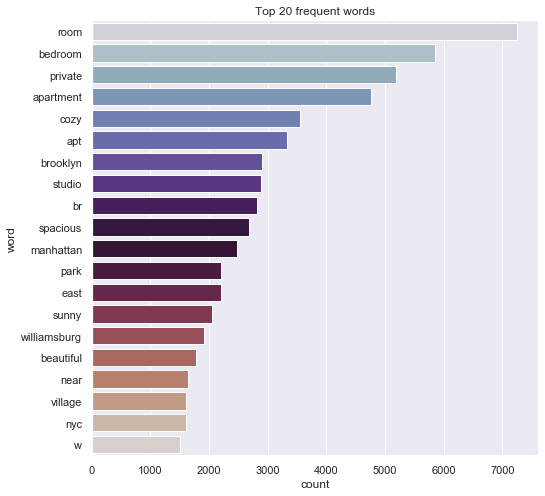

In [54]:
def plot_most_common(dict_data,title):
    df = pd.DataFrame(dict_data)
    df.columns = ['word', 'count']
    plt.figure(figsize=(8, 8))
    sns.set(style="darkgrid")
    sns.barplot(x="count", y="word", data=df, palette='twilight')
    plt.title(title)
    plt.show()
    
plot_most_common(freqd.most_common(20),'Top 20 frequent words')

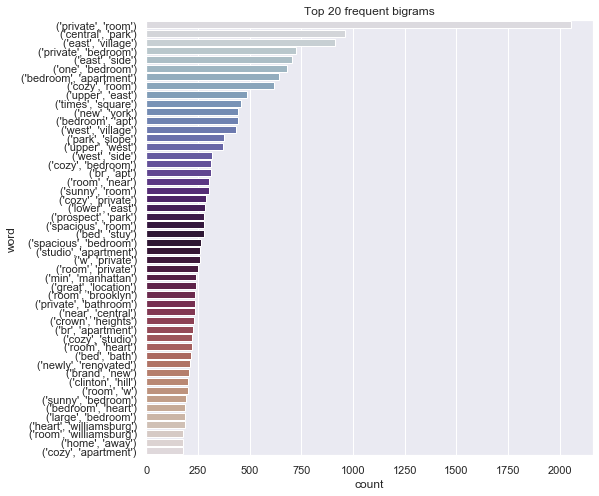

In [55]:
#MOst frequent Bigrams
freq_dict_bigrams = nltk.FreqDist(nltk.bigrams(w for w in tokenized))
plot_most_common(freq_dict_bigrams.most_common(50), 'Top 20 frequent bigrams')

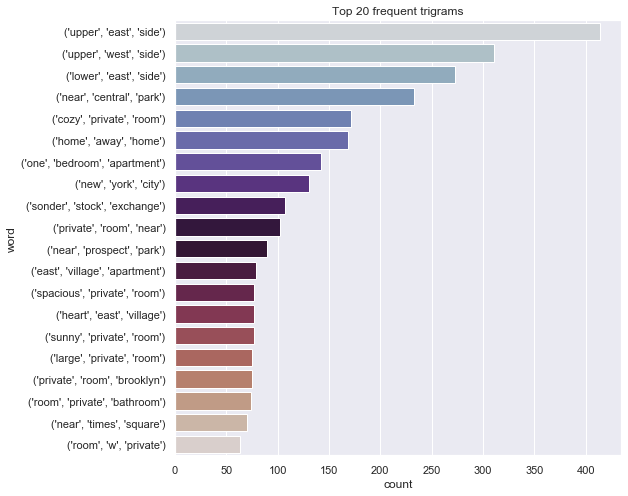

167950


In [56]:
#Most frequent Trigrams
freq_dict_trigrams = nltk.FreqDist(nltk.trigrams(w for w in tokenized))
plot_most_common(freq_dict_trigrams.most_common(20), 'Top 20 frequent trigrams')
print(len(tokenized))

# Exploring the titles of the appartments that cost more than 700 for a night.

In [57]:
costly = df1[df1['price']>800]
print(costly.shape)
print(df1.shape)

(292, 20)
(34202, 20)


In [58]:
# first, we need to concatenate all descriptions in one string
costly_text = ""
for i in costly['clean_name']:
    costly_text += " " + i

In [59]:
# next, we tokenize it into separate words
tokenized_costly_text = nltk.tokenize.word_tokenize(costly_text)

In [60]:
# finally, create a frequency dictionary with the help of nltk
freq_dict_costly = nltk.FreqDist(w for w in tokenized_costly_text)

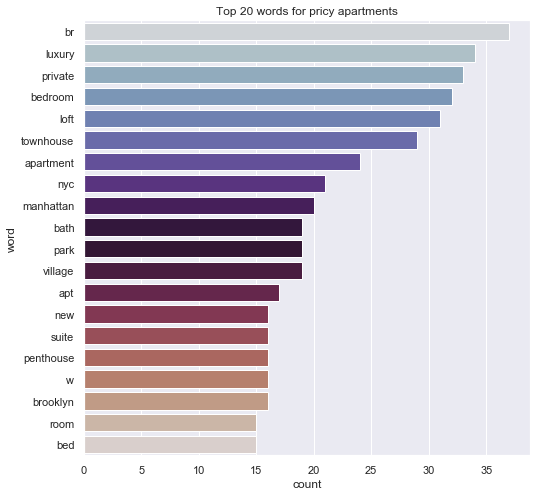

In [61]:
plot_most_common(freq_dict_costly.most_common(20), "Top 20 words for pricy apartments")

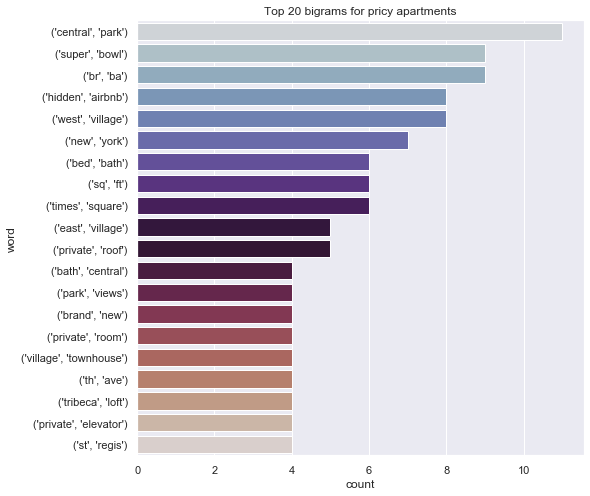

In [62]:
freq_dict_bigrams_costly = nltk.FreqDist(nltk.bigrams(w for w in tokenized_costly_text))
plot_most_common(freq_dict_bigrams_costly.most_common(20), "Top 20 bigrams for pricy apartments")

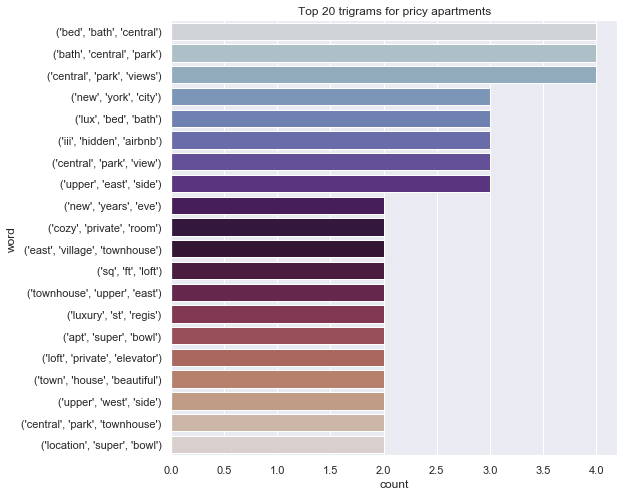

In [63]:
freq_dict_trigrams_costly = nltk.FreqDist(nltk.trigrams(w for w in tokenized_costly_text))
plot_most_common(freq_dict_trigrams_costly.most_common(20), "Top 20 trigrams for pricy apartments")

**167950 tokenized words. The following frequency distribution is compared to these:
•	While searching for the most frequent words used in the name column – 
o	The 5 most frequently used words (room, bedroom, private, apartment, cozy) could help us understand the type of room and the number of bedrooms/ area of the room, whether it is private or shared room, whether it is an apartment or a studio, the comfort level of the house.
o	We can cluster it into 1. Studio or apartment 2. Based on number of rooms 
o	The problem – we don’t kniw if the words are used in the same context that we are thinking it to be in
o	Therefore, need to make a bigram where we learn which word is commonly paired with these 5 words

•	Bigram(Analyzing top 50 bigrams):
o	rooms are private rooms (a little over 2000 houses)
o	Have a central park around (around 900 houses)
o	approx 700 houses have private bedrooms
o	approx 680-690 houses have 1 bedroom
o	600 houses are bedroom aparment
o	only around 270 houses are described being near to a landmark location which is a very small percentage. Hence, using this knowledge to find the price of a house near this landmark location is not useful
o	most of the descriptions have only used adjectives for the room. Which don't say a lot about the room as it depends on the perspective
o	newly renovated, brand new, together make 500 data points and justify the reason for those rooms to be highly priced
•	from univariate analysis of ‘price’ column we remember :
o	mostly budget homes
o	most houses in between 10 to 600
o	Most apparntments can be rented with approximately 175
•	exploring the titles of the appartments that cost more than 1k for a night:
o	since our dataset has more houses in 10-600 range we consider houses above 800 as expensive
o	there are 294 houses that are expensive
o	plotting top 20 most frequent words – 
o	only 20% descriptions have the word luxury
o	9.5% are townhouses
o	NYC > Manhattan > Brooklyn

In [64]:
x = df1.drop(['price','name','host_name','neighbourhood','clean_name'],axis = 1)
y = df1['price']

In [65]:
x.head()

id    host_id  Bronx  Brooklyn  Manhattan  Queens  latitude  \
0   5728806    4271676      0         0          1       0  40.72217   
1   2243769   11460768      0         0          1       0  40.80020   
2  35515415  267193767      0         0          0       1  40.75558   
3  36202006   43392243      0         0          0       0  40.60110   
4   3780951   16065171      0         0          1       0  40.81022   

   longitude  Entire home/apt  Private room  minimum_nights  \
0  -73.99481                0             1               7   
1  -73.96045                1             0               1   
2  -73.89316                1             0               2   
3  -74.07830                0             0               2   
4  -73.94266                0             0               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  3               0.06                               3   
1                  0               0.00                               1   
2                  4               4.00                               1   
3                  0               0.00                               4   
4                 16               0.27                               1   

   availability_365  
0                 0  
1                 0  
2               365  
3                82  
4               365

In [66]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)

In [67]:
x_train.columns

Index(['id', 'host_id', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'latitude',
       'longitude', 'Entire home/apt', 'Private room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)

In [69]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=55, random_state=99)
kf.get_n_splits(x)
print(kf)

KFold(n_splits=55, random_state=99, shuffle=False)


In [70]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [  622   623   624 ... 34199 34200 34201] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879
 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033
 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047
 2048 2049 2050 2051 2

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [4354 4355 4356 4357 4358 4359 4360 4361 4362 4363 4364 4365 4366 4367
 4368 4369 4370 4371 4372 4373 4374 4375 4376 4377 4378 4379 4380 4381
 4382 4383 4384 4385 4386 4387 4388 4389 4390 4391 4392 4393 4394 4395
 4396 4397 4398 4399 4400 4401 4402 4403 4404 4405 4406 4407 4408 4409
 4410 4411 4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423
 4424 4425 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437
 4438 4439 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 4451
 4452 4453 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465
 4466 4467 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479
 4480 4481 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493
 4494 4495 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507
 4508 4509 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521
 4522 4523 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535
 4536 4537 4538 4539 4

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [7464 7465 7466 7467 7468 7469 7470 7471 7472 7473 7474 7475 7476 7477
 7478 7479 7480 7481 7482 7483 7484 7485 7486 7487 7488 7489 7490 7491
 7492 7493 7494 7495 7496 7497 7498 7499 7500 7501 7502 7503 7504 7505
 7506 7507 7508 7509 7510 7511 7512 7513 7514 7515 7516 7517 7518 7519
 7520 7521 7522 7523 7524 7525 7526 7527 7528 7529 7530 7531 7532 7533
 7534 7535 7536 7537 7538 7539 7540 7541 7542 7543 7544 7545 7546 7547
 7548 7549 7550 7551 7552 7553 7554 7555 7556 7557 7558 7559 7560 7561
 7562 7563 7564 7565 7566 7567 7568 7569 7570 7571 7572 7573 7574 7575
 7576 7577 7578 7579 7580 7581 7582 7583 7584 7585 7586 7587 7588 7589
 7590 7591 7592 7593 7594 7595 7596 7597 7598 7599 7600 7601 7602 7603
 7604 7605 7606 7607 7608 7609 7610 7611 7612 7613 7614 7615 7616 7617
 7618 7619 7620 7621 7622 7623 7624 7625 7626 7627 7628 7629 7630 7631
 7632 7633 7634 7635 7636 7637 7638 7639 7640 7641 7642 7643 7644 7645
 7646 7647 7648 7649 7

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [11818 11819 11820 11821 11822 11823 11824 11825 11826 11827 11828 11829
 11830 11831 11832 11833 11834 11835 11836 11837 11838 11839 11840 11841
 11842 11843 11844 11845 11846 11847 11848 11849 11850 11851 11852 11853
 11854 11855 11856 11857 11858 11859 11860 11861 11862 11863 11864 11865
 11866 11867 11868 11869 11870 11871 11872 11873 11874 11875 11876 11877
 11878 11879 11880 11881 11882 11883 11884 11885 11886 11887 11888 11889
 11890 11891 11892 11893 11894 11895 11896 11897 11898 11899 11900 11901
 11902 11903 11904 11905 11906 11907 11908 11909 11910 11911 11912 11913
 11914 11915 11916 11917 11918 11919 11920 11921 11922 11923 11924 11925
 11926 11927 11928 11929 11930 11931 11932 11933 11934 11935 11936 11937
 11938 11939 11940 11941 11942 11943 11944 11945 11946 11947 11948 11949
 11950 11951 11952 11953 11954 11955 11956 11957 11958 11959 11960 11961
 11962 11963 11964 11965 11966 11967 11968 11969 11970 11971 11972 11

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [15550 15551 15552 15553 15554 15555 15556 15557 15558 15559 15560 15561
 15562 15563 15564 15565 15566 15567 15568 15569 15570 15571 15572 15573
 15574 15575 15576 15577 15578 15579 15580 15581 15582 15583 15584 15585
 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597
 15598 15599 15600 15601 15602 15603 15604 15605 15606 15607 15608 15609
 15610 15611 15612 15613 15614 15615 15616 15617 15618 15619 15620 15621
 15622 15623 15624 15625 15626 15627 15628 15629 15630 15631 15632 15633
 15634 15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645
 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657
 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669
 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681
 15682 15683 15684 15685 15686 15687 15688 15689 15690 15691 15692 15693
 15694 15695 15696 15697 15698 15699 15700 15701 15702 15703 15704 15

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [19282 19283 19284 19285 19286 19287 19288 19289 19290 19291 19292 19293
 19294 19295 19296 19297 19298 19299 19300 19301 19302 19303 19304 19305
 19306 19307 19308 19309 19310 19311 19312 19313 19314 19315 19316 19317
 19318 19319 19320 19321 19322 19323 19324 19325 19326 19327 19328 19329
 19330 19331 19332 19333 19334 19335 19336 19337 19338 19339 19340 19341
 19342 19343 19344 19345 19346 19347 19348 19349 19350 19351 19352 19353
 19354 19355 19356 19357 19358 19359 19360 19361 19362 19363 19364 19365
 19366 19367 19368 19369 19370 19371 19372 19373 19374 19375 19376 19377
 19378 19379 19380 19381 19382 19383 19384 19385 19386 19387 19388 19389
 19390 19391 19392 19393 19394 19395 19396 19397 19398 19399 19400 19401
 19402 19403 19404 19405 19406 19407 19408 19409 19410 19411 19412 19413
 19414 19415 19416 19417 19418 19419 19420 19421 19422 19423 19424 19425
 19426 19427 19428 19429 19430 19431 19432 19433 19434 19435 19436 19

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [23636 23637 23638 23639 23640 23641 23642 23643 23644 23645 23646 23647
 23648 23649 23650 23651 23652 23653 23654 23655 23656 23657 23658 23659
 23660 23661 23662 23663 23664 23665 23666 23667 23668 23669 23670 23671
 23672 23673 23674 23675 23676 23677 23678 23679 23680 23681 23682 23683
 23684 23685 23686 23687 23688 23689 23690 23691 23692 23693 23694 23695
 23696 23697 23698 23699 23700 23701 23702 23703 23704 23705 23706 23707
 23708 23709 23710 23711 23712 23713 23714 23715 23716 23717 23718 23719
 23720 23721 23722 23723 23724 23725 23726 23727 23728 23729 23730 23731
 23732 23733 23734 23735 23736 23737 23738 23739 23740 23741 23742 23743
 23744 23745 23746 23747 23748 23749 23750 23751 23752 23753 23754 23755
 23756 23757 23758 23759 23760 23761 23762 23763 23764 23765 23766 23767
 23768 23769 23770 23771 23772 23773 23774 23775 23776 23777 23778 23779
 23780 23781 23782 23783 23784 23785 23786 23787 23788 23789 23790 23

 26736 26737 26738 26739 26740 26741 26742 26743 26744 26745]
TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [26746 26747 26748 26749 26750 26751 26752 26753 26754 26755 26756 26757
 26758 26759 26760 26761 26762 26763 26764 26765 26766 26767 26768 26769
 26770 26771 26772 26773 26774 26775 26776 26777 26778 26779 26780 26781
 26782 26783 26784 26785 26786 26787 26788 26789 26790 26791 26792 26793
 26794 26795 26796 26797 26798 26799 26800 26801 26802 26803 26804 26805
 26806 26807 26808 26809 26810 26811 26812 26813 26814 26815 26816 26817
 26818 26819 26820 26821 26822 26823 26824 26825 26826 26827 26828 26829
 26830 26831 26832 26833 26834 26835 26836 26837 26838 26839 26840 26841
 26842 26843 26844 26845 26846 26847 26848 26849 26850 26851 26852 26853
 26854 26855 26856 26857 26858 26859 26860 26861 26862 26863 26864 26865
 26866 26867 26868 26869 26870 26871 26872 26873 26874 26875 26876 26877
 26878 26879 26880 26881 26882 26883 26884 26885 26886 26887 26888 26889
 26890 

TRAIN: [    0     1     2 ... 34199 34200 34201] TEST: [30476 30477 30478 30479 30480 30481 30482 30483 30484 30485 30486 30487
 30488 30489 30490 30491 30492 30493 30494 30495 30496 30497 30498 30499
 30500 30501 30502 30503 30504 30505 30506 30507 30508 30509 30510 30511
 30512 30513 30514 30515 30516 30517 30518 30519 30520 30521 30522 30523
 30524 30525 30526 30527 30528 30529 30530 30531 30532 30533 30534 30535
 30536 30537 30538 30539 30540 30541 30542 30543 30544 30545 30546 30547
 30548 30549 30550 30551 30552 30553 30554 30555 30556 30557 30558 30559
 30560 30561 30562 30563 30564 30565 30566 30567 30568 30569 30570 30571
 30572 30573 30574 30575 30576 30577 30578 30579 30580 30581 30582 30583
 30584 30585 30586 30587 30588 30589 30590 30591 30592 30593 30594 30595
 30596 30597 30598 30599 30600 30601 30602 30603 30604 30605 30606 30607
 30608 30609 30610 30611 30612 30613 30614 30615 30616 30617 30618 30619
 30620 30621 30622 30623 30624 30625 30626 30627 30628 30629 30630 30

In [71]:
from sklearn.linear_model import Ridge
lasso = Ridge()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, lasso_pred)))

Test RMSE: 179.61495540973112


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.89746e-20): result may not be accurate.
  overwrite_a=True).T


# Random Forest

In [73]:
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
rf_model = RandomForestRegressor(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid_rf = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...,

In [108]:
#rf_pred = grid_rf.best_estimator_.predict(X_val)
rf_pred1 = grid_rf.best_estimator_.predict(x_test)

#rf_pred = np.exp(rf_pred)-1
#rf_pred1 = np.exp(rf_pred1)-1
print(grid_rf.best_params_)

#print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, rf_pred)))
#print('Val RMSE:',np.sqrt(mean_squared_error(y_val, rf_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, rf_pred1)))
#print("R2_score: ",r2_score(y_test,rf_pred))

{'n_estimators': 70, 'min_samples_split': 70, 'min_samples_leaf': 25, 'max_leaf_nodes': 28, 'max_depth': 18}
Test RMSE: 165.65062308061812


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt_reg = DecisionTreeRegressor(random_state=42)
param_grid = dict(max_depth=range(5,20), min_samples_split=range(50,200,10), min_samples_leaf=range(25,100,10), max_leaf_nodes=range(8,32,2), min_impurity_decrease=(0.3,1.0,0.1))
grid_dt = RandomizedSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, random_state=33)
grid_dt.fit(x_train,y_train)
#dt_pred = grid_dt.best_estimator_.predict(X_val)
dt_pred1 = grid_dt.best_estimator_.predict(x_test)
#dt_pred = np.exp(dt_pred)-1
#dt_pred1 = np.exp(dt_pred1)-1
print(grid_dt.best_params_)

#print('Test RMSLE:',np.sqrt(mean_squared_log_error(y_test, dt_pred)))
#print('Val RMSE:',np.sqrt(mean_squared_error(y_val, dt_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test, dt_pred1)))
#print("R2_score: ",r2_score(y_test,dt_pred))

{'min_samples_split': 60, 'min_samples_leaf': 55, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 26, 'max_depth': 8}
Test RMSE: 180.37546671770733


# XGBoost

In [72]:
from xgboost import XGBRegressor 
grid_xgb = XGBRegressor(objective='reg:squarederror',n_jobs=-1,subsample = 0.7, scale_pos_weight= 5, reg_lambda= 4, n_estimators = 150, min_child_weight= 13, max_depth = 12, learning_rate= 0.05, colsample_bytree = 0.8, colsample_bynode= 0.9)
grid_xgb.fit(x_train,y_train)

#xgb_pred = grid_xgb.best_estimator_.predict(X_val)
xgb_pred1 = grid_xgb.predict(x_test)
print('Test RMSE before Feature selection:',np.sqrt(mean_squared_error(y_test, xgb_pred1)))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Test RMSE before Feature selection: 151.65017296365812


## Catboost

In [90]:
import catboost as cb

In [91]:
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [93]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [94]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 239.5218205	test: 249.8282665	best: 249.8282665 (0)	total: 749ms	remaining: 1m 14s
1:	learn: 236.3521348	test: 246.7187755	best: 246.7187755 (1)	total: 768ms	remaining: 37.6s
2:	learn: 233.3749452	test: 243.7950355	best: 243.7950355 (2)	total: 778ms	remaining: 25.2s
3:	learn: 230.4647853	test: 240.9492336	best: 240.9492336 (3)	total: 788ms	remaining: 18.9s
4:	learn: 227.7244655	test: 238.2613751	best: 238.2613751 (4)	total: 797ms	remaining: 15.1s
5:	learn: 225.1904418	test: 235.7795236	best: 235.7795236 (5)	total: 801ms	remaining: 12.6s
6:	learn: 222.6736282	test: 233.3211373	best: 233.3211373 (6)	total: 806ms	remaining: 10.7s
7:	learn: 220.3850344	test: 231.0740694	best: 231.0740694 (7)	total: 810ms	remaining: 9.32s
8:	learn: 218.1392016	test: 228.8876928	best: 228.8876928 (8)	total: 815ms	remaining: 8.24s
9:	learn: 215.9895466	test: 226.7781111	best: 226.7781111 (9)	total: 819ms	remaining: 7.38s
10:	learn: 213.9581931	test: 224.8011804	best: 224.8011804 (10)	total: 824ms	re

5:	learn: 198.7945361	test: 209.8505956	best: 209.8505956 (5)	total: 45.8ms	remaining: 717ms
6:	learn: 194.9305864	test: 206.0378940	best: 206.0378940 (6)	total: 52ms	remaining: 690ms
7:	learn: 191.9585493	test: 203.0830872	best: 203.0830872 (7)	total: 57.9ms	remaining: 666ms
8:	learn: 189.2486014	test: 200.3278161	best: 200.3278161 (8)	total: 65ms	remaining: 657ms
9:	learn: 187.0040647	test: 198.0428240	best: 198.0428240 (9)	total: 74.4ms	remaining: 670ms
10:	learn: 185.2210944	test: 196.2481209	best: 196.2481209 (10)	total: 79.1ms	remaining: 640ms
11:	learn: 183.6319790	test: 194.6385413	best: 194.6385413 (11)	total: 83.5ms	remaining: 612ms
12:	learn: 182.3052893	test: 193.2412200	best: 193.2412200 (12)	total: 88.2ms	remaining: 590ms
13:	learn: 181.1722687	test: 192.1308884	best: 192.1308884 (13)	total: 92.9ms	remaining: 571ms
14:	learn: 180.2350455	test: 191.1307481	best: 191.1307481 (14)	total: 97.2ms	remaining: 551ms
15:	learn: 179.5256838	test: 190.3348796	best: 190.3348796 (15)	

1:	learn: 236.3524125	test: 246.7190484	best: 246.7190484 (1)	total: 10.5ms	remaining: 515ms
2:	learn: 233.3753362	test: 243.7954201	best: 243.7954201 (2)	total: 16.9ms	remaining: 548ms
3:	learn: 230.4652860	test: 240.9497254	best: 240.9497254 (3)	total: 23.7ms	remaining: 568ms
4:	learn: 227.7250455	test: 238.2619439	best: 238.2619439 (4)	total: 33.5ms	remaining: 636ms
5:	learn: 225.1910902	test: 235.7801592	best: 235.7801592 (5)	total: 40.4ms	remaining: 634ms
6:	learn: 222.6743578	test: 233.3218524	best: 233.3218524 (6)	total: 44.9ms	remaining: 597ms
7:	learn: 220.3858207	test: 231.0748398	best: 231.0748398 (7)	total: 49.4ms	remaining: 568ms
8:	learn: 218.1400744	test: 228.8885453	best: 228.8885453 (8)	total: 54.1ms	remaining: 548ms
9:	learn: 215.9904558	test: 226.7789987	best: 226.7789987 (9)	total: 59.3ms	remaining: 533ms
10:	learn: 213.9591707	test: 224.8021328	best: 224.8021328 (10)	total: 66ms	remaining: 534ms
11:	learn: 212.0497037	test: 222.9221358	best: 222.9221358 (11)	total:

96:	learn: 175.3375977	test: 186.0525821	best: 186.0525821 (96)	total: 866ms	remaining: 26.8ms
97:	learn: 175.2926850	test: 186.0080978	best: 186.0080978 (97)	total: 872ms	remaining: 17.8ms
98:	learn: 175.2515726	test: 185.9665746	best: 185.9665746 (98)	total: 878ms	remaining: 8.87ms
99:	learn: 175.1961501	test: 185.9379323	best: 185.9379323 (99)	total: 899ms	remaining: 0us

bestTest = 185.9379323
bestIteration = 99

2:	loss: 185.9379323	best: 182.5400271 (1)	total: 5.96s	remaining: 3m 4s
0:	learn: 232.0809404	test: 242.5405887	best: 242.5405887 (0)	total: 5.4ms	remaining: 534ms
1:	learn: 222.8643239	test: 233.4979900	best: 233.4979900 (1)	total: 10.6ms	remaining: 519ms
2:	learn: 215.2428476	test: 226.0088866	best: 226.0088866 (2)	total: 16.5ms	remaining: 535ms
3:	learn: 208.6238949	test: 219.5246542	best: 219.5246542 (3)	total: 27ms	remaining: 648ms
4:	learn: 203.1650372	test: 214.1539607	best: 214.1539607 (4)	total: 38ms	remaining: 723ms
5:	learn: 198.7956270	test: 209.8516732	best: 


bestTest = 182.5466923
bestIteration = 99

3:	loss: 182.5466923	best: 182.5400271 (1)	total: 6.67s	remaining: 2m 33s
0:	learn: 239.5222116	test: 249.8286503	best: 249.8286503 (0)	total: 6.93ms	remaining: 687ms
1:	learn: 236.3528753	test: 246.7195031	best: 246.7195031 (1)	total: 16.4ms	remaining: 806ms
2:	learn: 233.3759878	test: 243.7960609	best: 243.7960609 (2)	total: 26.9ms	remaining: 870ms
3:	learn: 230.4661204	test: 240.9505449	best: 240.9505449 (3)	total: 34.4ms	remaining: 826ms
4:	learn: 227.7260121	test: 238.2628919	best: 238.2628919 (4)	total: 39ms	remaining: 742ms
5:	learn: 225.1921708	test: 235.7812185	best: 235.7812185 (5)	total: 45.5ms	remaining: 713ms
6:	learn: 222.6755739	test: 233.3230441	best: 233.3230441 (6)	total: 50.1ms	remaining: 665ms
7:	learn: 220.3871310	test: 231.0761236	best: 231.0761236 (7)	total: 56.3ms	remaining: 647ms
8:	learn: 218.1415287	test: 228.8899660	best: 228.8899660 (8)	total: 62.4ms	remaining: 630ms
9:	learn: 215.9919709	test: 226.7804780	best: 2

7:	learn: 191.9612185	test: 203.0857423	best: 203.0857423 (7)	total: 40.8ms	remaining: 469ms
8:	learn: 189.2517068	test: 200.3310415	best: 200.3310415 (8)	total: 47.7ms	remaining: 483ms
9:	learn: 187.0074609	test: 198.0464428	best: 198.0464428 (9)	total: 53.7ms	remaining: 483ms
10:	learn: 185.2243905	test: 196.2516396	best: 196.2516396 (10)	total: 66.7ms	remaining: 540ms
11:	learn: 183.6350139	test: 194.6418087	best: 194.6418087 (11)	total: 78.1ms	remaining: 573ms
12:	learn: 182.3083845	test: 193.2446128	best: 193.2446128 (12)	total: 85ms	remaining: 569ms
13:	learn: 181.1752017	test: 192.1341107	best: 192.1341107 (13)	total: 90.9ms	remaining: 558ms
14:	learn: 180.2377440	test: 191.1337372	best: 191.1337372 (14)	total: 96.4ms	remaining: 546ms
15:	learn: 179.5282814	test: 190.3378174	best: 190.3378174 (15)	total: 102ms	remaining: 537ms
16:	learn: 178.8275148	test: 189.6502787	best: 189.6502787 (16)	total: 109ms	remaining: 530ms
17:	learn: 178.2394801	test: 189.0056974	best: 189.0056974 (

11:	learn: 212.0582938	test: 222.9305393	best: 222.9305393 (11)	total: 55.9ms	remaining: 410ms
12:	learn: 210.1772858	test: 221.0875958	best: 221.0875958 (12)	total: 62ms	remaining: 415ms
13:	learn: 208.3901788	test: 219.3363466	best: 219.3363466 (13)	total: 70.3ms	remaining: 432ms
14:	learn: 206.7951624	test: 217.7681153	best: 217.7681153 (14)	total: 79.5ms	remaining: 450ms
15:	learn: 205.2193492	test: 216.2206960	best: 216.2206960 (15)	total: 84.2ms	remaining: 442ms
16:	learn: 203.7040818	test: 214.7279166	best: 214.7279166 (16)	total: 88.7ms	remaining: 433ms
17:	learn: 202.2478445	test: 213.2969887	best: 213.2969887 (17)	total: 93.2ms	remaining: 424ms
18:	learn: 200.8787053	test: 211.9479973	best: 211.9479973 (18)	total: 97.5ms	remaining: 416ms
19:	learn: 199.6109077	test: 210.6930129	best: 210.6930129 (19)	total: 102ms	remaining: 409ms
20:	learn: 198.4787708	test: 209.5807394	best: 209.5807394 (20)	total: 107ms	remaining: 404ms
21:	learn: 197.3093947	test: 208.4111699	best: 208.411

3:	learn: 208.6330854	test: 219.5337122	best: 219.5337122 (3)	total: 19ms	remaining: 457ms
4:	learn: 203.1743504	test: 214.1631425	best: 214.1631425 (4)	total: 25.4ms	remaining: 483ms
5:	learn: 198.8047156	test: 209.8606508	best: 209.8606508 (5)	total: 35ms	remaining: 549ms
6:	learn: 194.9405430	test: 206.0477647	best: 206.0477647 (6)	total: 46.1ms	remaining: 612ms
7:	learn: 191.9678908	test: 203.0923792	best: 203.0923792 (7)	total: 50.4ms	remaining: 579ms
8:	learn: 189.2594626	test: 200.3390964	best: 200.3390964 (8)	total: 56.7ms	remaining: 573ms
9:	learn: 187.0159396	test: 198.0554755	best: 198.0554755 (9)	total: 61ms	remaining: 549ms
10:	learn: 185.2326197	test: 196.2604230	best: 196.2604230 (10)	total: 67.7ms	remaining: 548ms
11:	learn: 183.6425909	test: 194.6499650	best: 194.6499650 (11)	total: 74.5ms	remaining: 547ms
12:	learn: 182.3161116	test: 193.2530815	best: 193.2530815 (12)	total: 80.1ms	remaining: 536ms
13:	learn: 181.1825241	test: 192.1421537	best: 192.1421537 (13)	total:

7:	learn: 220.3850344	test: 231.0740694	best: 231.0740694 (7)	total: 49ms	remaining: 870ms
8:	learn: 218.1392016	test: 228.8876928	best: 228.8876928 (8)	total: 58ms	remaining: 909ms
9:	learn: 215.9895466	test: 226.7781111	best: 226.7781111 (9)	total: 67.4ms	remaining: 944ms
10:	learn: 213.9581931	test: 224.8011804	best: 224.8011804 (10)	total: 76.2ms	remaining: 963ms
11:	learn: 212.0486724	test: 222.9211270	best: 222.9211270 (11)	total: 86.8ms	remaining: 998ms
12:	learn: 210.1673817	test: 221.0779035	best: 221.0779035 (12)	total: 91.3ms	remaining: 962ms
13:	learn: 208.3800216	test: 219.3264016	best: 219.3264016 (13)	total: 99.5ms	remaining: 966ms
14:	learn: 206.7849067	test: 217.7580711	best: 217.7580711 (14)	total: 104ms	remaining: 938ms
15:	learn: 205.2089373	test: 216.2104920	best: 216.2104920 (15)	total: 112ms	remaining: 940ms
16:	learn: 203.6935670	test: 214.7176026	best: 214.7176026 (16)	total: 118ms	remaining: 922ms
17:	learn: 202.2372609	test: 213.2866003	best: 213.2866003 (17)

117:	learn: 174.5153211	test: 185.3006321	best: 185.3006321 (117)	total: 679ms	remaining: 184ms
118:	learn: 174.4869604	test: 185.2673378	best: 185.2673378 (118)	total: 686ms	remaining: 179ms
119:	learn: 174.4579092	test: 185.2323819	best: 185.2323819 (119)	total: 695ms	remaining: 174ms
120:	learn: 174.4289378	test: 185.2089594	best: 185.2089594 (120)	total: 704ms	remaining: 169ms
121:	learn: 174.3961065	test: 185.1713140	best: 185.1713140 (121)	total: 709ms	remaining: 163ms
122:	learn: 174.3643460	test: 185.1297981	best: 185.1297981 (122)	total: 713ms	remaining: 156ms
123:	learn: 174.3321829	test: 185.0977181	best: 185.0977181 (123)	total: 717ms	remaining: 150ms
124:	learn: 174.3003722	test: 185.0751327	best: 185.0751327 (124)	total: 722ms	remaining: 144ms
125:	learn: 174.2741190	test: 185.0443157	best: 185.0443157 (125)	total: 727ms	remaining: 138ms
126:	learn: 174.2494848	test: 185.0124924	best: 185.0124924 (126)	total: 732ms	remaining: 133ms
127:	learn: 174.2262935	test: 184.989914

57:	learn: 172.9459362	test: 183.9223300	best: 183.9223300 (57)	total: 297ms	remaining: 471ms
58:	learn: 172.8899342	test: 183.8379497	best: 183.8379497 (58)	total: 304ms	remaining: 469ms
59:	learn: 172.7908417	test: 183.7232825	best: 183.7232825 (59)	total: 315ms	remaining: 472ms
60:	learn: 172.7439428	test: 183.6997051	best: 183.6997051 (60)	total: 323ms	remaining: 472ms
61:	learn: 172.6963281	test: 183.6389939	best: 183.6389939 (61)	total: 331ms	remaining: 470ms
62:	learn: 172.6530189	test: 183.5894245	best: 183.5894245 (62)	total: 335ms	remaining: 463ms
63:	learn: 172.6065335	test: 183.5479822	best: 183.5479822 (63)	total: 340ms	remaining: 457ms
64:	learn: 172.5630700	test: 183.5384666	best: 183.5384666 (64)	total: 346ms	remaining: 452ms
65:	learn: 172.4866151	test: 183.4723687	best: 183.4723687 (65)	total: 351ms	remaining: 447ms
66:	learn: 172.4450910	test: 183.4491888	best: 183.4491888 (66)	total: 356ms	remaining: 441ms
67:	learn: 172.3739394	test: 183.4004068	best: 183.4004068 (

9:	learn: 215.9904558	test: 226.7789987	best: 226.7789987 (9)	total: 46.6ms	remaining: 652ms
10:	learn: 213.9591707	test: 224.8021328	best: 224.8021328 (10)	total: 53ms	remaining: 670ms
11:	learn: 212.0497037	test: 222.9221358	best: 222.9221358 (11)	total: 63.5ms	remaining: 731ms
12:	learn: 210.1684432	test: 221.0789423	best: 221.0789423 (12)	total: 71.8ms	remaining: 756ms
13:	learn: 208.3811102	test: 219.3274674	best: 219.3274674 (13)	total: 80.8ms	remaining: 785ms
14:	learn: 206.7860059	test: 217.7591476	best: 217.7591476 (14)	total: 86.5ms	remaining: 778ms
15:	learn: 205.2100532	test: 216.2115856	best: 216.2115856 (15)	total: 90.9ms	remaining: 762ms
16:	learn: 203.6946939	test: 214.7187080	best: 214.7187080 (16)	total: 95.5ms	remaining: 747ms
17:	learn: 202.2383952	test: 213.2877136	best: 213.2877136 (17)	total: 101ms	remaining: 741ms
18:	learn: 200.8692683	test: 211.9387292	best: 211.9387292 (18)	total: 108ms	remaining: 748ms
19:	learn: 199.6015389	test: 210.6838069	best: 210.68380

104:	learn: 174.9688846	test: 185.7252514	best: 185.7252514 (104)	total: 537ms	remaining: 230ms
105:	learn: 174.9326942	test: 185.6763415	best: 185.6763415 (105)	total: 543ms	remaining: 226ms
106:	learn: 174.9054610	test: 185.6483200	best: 185.6483200 (106)	total: 553ms	remaining: 222ms
107:	learn: 174.8507668	test: 185.6271904	best: 185.6271904 (107)	total: 561ms	remaining: 218ms
108:	learn: 174.8149412	test: 185.5810600	best: 185.5810600 (108)	total: 568ms	remaining: 214ms
109:	learn: 174.7756534	test: 185.5517858	best: 185.5517858 (109)	total: 573ms	remaining: 208ms
110:	learn: 174.7372189	test: 185.5124559	best: 185.5124559 (110)	total: 577ms	remaining: 203ms
111:	learn: 174.6981792	test: 185.4869197	best: 185.4869197 (111)	total: 582ms	remaining: 197ms
112:	learn: 174.6651351	test: 185.4563320	best: 185.4563320 (112)	total: 586ms	remaining: 192ms
113:	learn: 174.6359908	test: 185.4254303	best: 185.4254303 (113)	total: 592ms	remaining: 187ms
114:	learn: 174.6028259	test: 185.398024

44:	learn: 173.7588757	test: 184.5788010	best: 184.5788010 (44)	total: 227ms	remaining: 530ms
45:	learn: 173.6978486	test: 184.5057076	best: 184.5057076 (45)	total: 234ms	remaining: 529ms
46:	learn: 173.6458149	test: 184.4310744	best: 184.4310744 (46)	total: 239ms	remaining: 525ms
47:	learn: 173.5724967	test: 184.3866916	best: 184.3866916 (47)	total: 249ms	remaining: 530ms
48:	learn: 173.5149388	test: 184.3331053	best: 184.3331053 (48)	total: 258ms	remaining: 532ms
49:	learn: 173.4203269	test: 184.3052958	best: 184.3052958 (49)	total: 263ms	remaining: 526ms
50:	learn: 173.3700006	test: 184.2488999	best: 184.2488999 (50)	total: 267ms	remaining: 519ms
51:	learn: 173.3287624	test: 184.2040891	best: 184.2040891 (51)	total: 272ms	remaining: 512ms
52:	learn: 173.2568940	test: 184.1330686	best: 184.1330686 (52)	total: 277ms	remaining: 507ms
53:	learn: 173.2057312	test: 184.0732366	best: 184.0732366 (53)	total: 282ms	remaining: 501ms
54:	learn: 173.1146239	test: 184.0620197	best: 184.0620197 (

140:	learn: 169.8511993	test: 181.6823637	best: 181.6773397 (139)	total: 710ms	remaining: 45.3ms
141:	learn: 169.8292117	test: 181.6589998	best: 181.6589998 (141)	total: 716ms	remaining: 40.3ms
142:	learn: 169.7842328	test: 181.6496599	best: 181.6496599 (142)	total: 722ms	remaining: 35.3ms
143:	learn: 169.7627788	test: 181.6358665	best: 181.6358665 (143)	total: 728ms	remaining: 30.3ms
144:	learn: 169.7466009	test: 181.6316222	best: 181.6316222 (144)	total: 733ms	remaining: 25.3ms
145:	learn: 169.7200508	test: 181.6179336	best: 181.6179336 (145)	total: 737ms	remaining: 20.2ms
146:	learn: 169.7070609	test: 181.6126509	best: 181.6126509 (146)	total: 742ms	remaining: 15.1ms
147:	learn: 169.6951439	test: 181.6125092	best: 181.6125092 (147)	total: 746ms	remaining: 10.1ms
148:	learn: 169.6687712	test: 181.6101947	best: 181.6101947 (148)	total: 750ms	remaining: 5.04ms
149:	learn: 169.6266224	test: 181.5546391	best: 181.5546391 (149)	total: 755ms	remaining: 0us

bestTest = 181.5546391
bestItera

83:	learn: 176.0780010	test: 186.7872017	best: 186.7872017 (83)	total: 412ms	remaining: 324ms
84:	learn: 176.0253955	test: 186.7316679	best: 186.7316679 (84)	total: 418ms	remaining: 320ms
85:	learn: 175.9562918	test: 186.6500186	best: 186.6500186 (85)	total: 425ms	remaining: 316ms
86:	learn: 175.9041121	test: 186.5892783	best: 186.5892783 (86)	total: 431ms	remaining: 312ms
87:	learn: 175.8413762	test: 186.5167595	best: 186.5167595 (87)	total: 438ms	remaining: 309ms
88:	learn: 175.7940716	test: 186.4540893	best: 186.4540893 (88)	total: 442ms	remaining: 303ms
89:	learn: 175.7335302	test: 186.3861987	best: 186.3861987 (89)	total: 446ms	remaining: 298ms
90:	learn: 175.6619632	test: 186.3447990	best: 186.3447990 (90)	total: 451ms	remaining: 292ms
91:	learn: 175.6131612	test: 186.2789116	best: 186.2789116 (91)	total: 456ms	remaining: 288ms
92:	learn: 175.5597351	test: 186.2252705	best: 186.2252705 (92)	total: 461ms	remaining: 282ms
93:	learn: 175.5198004	test: 186.1745610	best: 186.1745610 (

25:	learn: 175.8057364	test: 186.4609188	best: 186.4609188 (25)	total: 136ms	remaining: 649ms
26:	learn: 175.6867889	test: 186.3148709	best: 186.3148709 (26)	total: 143ms	remaining: 652ms
27:	learn: 175.5440507	test: 186.1528821	best: 186.1528821 (27)	total: 152ms	remaining: 662ms
28:	learn: 175.4340117	test: 186.0285486	best: 186.0285486 (28)	total: 161ms	remaining: 670ms
29:	learn: 175.3039082	test: 185.8533986	best: 185.8533986 (29)	total: 168ms	remaining: 671ms
30:	learn: 175.1833847	test: 185.7202985	best: 185.7202985 (30)	total: 173ms	remaining: 664ms
31:	learn: 175.0485257	test: 185.5701074	best: 185.5701074 (31)	total: 178ms	remaining: 656ms
32:	learn: 174.9483858	test: 185.4915129	best: 185.4915129 (32)	total: 184ms	remaining: 651ms
33:	learn: 174.8739048	test: 185.4071465	best: 185.4071465 (33)	total: 189ms	remaining: 644ms
34:	learn: 174.6747622	test: 185.3394703	best: 185.3394703 (34)	total: 196ms	remaining: 643ms
35:	learn: 174.5819628	test: 185.2189606	best: 185.2189606 (

120:	learn: 170.4127991	test: 182.1831559	best: 182.1762133 (119)	total: 624ms	remaining: 150ms
121:	learn: 170.3770802	test: 182.1641744	best: 182.1641744 (121)	total: 630ms	remaining: 145ms
122:	learn: 170.3602828	test: 182.1617363	best: 182.1617363 (122)	total: 635ms	remaining: 139ms
123:	learn: 170.3367021	test: 182.1343473	best: 182.1343473 (123)	total: 642ms	remaining: 135ms
124:	learn: 170.3166497	test: 182.1226929	best: 182.1226929 (124)	total: 646ms	remaining: 129ms
125:	learn: 170.2599942	test: 182.1086105	best: 182.1086105 (125)	total: 651ms	remaining: 124ms
126:	learn: 170.2437928	test: 182.0961610	best: 182.0961610 (126)	total: 655ms	remaining: 119ms
127:	learn: 170.2022988	test: 182.0717556	best: 182.0717556 (127)	total: 660ms	remaining: 113ms
128:	learn: 170.1871160	test: 182.0471664	best: 182.0471664 (128)	total: 664ms	remaining: 108ms
129:	learn: 170.1654255	test: 182.0236718	best: 182.0236718 (129)	total: 669ms	remaining: 103ms
130:	learn: 170.1130500	test: 181.957620

63:	learn: 178.0500522	test: 188.8936419	best: 188.8936419 (63)	total: 317ms	remaining: 425ms
64:	learn: 177.9041092	test: 188.7325719	best: 188.7325719 (64)	total: 323ms	remaining: 423ms
65:	learn: 177.7618773	test: 188.5791275	best: 188.5791275 (65)	total: 332ms	remaining: 423ms
66:	learn: 177.6478500	test: 188.4572813	best: 188.4572813 (66)	total: 341ms	remaining: 422ms
67:	learn: 177.5235814	test: 188.3353048	best: 188.3353048 (67)	total: 345ms	remaining: 416ms
68:	learn: 177.3977005	test: 188.1936294	best: 188.1936294 (68)	total: 350ms	remaining: 410ms
69:	learn: 177.2754656	test: 188.1002132	best: 188.1002132 (69)	total: 354ms	remaining: 405ms
70:	learn: 177.1684581	test: 187.9952349	best: 187.9952349 (70)	total: 358ms	remaining: 399ms
71:	learn: 177.0588300	test: 187.8676808	best: 187.8676808 (71)	total: 365ms	remaining: 395ms
72:	learn: 176.9820651	test: 187.7933596	best: 187.7933596 (72)	total: 370ms	remaining: 390ms
73:	learn: 176.8844196	test: 187.6909052	best: 187.6909052 (

9:	learn: 187.0159396	test: 198.0554755	best: 198.0554755 (9)	total: 44.6ms	remaining: 624ms
10:	learn: 185.2326197	test: 196.2604230	best: 196.2604230 (10)	total: 50.8ms	remaining: 642ms
11:	learn: 183.6425909	test: 194.6499650	best: 194.6499650 (11)	total: 56.9ms	remaining: 654ms
12:	learn: 182.3161116	test: 193.2530815	best: 193.2530815 (12)	total: 64.1ms	remaining: 676ms
13:	learn: 181.1825241	test: 192.1421537	best: 192.1421537 (13)	total: 69.2ms	remaining: 672ms
14:	learn: 180.2444813	test: 191.1411983	best: 191.1411983 (14)	total: 73.8ms	remaining: 664ms
15:	learn: 179.5347672	test: 190.3451512	best: 190.3451512 (15)	total: 79.1ms	remaining: 663ms
16:	learn: 178.8336225	test: 189.6572161	best: 189.6572161 (16)	total: 84.8ms	remaining: 663ms
17:	learn: 178.2451298	test: 189.0121774	best: 189.0121774 (17)	total: 90.4ms	remaining: 663ms
18:	learn: 177.7437553	test: 188.5187755	best: 188.5187755 (18)	total: 95.6ms	remaining: 659ms
19:	learn: 177.3197271	test: 188.0949836	best: 188.0

104:	learn: 171.0060447	test: 182.4931878	best: 182.4848021 (103)	total: 503ms	remaining: 216ms
105:	learn: 170.9377832	test: 182.4707685	best: 182.4707685 (105)	total: 509ms	remaining: 211ms
106:	learn: 170.9168930	test: 182.4469074	best: 182.4469074 (106)	total: 517ms	remaining: 208ms
107:	learn: 170.8963047	test: 182.4149952	best: 182.4149952 (107)	total: 526ms	remaining: 204ms
108:	learn: 170.8466222	test: 182.3636369	best: 182.3636369 (108)	total: 530ms	remaining: 199ms
109:	learn: 170.8212328	test: 182.3652507	best: 182.3636369 (108)	total: 535ms	remaining: 194ms
110:	learn: 170.7559608	test: 182.3640805	best: 182.3636369 (108)	total: 539ms	remaining: 189ms
111:	learn: 170.7341613	test: 182.3687352	best: 182.3636369 (108)	total: 543ms	remaining: 184ms
112:	learn: 170.7159827	test: 182.3558465	best: 182.3558465 (112)	total: 548ms	remaining: 179ms
113:	learn: 170.6473113	test: 182.3515909	best: 182.3515909 (113)	total: 553ms	remaining: 175ms
114:	learn: 170.5910215	test: 182.286804

47:	learn: 181.3762416	test: 192.4130279	best: 192.4130279 (47)	total: 231ms	remaining: 732ms
48:	learn: 181.0860084	test: 192.1053407	best: 192.1053407 (48)	total: 237ms	remaining: 732ms
49:	learn: 180.8191996	test: 191.8297983	best: 191.8297983 (49)	total: 244ms	remaining: 733ms
50:	learn: 180.5677984	test: 191.5695264	best: 191.5695264 (50)	total: 251ms	remaining: 733ms
51:	learn: 180.3318438	test: 191.3190911	best: 191.3190911 (51)	total: 256ms	remaining: 728ms
52:	learn: 180.0909124	test: 191.0727611	best: 191.0727611 (52)	total: 260ms	remaining: 722ms
53:	learn: 179.8830806	test: 190.8520972	best: 190.8520972 (53)	total: 265ms	remaining: 716ms
54:	learn: 179.6450828	test: 190.6148023	best: 190.6148023 (54)	total: 269ms	remaining: 709ms
55:	learn: 179.4245731	test: 190.3818683	best: 190.3818683 (55)	total: 273ms	remaining: 703ms
56:	learn: 179.2090082	test: 190.1590988	best: 190.1590988 (56)	total: 278ms	remaining: 696ms
57:	learn: 179.0243786	test: 189.9644666	best: 189.9644666 (

146:	learn: 173.7433603	test: 184.5884038	best: 184.5884038 (146)	total: 701ms	remaining: 253ms
147:	learn: 173.7259191	test: 184.5694871	best: 184.5694871 (147)	total: 707ms	remaining: 249ms
148:	learn: 173.6858668	test: 184.5629874	best: 184.5629874 (148)	total: 715ms	remaining: 245ms
149:	learn: 173.6575938	test: 184.5565235	best: 184.5565235 (149)	total: 723ms	remaining: 241ms
150:	learn: 173.6232344	test: 184.5513030	best: 184.5513030 (150)	total: 729ms	remaining: 236ms
151:	learn: 173.6072490	test: 184.5364098	best: 184.5364098 (151)	total: 733ms	remaining: 231ms
152:	learn: 173.5901427	test: 184.5165605	best: 184.5165605 (152)	total: 737ms	remaining: 226ms
153:	learn: 173.5744915	test: 184.5015092	best: 184.5015092 (153)	total: 741ms	remaining: 221ms
154:	learn: 173.5624429	test: 184.4883423	best: 184.4883423 (154)	total: 746ms	remaining: 217ms
155:	learn: 173.5430485	test: 184.4757798	best: 184.4757798 (155)	total: 751ms	remaining: 212ms
156:	learn: 173.5252176	test: 184.465915

45:	learn: 173.6964937	test: 184.5050831	best: 184.5050831 (45)	total: 221ms	remaining: 739ms
46:	learn: 173.6444639	test: 184.4304581	best: 184.4304581 (46)	total: 227ms	remaining: 739ms
47:	learn: 173.5711450	test: 184.3860763	best: 184.3860763 (47)	total: 236ms	remaining: 748ms
48:	learn: 173.5135976	test: 184.3325030	best: 184.3325030 (48)	total: 245ms	remaining: 756ms
49:	learn: 173.4188172	test: 184.3047495	best: 184.3047495 (49)	total: 251ms	remaining: 752ms
50:	learn: 173.3685058	test: 184.2483716	best: 184.2483716 (50)	total: 255ms	remaining: 745ms
51:	learn: 173.3272708	test: 184.2035652	best: 184.2035652 (51)	total: 260ms	remaining: 739ms
52:	learn: 173.2553775	test: 184.1325111	best: 184.1325111 (52)	total: 264ms	remaining: 733ms
53:	learn: 173.2042195	test: 184.0726846	best: 184.0726846 (53)	total: 270ms	remaining: 729ms
54:	learn: 173.1130867	test: 184.0615121	best: 184.0615121 (54)	total: 274ms	remaining: 723ms
55:	learn: 173.0280108	test: 183.9730086	best: 183.9730086 (

137:	learn: 169.8614677	test: 181.7229660	best: 181.7229660 (137)	total: 685ms	remaining: 308ms
138:	learn: 169.8368683	test: 181.7317541	best: 181.7229660 (137)	total: 691ms	remaining: 303ms
139:	learn: 169.8238065	test: 181.7237610	best: 181.7229660 (137)	total: 700ms	remaining: 300ms
140:	learn: 169.8057849	test: 181.7065712	best: 181.7065712 (140)	total: 707ms	remaining: 296ms
141:	learn: 169.7867456	test: 181.6885031	best: 181.6885031 (141)	total: 712ms	remaining: 291ms
142:	learn: 169.7628014	test: 181.7031984	best: 181.6885031 (141)	total: 716ms	remaining: 285ms
143:	learn: 169.7460131	test: 181.7086247	best: 181.6885031 (141)	total: 720ms	remaining: 280ms
144:	learn: 169.7304831	test: 181.7046663	best: 181.6885031 (141)	total: 725ms	remaining: 275ms
145:	learn: 169.7194468	test: 181.6971812	best: 181.6885031 (141)	total: 730ms	remaining: 270ms
146:	learn: 169.7066524	test: 181.6881396	best: 181.6881396 (146)	total: 735ms	remaining: 265ms
147:	learn: 169.6842922	test: 181.675255

29:	learn: 189.9994052	test: 201.1611762	best: 201.1611762 (29)	total: 140ms	remaining: 795ms
30:	learn: 189.2769370	test: 200.4410060	best: 200.4410060 (30)	total: 146ms	remaining: 798ms
31:	learn: 188.6122216	test: 199.7678185	best: 199.7678185 (31)	total: 153ms	remaining: 804ms
32:	learn: 187.9642380	test: 199.1176232	best: 199.1176232 (32)	total: 159ms	remaining: 805ms
33:	learn: 187.3438893	test: 198.5000718	best: 198.5000718 (33)	total: 166ms	remaining: 810ms
34:	learn: 186.7573373	test: 197.9168930	best: 197.9168930 (34)	total: 170ms	remaining: 802ms
35:	learn: 186.2077697	test: 197.3662815	best: 197.3662815 (35)	total: 175ms	remaining: 797ms
36:	learn: 185.6591366	test: 196.7997730	best: 196.7997730 (36)	total: 179ms	remaining: 790ms
37:	learn: 185.1839822	test: 196.3101693	best: 196.3101693 (37)	total: 185ms	remaining: 787ms
38:	learn: 184.7287529	test: 195.8430539	best: 195.8430539 (38)	total: 189ms	remaining: 780ms
39:	learn: 184.2916240	test: 195.3856505	best: 195.3856505 (

125:	learn: 174.2752742	test: 185.0449155	best: 185.0449155 (125)	total: 612ms	remaining: 359ms
126:	learn: 174.2506354	test: 185.0130863	best: 185.0130863 (126)	total: 618ms	remaining: 355ms
127:	learn: 174.2274382	test: 184.9905026	best: 184.9905026 (127)	total: 624ms	remaining: 351ms
128:	learn: 174.2087877	test: 184.9748698	best: 184.9748698 (128)	total: 632ms	remaining: 348ms
129:	learn: 174.1828683	test: 184.9406219	best: 184.9406219 (129)	total: 637ms	remaining: 343ms
130:	learn: 174.1547262	test: 184.9182300	best: 184.9182300 (130)	total: 641ms	remaining: 338ms
131:	learn: 174.1345736	test: 184.9073356	best: 184.9073356 (131)	total: 645ms	remaining: 332ms
132:	learn: 174.1077740	test: 184.8810136	best: 184.8810136 (132)	total: 650ms	remaining: 327ms
133:	learn: 174.0782982	test: 184.8523944	best: 184.8523944 (133)	total: 654ms	remaining: 322ms
134:	learn: 174.0544008	test: 184.8417821	best: 184.8417821 (134)	total: 659ms	remaining: 317ms
135:	learn: 174.0292872	test: 184.810114

18:	learn: 177.7371139	test: 188.5111147	best: 188.5111147 (18)	total: 95.5ms	remaining: 910ms
19:	learn: 177.3131059	test: 188.0874569	best: 188.0874569 (19)	total: 104ms	remaining: 932ms
20:	learn: 176.9672924	test: 187.7466330	best: 187.7466330 (20)	total: 113ms	remaining: 964ms
21:	learn: 176.6403445	test: 187.3705482	best: 187.3705482 (21)	total: 119ms	remaining: 959ms
22:	learn: 176.3906115	test: 187.1244039	best: 187.1244039 (22)	total: 125ms	remaining: 958ms
23:	learn: 176.1606067	test: 186.8262818	best: 186.8262818 (23)	total: 131ms	remaining: 962ms
24:	learn: 176.0043911	test: 186.6463644	best: 186.6463644 (24)	total: 136ms	remaining: 951ms
25:	learn: 175.8047309	test: 186.4597667	best: 186.4597667 (25)	total: 141ms	remaining: 941ms
26:	learn: 175.6858235	test: 186.3137650	best: 186.3137650 (26)	total: 145ms	remaining: 929ms
27:	learn: 175.5431054	test: 186.1517986	best: 186.1517986 (27)	total: 151ms	remaining: 926ms
28:	learn: 175.4331050	test: 186.0275062	best: 186.0275062 

110:	learn: 170.6730609	test: 182.3801504	best: 182.3717051 (109)	total: 575ms	remaining: 461ms
111:	learn: 170.6458403	test: 182.3370559	best: 182.3370559 (111)	total: 582ms	remaining: 457ms
112:	learn: 170.6263257	test: 182.3280052	best: 182.3280052 (112)	total: 591ms	remaining: 455ms
113:	learn: 170.5994063	test: 182.2403929	best: 182.2403929 (113)	total: 598ms	remaining: 451ms
114:	learn: 170.5646990	test: 182.2490585	best: 182.2403929 (113)	total: 606ms	remaining: 448ms
115:	learn: 170.5100447	test: 182.1845669	best: 182.1845669 (115)	total: 611ms	remaining: 442ms
116:	learn: 170.4929072	test: 182.1780265	best: 182.1780265 (116)	total: 615ms	remaining: 436ms
117:	learn: 170.4706603	test: 182.1563204	best: 182.1563204 (117)	total: 620ms	remaining: 431ms
118:	learn: 170.4202047	test: 182.1256574	best: 182.1256574 (118)	total: 626ms	remaining: 426ms
119:	learn: 170.3967826	test: 182.1360759	best: 182.1256574 (118)	total: 631ms	remaining: 420ms
120:	learn: 170.3668226	test: 182.106350

4:	learn: 227.7260121	test: 238.2628919	best: 238.2628919 (4)	total: 23.1ms	remaining: 899ms
5:	learn: 225.1921708	test: 235.7812185	best: 235.7812185 (5)	total: 29.8ms	remaining: 964ms
6:	learn: 222.6755739	test: 233.3230441	best: 233.3230441 (6)	total: 39.2ms	remaining: 1.08s
7:	learn: 220.3871310	test: 231.0761236	best: 231.0761236 (7)	total: 48.4ms	remaining: 1.16s
8:	learn: 218.1415287	test: 228.8899660	best: 228.8899660 (8)	total: 53ms	remaining: 1.13s
9:	learn: 215.9919709	test: 226.7804780	best: 226.7804780 (9)	total: 57.4ms	remaining: 1.09s
10:	learn: 213.9607997	test: 224.8037199	best: 224.8037199 (10)	total: 61.8ms	remaining: 1.06s
11:	learn: 212.0514222	test: 222.9238170	best: 222.9238170 (11)	total: 66.1ms	remaining: 1.03s
12:	learn: 210.1702122	test: 221.0806735	best: 221.0806735 (12)	total: 70.5ms	remaining: 1.01s
13:	learn: 208.3829244	test: 219.3292437	best: 219.3292437 (13)	total: 77.7ms	remaining: 1.03s
14:	learn: 206.7878376	test: 217.7609416	best: 217.7609416 (14)	

121:	learn: 174.3991535	test: 185.1728836	best: 185.1728836 (121)	total: 652ms	remaining: 417ms
122:	learn: 174.3673833	test: 185.1313563	best: 185.1313563 (122)	total: 659ms	remaining: 413ms
123:	learn: 174.3352625	test: 185.0993257	best: 185.0993257 (123)	total: 670ms	remaining: 410ms
124:	learn: 174.3034465	test: 185.0767319	best: 185.0767319 (124)	total: 677ms	remaining: 406ms
125:	learn: 174.2771929	test: 185.0459141	best: 185.0459141 (125)	total: 683ms	remaining: 401ms
126:	learn: 174.2525463	test: 185.0140750	best: 185.0140750 (126)	total: 688ms	remaining: 396ms
127:	learn: 174.2293396	test: 184.9914809	best: 184.9914809 (127)	total: 692ms	remaining: 390ms
128:	learn: 174.2106907	test: 184.9758472	best: 184.9758472 (128)	total: 697ms	remaining: 384ms
129:	learn: 174.1847725	test: 184.9416014	best: 184.9416014 (129)	total: 702ms	remaining: 378ms
130:	learn: 174.1566306	test: 184.9192077	best: 184.9192077 (130)	total: 707ms	remaining: 372ms
131:	learn: 174.1364774	test: 184.908310

14:	learn: 180.2377440	test: 191.1337372	best: 191.1337372 (14)	total: 67.3ms	remaining: 830ms
15:	learn: 179.5282814	test: 190.3378174	best: 190.3378174 (15)	total: 74.2ms	remaining: 853ms
16:	learn: 178.8275148	test: 189.6502787	best: 189.6502787 (16)	total: 83.8ms	remaining: 902ms
17:	learn: 178.2394801	test: 189.0056974	best: 189.0056974 (17)	total: 91.9ms	remaining: 929ms
18:	learn: 177.7384433	test: 188.5126484	best: 188.5126484 (18)	total: 98.6ms	remaining: 939ms
19:	learn: 177.3144313	test: 188.0889637	best: 188.0889637 (19)	total: 103ms	remaining: 926ms
20:	learn: 176.9685387	test: 187.7480574	best: 187.7480574 (20)	total: 107ms	remaining: 915ms
21:	learn: 176.6415046	test: 187.3718820	best: 187.3718820 (21)	total: 112ms	remaining: 905ms
22:	learn: 176.3917059	test: 187.1256695	best: 187.1256695 (22)	total: 117ms	remaining: 898ms
23:	learn: 176.1616354	test: 186.8274764	best: 186.8274764 (23)	total: 123ms	remaining: 902ms
24:	learn: 176.0053706	test: 186.6475073	best: 186.6475

110:	learn: 170.6924622	test: 182.3641083	best: 182.3641083 (110)	total: 545ms	remaining: 437ms
111:	learn: 170.6214438	test: 182.3431182	best: 182.3431182 (111)	total: 552ms	remaining: 434ms
112:	learn: 170.6037378	test: 182.3352978	best: 182.3352978 (112)	total: 560ms	remaining: 431ms
113:	learn: 170.5784333	test: 182.2558382	best: 182.2558382 (113)	total: 568ms	remaining: 429ms
114:	learn: 170.5437137	test: 182.2641704	best: 182.2558382 (113)	total: 575ms	remaining: 425ms
115:	learn: 170.5190699	test: 182.2420385	best: 182.2420385 (115)	total: 579ms	remaining: 419ms
116:	learn: 170.4916779	test: 182.1998170	best: 182.1998170 (116)	total: 583ms	remaining: 414ms
117:	learn: 170.4751106	test: 182.1855240	best: 182.1855240 (117)	total: 588ms	remaining: 409ms
118:	learn: 170.4557686	test: 182.1861186	best: 182.1855240 (117)	total: 594ms	remaining: 404ms
119:	learn: 170.4366332	test: 182.1762133	best: 182.1762133 (119)	total: 599ms	remaining: 400ms
120:	learn: 170.4127991	test: 182.183155

4:	learn: 227.7298772	test: 238.2666822	best: 238.2666822 (4)	total: 26.3ms	remaining: 1.02s
5:	learn: 225.1964918	test: 235.7854541	best: 235.7854541 (5)	total: 33.4ms	remaining: 1.08s
6:	learn: 222.6804363	test: 233.3278094	best: 233.3278094 (6)	total: 40.2ms	remaining: 1.11s
7:	learn: 220.3923707	test: 231.0812573	best: 231.0812573 (7)	total: 47.9ms	remaining: 1.15s
8:	learn: 218.1473442	test: 228.8956468	best: 228.8956468 (8)	total: 54ms	remaining: 1.15s
9:	learn: 215.9980292	test: 226.7863931	best: 226.7863931 (9)	total: 59.1ms	remaining: 1.12s
10:	learn: 213.9673136	test: 224.8100661	best: 224.8100661 (10)	total: 64.3ms	remaining: 1.1s
11:	learn: 212.0582938	test: 222.9305393	best: 222.9305393 (11)	total: 71.6ms	remaining: 1.12s
12:	learn: 210.1772858	test: 221.0875958	best: 221.0875958 (12)	total: 76.6ms	remaining: 1.1s
13:	learn: 208.3901788	test: 219.3363466	best: 219.3363466 (13)	total: 81.4ms	remaining: 1.08s
14:	learn: 206.7951624	test: 217.7681153	best: 217.7681153 (14)	to

119:	learn: 174.4634672	test: 185.2433578	best: 185.2433578 (119)	total: 653ms	remaining: 436ms
120:	learn: 174.4347224	test: 185.2198707	best: 185.2198707 (120)	total: 660ms	remaining: 431ms
121:	learn: 174.4010710	test: 185.1813409	best: 185.1813409 (121)	total: 666ms	remaining: 426ms
122:	learn: 174.3684191	test: 185.1387935	best: 185.1387935 (122)	total: 677ms	remaining: 424ms
123:	learn: 174.3369234	test: 185.1072376	best: 185.1072376 (123)	total: 686ms	remaining: 420ms
124:	learn: 174.3056692	test: 185.0850015	best: 185.0850015 (124)	total: 691ms	remaining: 415ms
125:	learn: 174.2790425	test: 185.0538494	best: 185.0538494 (125)	total: 695ms	remaining: 408ms
126:	learn: 174.2540901	test: 185.0216694	best: 185.0216694 (126)	total: 700ms	remaining: 402ms
127:	learn: 174.2302901	test: 184.9984640	best: 184.9984640 (127)	total: 706ms	remaining: 397ms
128:	learn: 174.2122112	test: 184.9832418	best: 184.9832418 (128)	total: 715ms	remaining: 393ms
129:	learn: 174.1860235	test: 184.948719

7:	learn: 191.9678908	test: 203.0923792	best: 203.0923792 (7)	total: 37ms	remaining: 888ms
8:	learn: 189.2594626	test: 200.3390964	best: 200.3390964 (8)	total: 43.7ms	remaining: 928ms
9:	learn: 187.0159396	test: 198.0554755	best: 198.0554755 (9)	total: 50.5ms	remaining: 960ms
10:	learn: 185.2326197	test: 196.2604230	best: 196.2604230 (10)	total: 59.3ms	remaining: 1.02s
11:	learn: 183.6425909	test: 194.6499650	best: 194.6499650 (11)	total: 67.4ms	remaining: 1.05s
12:	learn: 182.3161116	test: 193.2530815	best: 193.2530815 (12)	total: 73.2ms	remaining: 1.05s
13:	learn: 181.1825241	test: 192.1421537	best: 192.1421537 (13)	total: 77.8ms	remaining: 1.03s
14:	learn: 180.2444813	test: 191.1411983	best: 191.1411983 (14)	total: 82.6ms	remaining: 1.02s
15:	learn: 179.5347672	test: 190.3451512	best: 190.3451512 (15)	total: 89.2ms	remaining: 1.02s
16:	learn: 178.8336225	test: 189.6572161	best: 189.6572161 (16)	total: 97ms	remaining: 1.04s
17:	learn: 178.2451298	test: 189.0121774	best: 189.0121774 (

102:	learn: 171.0690570	test: 182.5110278	best: 182.5110278 (102)	total: 516ms	remaining: 486ms
103:	learn: 171.0508915	test: 182.4848021	best: 182.4848021 (103)	total: 522ms	remaining: 482ms
104:	learn: 171.0060447	test: 182.4931878	best: 182.4848021 (103)	total: 532ms	remaining: 481ms
105:	learn: 170.9377832	test: 182.4707685	best: 182.4707685 (105)	total: 542ms	remaining: 480ms
106:	learn: 170.9168930	test: 182.4469074	best: 182.4469074 (106)	total: 547ms	remaining: 475ms
107:	learn: 170.8963047	test: 182.4149952	best: 182.4149952 (107)	total: 551ms	remaining: 469ms
108:	learn: 170.8466222	test: 182.3636369	best: 182.3636369 (108)	total: 556ms	remaining: 464ms
109:	learn: 170.8212328	test: 182.3652507	best: 182.3636369 (108)	total: 562ms	remaining: 459ms
110:	learn: 170.7559608	test: 182.3640805	best: 182.3636369 (108)	total: 568ms	remaining: 455ms
111:	learn: 170.7341613	test: 182.3687352	best: 182.3636369 (108)	total: 573ms	remaining: 450ms
112:	learn: 170.7159827	test: 182.355846

11:	learn: 211.2518366	test: 222.0326145	best: 222.0326145 (11)	total: 75.7ms	remaining: 555ms
12:	learn: 209.3152890	test: 220.0927515	best: 220.0927515 (12)	total: 83.4ms	remaining: 558ms
13:	learn: 207.4859340	test: 218.2731799	best: 218.2731799 (13)	total: 90.8ms	remaining: 558ms
14:	learn: 205.8038301	test: 216.6219942	best: 216.6219942 (14)	total: 97.6ms	remaining: 553ms
15:	learn: 204.2050662	test: 215.0768475	best: 215.0768475 (15)	total: 104ms	remaining: 544ms
16:	learn: 202.6207775	test: 213.5093459	best: 213.5093459 (16)	total: 110ms	remaining: 537ms
17:	learn: 201.0845779	test: 211.9716325	best: 211.9716325 (17)	total: 118ms	remaining: 535ms
18:	learn: 199.6689759	test: 210.5896525	best: 210.5896525 (18)	total: 124ms	remaining: 528ms
19:	learn: 198.3137736	test: 209.2573639	best: 209.2573639 (19)	total: 132ms	remaining: 526ms
20:	learn: 197.0083757	test: 207.9619073	best: 207.9619073 (20)	total: 139ms	remaining: 522ms
21:	learn: 195.8107831	test: 206.7763835	best: 206.77638

5:	learn: 197.8410508	test: 208.7259416	best: 208.7259416 (5)	total: 37.1ms	remaining: 581ms
6:	learn: 193.8648374	test: 204.7967763	best: 204.7967763 (6)	total: 45.3ms	remaining: 602ms
7:	learn: 190.5509675	test: 201.4487356	best: 201.4487356 (7)	total: 56.6ms	remaining: 651ms
8:	learn: 187.7045871	test: 198.5977031	best: 198.5977031 (8)	total: 62.7ms	remaining: 634ms
9:	learn: 185.2048094	test: 196.0514809	best: 196.0514809 (9)	total: 69.6ms	remaining: 627ms
10:	learn: 183.1195755	test: 193.9541612	best: 193.9541612 (10)	total: 75.7ms	remaining: 613ms
11:	learn: 181.6699613	test: 192.4802528	best: 192.4802528 (11)	total: 81.8ms	remaining: 600ms
12:	learn: 180.2355581	test: 190.9878495	best: 190.9878495 (12)	total: 89.2ms	remaining: 597ms
13:	learn: 179.0144538	test: 189.7066088	best: 189.7066088 (13)	total: 96.7ms	remaining: 594ms
14:	learn: 177.9567773	test: 188.7706512	best: 188.7706512 (14)	total: 104ms	remaining: 589ms
15:	learn: 177.2384162	test: 188.0594119	best: 188.0594119 (1

97:	learn: 159.7830717	test: 179.4163606	best: 179.4163606 (97)	total: 657ms	remaining: 13.4ms
98:	learn: 159.7250371	test: 179.4013280	best: 179.4013280 (98)	total: 669ms	remaining: 6.75ms
99:	learn: 159.6605898	test: 179.4110430	best: 179.4013280 (98)	total: 681ms	remaining: 0us

bestTest = 179.401328
bestIteration = 98

25:	loss: 179.4013280	best: 179.4013280 (25)	total: 28.2s	remaining: 1m 15s
0:	learn: 239.4381489	test: 249.7156502	best: 249.7156502 (0)	total: 6.3ms	remaining: 624ms
1:	learn: 236.2511986	test: 246.5827795	best: 246.5827795 (1)	total: 12.4ms	remaining: 610ms
2:	learn: 233.2236359	test: 243.6101729	best: 243.6101729 (2)	total: 17.6ms	remaining: 569ms
3:	learn: 230.3915564	test: 240.8306988	best: 240.8306988 (3)	total: 23.5ms	remaining: 565ms
4:	learn: 227.5781876	test: 238.0711302	best: 238.0711302 (4)	total: 30.2ms	remaining: 574ms
5:	learn: 224.8990312	test: 235.4306204	best: 235.4306204 (5)	total: 37.8ms	remaining: 593ms
6:	learn: 222.3336558	test: 232.9190504	be

88:	learn: 171.8767944	test: 183.9504821	best: 183.9504821 (88)	total: 620ms	remaining: 76.6ms
89:	learn: 171.7764684	test: 183.8667570	best: 183.8667570 (89)	total: 627ms	remaining: 69.7ms
90:	learn: 171.6814710	test: 183.7726891	best: 183.7726891 (90)	total: 637ms	remaining: 63ms
91:	learn: 171.5357685	test: 183.7127559	best: 183.7127559 (91)	total: 646ms	remaining: 56.1ms
92:	learn: 171.4272332	test: 183.6889289	best: 183.6889289 (92)	total: 654ms	remaining: 49.2ms
93:	learn: 171.3359807	test: 183.6105646	best: 183.6105646 (93)	total: 663ms	remaining: 42.3ms
94:	learn: 171.2059644	test: 183.5854651	best: 183.5854651 (94)	total: 669ms	remaining: 35.2ms
95:	learn: 171.1514527	test: 183.5374261	best: 183.5374261 (95)	total: 675ms	remaining: 28.1ms
96:	learn: 171.0038448	test: 183.5195320	best: 183.5195320 (96)	total: 681ms	remaining: 21.1ms
97:	learn: 170.9026554	test: 183.4945863	best: 183.4945863 (97)	total: 689ms	remaining: 14.1ms
98:	learn: 170.8020815	test: 183.4579085	best: 183.4

84:	learn: 162.3497589	test: 180.0501470	best: 180.0501470 (84)	total: 573ms	remaining: 101ms
85:	learn: 162.2403177	test: 179.9475892	best: 179.9475892 (85)	total: 581ms	remaining: 94.7ms
86:	learn: 162.1085562	test: 179.9566615	best: 179.9475892 (85)	total: 591ms	remaining: 88.2ms
87:	learn: 161.9954147	test: 179.9752324	best: 179.9475892 (85)	total: 601ms	remaining: 82ms
88:	learn: 161.9036220	test: 179.9131273	best: 179.9131273 (88)	total: 607ms	remaining: 75ms
89:	learn: 161.8666388	test: 179.8931221	best: 179.8931221 (89)	total: 613ms	remaining: 68.1ms
90:	learn: 161.7723355	test: 179.8299166	best: 179.8299166 (90)	total: 620ms	remaining: 61.3ms
91:	learn: 161.7162476	test: 179.7913548	best: 179.7913548 (91)	total: 627ms	remaining: 54.5ms
92:	learn: 161.6079455	test: 179.7823698	best: 179.7823698 (92)	total: 634ms	remaining: 47.7ms
93:	learn: 161.5266434	test: 179.7503770	best: 179.7503770 (93)	total: 641ms	remaining: 40.9ms
94:	learn: 161.4562084	test: 179.7136774	best: 179.7136

74:	learn: 173.4891433	test: 184.9259489	best: 184.9259489 (74)	total: 519ms	remaining: 173ms
75:	learn: 173.3664672	test: 184.7890740	best: 184.7890740 (75)	total: 526ms	remaining: 166ms
76:	learn: 173.2679997	test: 184.7061444	best: 184.7061444 (76)	total: 535ms	remaining: 160ms
77:	learn: 173.1464532	test: 184.6276447	best: 184.6276447 (77)	total: 550ms	remaining: 155ms
78:	learn: 173.0318477	test: 184.5509303	best: 184.5509303 (78)	total: 559ms	remaining: 149ms
79:	learn: 172.9170665	test: 184.4822061	best: 184.4822061 (79)	total: 565ms	remaining: 141ms
80:	learn: 172.7774456	test: 184.4239241	best: 184.4239241 (80)	total: 572ms	remaining: 134ms
81:	learn: 172.6520417	test: 184.3735320	best: 184.3735320 (81)	total: 579ms	remaining: 127ms
82:	learn: 172.5345676	test: 184.3179505	best: 184.3179505 (82)	total: 586ms	remaining: 120ms
83:	learn: 172.4254587	test: 184.2702152	best: 184.2702152 (83)	total: 593ms	remaining: 113ms
84:	learn: 172.3572635	test: 184.1866757	best: 184.1866757 (

66:	learn: 164.3760609	test: 181.0291251	best: 181.0291251 (66)	total: 456ms	remaining: 224ms
67:	learn: 164.2177143	test: 180.9064352	best: 180.9064352 (67)	total: 463ms	remaining: 218ms
68:	learn: 164.0876644	test: 180.9353846	best: 180.9064352 (67)	total: 471ms	remaining: 212ms
69:	learn: 163.9102520	test: 180.9072871	best: 180.9064352 (67)	total: 487ms	remaining: 209ms
70:	learn: 163.8698360	test: 180.8685770	best: 180.8685770 (70)	total: 495ms	remaining: 202ms
71:	learn: 163.7446074	test: 180.8394942	best: 180.8394942 (71)	total: 502ms	remaining: 195ms
72:	learn: 163.6965173	test: 180.8169991	best: 180.8169991 (72)	total: 509ms	remaining: 188ms
73:	learn: 163.6294341	test: 180.8023477	best: 180.8023477 (73)	total: 516ms	remaining: 181ms
74:	learn: 163.4795497	test: 180.7714489	best: 180.7714489 (74)	total: 523ms	remaining: 174ms
75:	learn: 163.4173824	test: 180.7446274	best: 180.7446274 (75)	total: 530ms	remaining: 167ms
76:	learn: 163.2746003	test: 180.7296550	best: 180.7296550 (

69:	learn: 174.3276987	test: 185.6719717	best: 185.6719717 (69)	total: 538ms	remaining: 230ms
70:	learn: 174.1793400	test: 185.5095899	best: 185.5095899 (70)	total: 546ms	remaining: 223ms
71:	learn: 174.0551283	test: 185.3782614	best: 185.3782614 (71)	total: 555ms	remaining: 216ms
72:	learn: 173.9371497	test: 185.2839953	best: 185.2839953 (72)	total: 563ms	remaining: 208ms
73:	learn: 173.7907749	test: 185.1571987	best: 185.1571987 (73)	total: 572ms	remaining: 201ms
74:	learn: 173.6690837	test: 185.0333062	best: 185.0333062 (74)	total: 578ms	remaining: 193ms
75:	learn: 173.5435067	test: 184.8930881	best: 184.8930881 (75)	total: 584ms	remaining: 184ms
76:	learn: 173.4533792	test: 184.8275958	best: 184.8275958 (76)	total: 590ms	remaining: 176ms
77:	learn: 173.3371143	test: 184.7412026	best: 184.7412026 (77)	total: 597ms	remaining: 169ms
78:	learn: 173.2210911	test: 184.6619741	best: 184.6619741 (78)	total: 605ms	remaining: 161ms
79:	learn: 173.1184235	test: 184.5933961	best: 184.5933961 (

68:	learn: 165.3613923	test: 180.9430768	best: 180.9430768 (68)	total: 587ms	remaining: 264ms
69:	learn: 165.2277378	test: 180.9184821	best: 180.9184821 (69)	total: 595ms	remaining: 255ms
70:	learn: 165.2027611	test: 180.9178115	best: 180.9178115 (70)	total: 608ms	remaining: 248ms
71:	learn: 165.0913663	test: 180.8922294	best: 180.8922294 (71)	total: 615ms	remaining: 239ms
72:	learn: 164.9769789	test: 180.8694335	best: 180.8694335 (72)	total: 624ms	remaining: 231ms
73:	learn: 164.8096230	test: 180.8515014	best: 180.8515014 (73)	total: 630ms	remaining: 221ms
74:	learn: 164.5494315	test: 180.8490709	best: 180.8490709 (74)	total: 643ms	remaining: 214ms
75:	learn: 164.4905705	test: 180.8260327	best: 180.8260327 (75)	total: 650ms	remaining: 205ms
76:	learn: 164.3741522	test: 180.8115660	best: 180.8115660 (76)	total: 657ms	remaining: 196ms
77:	learn: 164.2576645	test: 180.7517941	best: 180.7517941 (77)	total: 664ms	remaining: 187ms
78:	learn: 164.2241008	test: 180.7258420	best: 180.7258420 (

57:	learn: 176.1215285	test: 187.4572568	best: 187.4572568 (57)	total: 409ms	remaining: 648ms
58:	learn: 175.9597840	test: 187.2898113	best: 187.2898113 (58)	total: 422ms	remaining: 650ms
59:	learn: 175.7741616	test: 187.0874289	best: 187.0874289 (59)	total: 434ms	remaining: 651ms
60:	learn: 175.6081532	test: 186.9106487	best: 186.9106487 (60)	total: 444ms	remaining: 647ms
61:	learn: 175.4467756	test: 186.7330687	best: 186.7330687 (61)	total: 450ms	remaining: 638ms
62:	learn: 175.2934560	test: 186.5800641	best: 186.5800641 (62)	total: 456ms	remaining: 630ms
63:	learn: 175.1273380	test: 186.4018674	best: 186.4018674 (63)	total: 464ms	remaining: 623ms
64:	learn: 174.9876625	test: 186.2621906	best: 186.2621906 (64)	total: 469ms	remaining: 614ms
65:	learn: 174.8483820	test: 186.1381633	best: 186.1381633 (65)	total: 477ms	remaining: 607ms
66:	learn: 174.6372618	test: 186.0108313	best: 186.0108313 (66)	total: 484ms	remaining: 599ms
67:	learn: 174.4376624	test: 185.9200121	best: 185.9200121 (

147:	learn: 167.3549783	test: 181.7766581	best: 181.7766581 (147)	total: 1.06s	remaining: 14.3ms
148:	learn: 167.2771739	test: 181.7630490	best: 181.7630490 (148)	total: 1.07s	remaining: 7.2ms
149:	learn: 167.2338260	test: 181.7461474	best: 181.7461474 (149)	total: 1.08s	remaining: 0us

bestTest = 181.7461474
bestIteration = 149

32:	loss: 181.7461474	best: 179.4013280 (25)	total: 34.6s	remaining: 1m 5s
0:	learn: 231.7999415	test: 242.1640782	best: 242.1640782 (0)	total: 6.85ms	remaining: 1.02s
1:	learn: 222.5112368	test: 233.0382076	best: 233.0382076 (1)	total: 16.4ms	remaining: 1.21s
2:	learn: 214.6956645	test: 225.3622244	best: 225.3622244 (2)	total: 21.8ms	remaining: 1.07s
3:	learn: 208.2839447	test: 219.0603481	best: 219.0603481 (3)	total: 30ms	remaining: 1.09s
4:	learn: 202.6075000	test: 213.4708811	best: 213.4708811 (4)	total: 38ms	remaining: 1.1s
5:	learn: 197.8410508	test: 208.7259416	best: 208.7259416 (5)	total: 48.7ms	remaining: 1.17s
6:	learn: 193.8648374	test: 204.7967763	

91:	learn: 160.3930579	test: 179.6473903	best: 179.6473903 (91)	total: 613ms	remaining: 387ms
92:	learn: 160.2714638	test: 179.6394639	best: 179.6394639 (92)	total: 621ms	remaining: 381ms
93:	learn: 160.1781371	test: 179.6106388	best: 179.6106388 (93)	total: 632ms	remaining: 377ms
94:	learn: 160.1024441	test: 179.5699418	best: 179.5699418 (94)	total: 638ms	remaining: 370ms
95:	learn: 160.0117107	test: 179.5508875	best: 179.5508875 (95)	total: 644ms	remaining: 362ms
96:	learn: 159.9117502	test: 179.5284227	best: 179.5284227 (96)	total: 650ms	remaining: 355ms
97:	learn: 159.7830717	test: 179.4163606	best: 179.4163606 (97)	total: 657ms	remaining: 348ms
98:	learn: 159.7250371	test: 179.4013280	best: 179.4013280 (98)	total: 667ms	remaining: 344ms
99:	learn: 159.6605898	test: 179.4110430	best: 179.4013280 (98)	total: 674ms	remaining: 337ms
100:	learn: 159.6289006	test: 179.4026446	best: 179.4013280 (98)	total: 681ms	remaining: 331ms
101:	learn: 159.3190385	test: 179.3867614	best: 179.3867614

45:	learn: 179.4867445	test: 190.6483176	best: 190.6483176 (45)	total: 437ms	remaining: 988ms
46:	learn: 179.1262198	test: 190.2690700	best: 190.2690700 (46)	total: 454ms	remaining: 994ms
47:	learn: 178.8146680	test: 189.9682747	best: 189.9682747 (47)	total: 460ms	remaining: 978ms
48:	learn: 178.4876431	test: 189.6288453	best: 189.6288453 (48)	total: 466ms	remaining: 960ms
49:	learn: 178.1897620	test: 189.3066014	best: 189.3066014 (49)	total: 472ms	remaining: 944ms
50:	learn: 177.8659559	test: 189.0440773	best: 189.0440773 (50)	total: 478ms	remaining: 928ms
51:	learn: 177.6138364	test: 188.7833393	best: 188.7833393 (51)	total: 486ms	remaining: 915ms
52:	learn: 177.3673012	test: 188.5141806	best: 188.5141806 (52)	total: 493ms	remaining: 903ms
53:	learn: 177.1507067	test: 188.2853407	best: 188.2853407 (53)	total: 501ms	remaining: 890ms
54:	learn: 176.8649396	test: 188.0612056	best: 188.0612056 (54)	total: 508ms	remaining: 878ms
55:	learn: 176.6020559	test: 187.8425126	best: 187.8425126 (

146:	learn: 167.5530486	test: 181.7604585	best: 181.7604585 (146)	total: 1.27s	remaining: 25.9ms
147:	learn: 167.5196261	test: 181.7271415	best: 181.7271415 (147)	total: 1.28s	remaining: 17.4ms
148:	learn: 167.4780006	test: 181.7097062	best: 181.7097062 (148)	total: 1.3s	remaining: 8.7ms
149:	learn: 167.4512992	test: 181.6944080	best: 181.6944080 (149)	total: 1.3s	remaining: 0us

bestTest = 181.694408
bestIteration = 149

34:	loss: 181.6944080	best: 178.3150110 (33)	total: 37.3s	remaining: 1m 4s
0:	learn: 231.8025741	test: 242.1668369	best: 242.1668369 (0)	total: 7.43ms	remaining: 1.11s
1:	learn: 222.5150487	test: 233.0422229	best: 233.0422229 (1)	total: 14.5ms	remaining: 1.07s
2:	learn: 214.6993532	test: 225.3661100	best: 225.3661100 (2)	total: 20.7ms	remaining: 1.01s
3:	learn: 208.2878739	test: 219.0644612	best: 219.0644612 (3)	total: 27.9ms	remaining: 1.02s
4:	learn: 202.6113896	test: 213.4749546	best: 213.4749546 (4)	total: 36ms	remaining: 1.04s
5:	learn: 197.8450388	test: 208.7300

87:	learn: 161.9954147	test: 179.9752324	best: 179.9475892 (85)	total: 614ms	remaining: 432ms
88:	learn: 161.9036220	test: 179.9131273	best: 179.9131273 (88)	total: 621ms	remaining: 426ms
89:	learn: 161.8666388	test: 179.8931221	best: 179.8931221 (89)	total: 634ms	remaining: 423ms
90:	learn: 161.7723355	test: 179.8299166	best: 179.8299166 (90)	total: 646ms	remaining: 419ms
91:	learn: 161.7162476	test: 179.7913548	best: 179.7913548 (91)	total: 652ms	remaining: 411ms
92:	learn: 161.6079455	test: 179.7823698	best: 179.7823698 (92)	total: 658ms	remaining: 403ms
93:	learn: 161.5266434	test: 179.7503770	best: 179.7503770 (93)	total: 664ms	remaining: 396ms
94:	learn: 161.4562084	test: 179.7136774	best: 179.7136774 (94)	total: 671ms	remaining: 389ms
95:	learn: 161.3486066	test: 179.7001338	best: 179.7001338 (95)	total: 678ms	remaining: 381ms
96:	learn: 161.2564431	test: 179.6791955	best: 179.6791955 (96)	total: 685ms	remaining: 374ms
97:	learn: 161.0399643	test: 179.7710080	best: 179.6791955 (

39:	learn: 181.8525303	test: 193.0265744	best: 193.0265744 (39)	total: 285ms	remaining: 784ms
40:	learn: 181.4070637	test: 192.5802123	best: 192.5802123 (40)	total: 293ms	remaining: 779ms
41:	learn: 180.9795755	test: 192.1547833	best: 192.1547833 (41)	total: 303ms	remaining: 779ms
42:	learn: 180.5379216	test: 191.7022858	best: 191.7022858 (42)	total: 314ms	remaining: 780ms
43:	learn: 180.1842422	test: 191.3453847	best: 191.3453847 (43)	total: 320ms	remaining: 770ms
44:	learn: 179.8078738	test: 190.9463036	best: 190.9463036 (44)	total: 326ms	remaining: 760ms
45:	learn: 179.4745477	test: 190.6044557	best: 190.6044557 (45)	total: 332ms	remaining: 752ms
46:	learn: 179.1148959	test: 190.2260507	best: 190.2260507 (46)	total: 339ms	remaining: 744ms
47:	learn: 178.8094454	test: 189.9095015	best: 189.9095015 (47)	total: 347ms	remaining: 737ms
48:	learn: 178.4824070	test: 189.5700819	best: 189.5700819 (48)	total: 353ms	remaining: 727ms
49:	learn: 178.1939985	test: 189.3045497	best: 189.3045497 (

148:	learn: 167.8311703	test: 181.7792522	best: 181.7792522 (148)	total: 1.12s	remaining: 7.5ms
149:	learn: 167.8073051	test: 181.7637114	best: 181.7637114 (149)	total: 1.13s	remaining: 0us

bestTest = 181.7637114
bestIteration = 149

36:	loss: 181.7637114	best: 178.3150110 (33)	total: 39.9s	remaining: 1m 3s
0:	learn: 231.8069425	test: 242.1714171	best: 242.1714171 (0)	total: 6.06ms	remaining: 903ms
1:	learn: 222.5213818	test: 233.0488960	best: 233.0488960 (1)	total: 12.5ms	remaining: 926ms
2:	learn: 214.7054831	test: 225.3725694	best: 225.3725694 (2)	total: 18.5ms	remaining: 907ms
3:	learn: 208.2944042	test: 219.0712991	best: 219.0712991 (3)	total: 24.8ms	remaining: 907ms
4:	learn: 202.6178558	test: 213.4817285	best: 213.4817285 (4)	total: 33.4ms	remaining: 969ms
5:	learn: 197.8516674	test: 208.7369969	best: 208.7369969 (5)	total: 47ms	remaining: 1.13s
6:	learn: 193.8756557	test: 204.8080286	best: 204.8080286 (6)	total: 54.6ms	remaining: 1.11s
7:	learn: 190.5615042	test: 201.4597248	b

104:	learn: 160.2691239	test: 179.4042633	best: 179.4042633 (104)	total: 780ms	remaining: 334ms
105:	learn: 160.0775004	test: 179.2627056	best: 179.2627056 (105)	total: 789ms	remaining: 328ms
106:	learn: 159.9618126	test: 179.3137791	best: 179.2627056 (105)	total: 800ms	remaining: 322ms
107:	learn: 159.9268144	test: 179.3075363	best: 179.2627056 (105)	total: 806ms	remaining: 314ms
108:	learn: 159.8897002	test: 179.2941326	best: 179.2627056 (105)	total: 814ms	remaining: 306ms
109:	learn: 159.6427152	test: 179.2864511	best: 179.2627056 (105)	total: 822ms	remaining: 299ms
110:	learn: 159.6131353	test: 179.2730309	best: 179.2627056 (105)	total: 830ms	remaining: 292ms
111:	learn: 159.4725036	test: 179.2047848	best: 179.2047848 (111)	total: 842ms	remaining: 286ms
112:	learn: 159.2586130	test: 179.1776577	best: 179.1776577 (112)	total: 850ms	remaining: 278ms
113:	learn: 159.1468502	test: 179.1388180	best: 179.1388180 (113)	total: 858ms	remaining: 271ms
114:	learn: 159.0586700	test: 179.148385

56:	learn: 176.5012350	test: 187.6993094	best: 187.6993094 (56)	total: 422ms	remaining: 688ms
57:	learn: 176.3142946	test: 187.5031699	best: 187.5031699 (57)	total: 431ms	remaining: 683ms
58:	learn: 176.1350991	test: 187.3473762	best: 187.3473762 (58)	total: 440ms	remaining: 678ms
59:	learn: 175.9462839	test: 187.1415699	best: 187.1415699 (59)	total: 451ms	remaining: 676ms
60:	learn: 175.7877681	test: 186.9692945	best: 186.9692945 (60)	total: 457ms	remaining: 667ms
61:	learn: 175.6235757	test: 186.7886678	best: 186.7886678 (61)	total: 463ms	remaining: 657ms
62:	learn: 175.4138880	test: 186.6436392	best: 186.6436392 (62)	total: 469ms	remaining: 648ms
63:	learn: 175.2504423	test: 186.4666776	best: 186.4666776 (63)	total: 476ms	remaining: 640ms
64:	learn: 175.1144497	test: 186.3248303	best: 186.3248303 (64)	total: 483ms	remaining: 632ms
65:	learn: 174.9725183	test: 186.1978371	best: 186.1978371 (65)	total: 490ms	remaining: 624ms
66:	learn: 174.7664804	test: 186.0688687	best: 186.0688687 (

149:	learn: 168.5608481	test: 181.7612536	best: 181.7612536 (149)	total: 1.06s	remaining: 0us

bestTest = 181.7612536
bestIteration = 149

38:	loss: 181.7612536	best: 178.3150110 (33)	total: 42.5s	remaining: 1m 2s
0:	learn: 231.8241859	test: 242.1895239	best: 242.1895239 (0)	total: 10.2ms	remaining: 1.51s
1:	learn: 222.5464694	test: 233.0753559	best: 233.0753559 (1)	total: 22.7ms	remaining: 1.68s
2:	learn: 214.7297875	test: 225.3982029	best: 225.3982029 (2)	total: 30.9ms	remaining: 1.51s
3:	learn: 208.3203003	test: 219.0984398	best: 219.0984398 (3)	total: 37.1ms	remaining: 1.35s
4:	learn: 202.6435213	test: 213.5086378	best: 213.5086378 (4)	total: 44.5ms	remaining: 1.29s
5:	learn: 197.8779655	test: 208.7644187	best: 208.7644187 (5)	total: 51.6ms	remaining: 1.24s
6:	learn: 193.9024853	test: 204.8359684	best: 204.8359684 (6)	total: 63.9ms	remaining: 1.31s
7:	learn: 190.5876617	test: 201.4870367	best: 201.4870367 (7)	total: 71.7ms	remaining: 1.27s
8:	learn: 187.6702925	test: 198.5775153	be

91:	learn: 162.7708371	test: 179.9170915	best: 179.9170915 (91)	total: 650ms	remaining: 410ms
92:	learn: 162.6781426	test: 179.9010591	best: 179.9010591 (92)	total: 659ms	remaining: 404ms
93:	learn: 162.6267518	test: 179.8598905	best: 179.8598905 (93)	total: 667ms	remaining: 398ms
94:	learn: 162.5533850	test: 179.8148640	best: 179.8148640 (94)	total: 673ms	remaining: 390ms
95:	learn: 162.4895882	test: 179.8112806	best: 179.8112806 (95)	total: 679ms	remaining: 382ms
96:	learn: 162.4674241	test: 179.7972416	best: 179.7972416 (96)	total: 685ms	remaining: 374ms
97:	learn: 162.4016250	test: 179.8058103	best: 179.7972416 (96)	total: 692ms	remaining: 367ms
98:	learn: 162.3444700	test: 179.7878514	best: 179.7878514 (98)	total: 698ms	remaining: 360ms
99:	learn: 162.2798480	test: 179.7776803	best: 179.7776803 (99)	total: 706ms	remaining: 353ms
100:	learn: 162.2498653	test: 179.7677810	best: 179.7677810 (100)	total: 713ms	remaining: 346ms
101:	learn: 162.2098521	test: 179.7391285	best: 179.739128

34:	learn: 184.5700331	test: 195.6693013	best: 195.6693013 (34)	total: 235ms	remaining: 1.11s
35:	learn: 183.9764398	test: 195.0542966	best: 195.0542966 (35)	total: 251ms	remaining: 1.14s
36:	learn: 183.4053764	test: 194.5138996	best: 194.5138996 (36)	total: 266ms	remaining: 1.17s
37:	learn: 182.8981317	test: 194.0039193	best: 194.0039193 (37)	total: 274ms	remaining: 1.17s
38:	learn: 182.3562964	test: 193.5176617	best: 193.5176617 (38)	total: 282ms	remaining: 1.17s
39:	learn: 181.8924884	test: 193.0447070	best: 193.0447070 (39)	total: 288ms	remaining: 1.15s
40:	learn: 181.4376240	test: 192.6126506	best: 192.6126506 (40)	total: 297ms	remaining: 1.15s
41:	learn: 180.9766014	test: 192.1905383	best: 192.1905383 (41)	total: 304ms	remaining: 1.14s
42:	learn: 180.5341475	test: 191.7367687	best: 191.7367687 (42)	total: 313ms	remaining: 1.14s
43:	learn: 180.1782881	test: 191.3778273	best: 191.3778273 (43)	total: 323ms	remaining: 1.15s
44:	learn: 179.8167204	test: 190.9939796	best: 190.9939796 (

123:	learn: 168.8627214	test: 182.4838774	best: 182.4838774 (123)	total: 879ms	remaining: 539ms
124:	learn: 168.8221342	test: 182.4508935	best: 182.4508935 (124)	total: 887ms	remaining: 532ms
125:	learn: 168.7853429	test: 182.4087178	best: 182.4087178 (125)	total: 899ms	remaining: 528ms
126:	learn: 168.7351250	test: 182.3552399	best: 182.3552399 (126)	total: 912ms	remaining: 524ms
127:	learn: 168.6732189	test: 182.3091026	best: 182.3091026 (127)	total: 918ms	remaining: 517ms
128:	learn: 168.5963867	test: 182.2502024	best: 182.2502024 (128)	total: 927ms	remaining: 510ms
129:	learn: 168.5681936	test: 182.2258469	best: 182.2258469 (129)	total: 934ms	remaining: 503ms
130:	learn: 168.5192278	test: 182.2078990	best: 182.2078990 (130)	total: 943ms	remaining: 497ms
131:	learn: 168.4724153	test: 182.1922983	best: 182.1922983 (131)	total: 950ms	remaining: 489ms
132:	learn: 168.3585155	test: 182.1669464	best: 182.1669464 (132)	total: 957ms	remaining: 482ms
133:	learn: 168.1937931	test: 182.107392

16:	learn: 176.3494471	test: 187.3096310	best: 187.3096310 (16)	total: 115ms	remaining: 1.24s
17:	learn: 175.6980838	test: 186.6777597	best: 186.6777597 (17)	total: 123ms	remaining: 1.25s
18:	learn: 175.2144956	test: 186.1197650	best: 186.1197650 (18)	total: 132ms	remaining: 1.26s
19:	learn: 174.6298977	test: 185.6849519	best: 185.6849519 (19)	total: 138ms	remaining: 1.24s
20:	learn: 174.2431603	test: 185.2642430	best: 185.2642430 (20)	total: 144ms	remaining: 1.23s
21:	learn: 173.6058635	test: 184.9954732	best: 184.9954732 (21)	total: 151ms	remaining: 1.22s
22:	learn: 173.0347813	test: 184.7526632	best: 184.7526632 (22)	total: 159ms	remaining: 1.22s
23:	learn: 172.5003037	test: 184.5946498	best: 184.5946498 (23)	total: 166ms	remaining: 1.21s
24:	learn: 171.9022944	test: 184.4175619	best: 184.4175619 (24)	total: 173ms	remaining: 1.21s
25:	learn: 171.6487995	test: 184.1984191	best: 184.1984191 (25)	total: 180ms	remaining: 1.2s
26:	learn: 171.2224756	test: 184.0785932	best: 184.0785932 (2

107:	learn: 158.9016498	test: 179.3583586	best: 179.3454922 (105)	total: 749ms	remaining: 638ms
108:	learn: 158.8724820	test: 179.3362540	best: 179.3362540 (108)	total: 761ms	remaining: 635ms
109:	learn: 158.7210959	test: 179.3085734	best: 179.3085734 (109)	total: 773ms	remaining: 633ms
110:	learn: 158.6917135	test: 179.3008647	best: 179.3008647 (110)	total: 792ms	remaining: 635ms
111:	learn: 158.4383630	test: 179.1378738	best: 179.1378738 (111)	total: 804ms	remaining: 632ms
112:	learn: 158.1929651	test: 179.1135576	best: 179.1135576 (112)	total: 817ms	remaining: 629ms
113:	learn: 157.8551734	test: 179.1267069	best: 179.1135576 (112)	total: 824ms	remaining: 622ms
114:	learn: 157.7989513	test: 179.1102174	best: 179.1102174 (114)	total: 831ms	remaining: 614ms
115:	learn: 157.7424699	test: 179.0783524	best: 179.0783524 (115)	total: 845ms	remaining: 612ms
116:	learn: 157.6783225	test: 179.0070226	best: 179.0070226 (116)	total: 857ms	remaining: 608ms
117:	learn: 157.4359865	test: 179.013991

7:	learn: 219.8997836	test: 230.5136723	best: 230.5136723 (7)	total: 52.9ms	remaining: 1.27s
8:	learn: 217.5629107	test: 228.2204920	best: 228.2204920 (8)	total: 60.5ms	remaining: 1.28s
9:	learn: 215.3352551	test: 226.0497102	best: 226.0497102 (9)	total: 69.1ms	remaining: 1.31s
10:	learn: 213.2113928	test: 223.9526401	best: 223.9526401 (10)	total: 76.3ms	remaining: 1.31s
11:	learn: 211.2555524	test: 222.0363807	best: 222.0363807 (11)	total: 84.7ms	remaining: 1.33s
12:	learn: 209.3194395	test: 220.0970797	best: 220.0970797 (12)	total: 90.6ms	remaining: 1.3s
13:	learn: 207.4902780	test: 218.2776963	best: 218.2776963 (13)	total: 96.6ms	remaining: 1.28s
14:	learn: 205.8081558	test: 216.6265005	best: 216.6265005 (14)	total: 103ms	remaining: 1.27s
15:	learn: 204.2101940	test: 215.0814897	best: 215.0814897 (15)	total: 110ms	remaining: 1.27s
16:	learn: 202.6259797	test: 213.5140561	best: 213.5140561 (16)	total: 118ms	remaining: 1.27s
17:	learn: 201.0901366	test: 211.9767577	best: 211.9767577 (

95:	learn: 171.1514527	test: 183.5374261	best: 183.5374261 (95)	total: 714ms	remaining: 773ms
96:	learn: 171.0038448	test: 183.5195320	best: 183.5195320 (96)	total: 726ms	remaining: 770ms
97:	learn: 170.9026554	test: 183.4945863	best: 183.4945863 (97)	total: 737ms	remaining: 767ms
98:	learn: 170.8020815	test: 183.4579085	best: 183.4579085 (98)	total: 745ms	remaining: 761ms
99:	learn: 170.7271920	test: 183.4071341	best: 183.4071341 (99)	total: 752ms	remaining: 752ms
100:	learn: 170.6722824	test: 183.3502333	best: 183.3502333 (100)	total: 758ms	remaining: 743ms
101:	learn: 170.5973757	test: 183.3125206	best: 183.3125206 (101)	total: 763ms	remaining: 733ms
102:	learn: 170.5254575	test: 183.2366815	best: 183.2366815 (102)	total: 770ms	remaining: 725ms
103:	learn: 170.4388707	test: 183.1572948	best: 183.1572948 (103)	total: 777ms	remaining: 717ms
104:	learn: 170.3808063	test: 183.1009301	best: 183.1009301 (104)	total: 784ms	remaining: 709ms
105:	learn: 170.3098802	test: 183.0248106	best: 18

181:	learn: 165.6088920	test: 181.2928699	best: 181.2928699 (181)	total: 1.34s	remaining: 133ms
182:	learn: 165.5887815	test: 181.2757582	best: 181.2757582 (182)	total: 1.35s	remaining: 126ms
183:	learn: 165.5669863	test: 181.2648797	best: 181.2648797 (183)	total: 1.37s	remaining: 119ms
184:	learn: 165.5531680	test: 181.2575066	best: 181.2575066 (184)	total: 1.37s	remaining: 111ms
185:	learn: 165.5341375	test: 181.2513496	best: 181.2513496 (185)	total: 1.38s	remaining: 104ms
186:	learn: 165.4739505	test: 181.2502379	best: 181.2502379 (186)	total: 1.39s	remaining: 96.3ms
187:	learn: 165.4563377	test: 181.2407269	best: 181.2407269 (187)	total: 1.39s	remaining: 88.8ms
188:	learn: 165.4348693	test: 181.2263932	best: 181.2263932 (188)	total: 1.4s	remaining: 81.4ms
189:	learn: 165.3824393	test: 181.2217287	best: 181.2217287 (189)	total: 1.41s	remaining: 74ms
190:	learn: 165.2992519	test: 181.1985118	best: 181.1985118 (190)	total: 1.41s	remaining: 66.6ms
191:	learn: 165.2611654	test: 181.1756

89:	learn: 161.8666388	test: 179.8931221	best: 179.8931221 (89)	total: 677ms	remaining: 828ms
90:	learn: 161.7723355	test: 179.8299166	best: 179.8299166 (90)	total: 689ms	remaining: 825ms
91:	learn: 161.7162476	test: 179.7913548	best: 179.7913548 (91)	total: 697ms	remaining: 818ms
92:	learn: 161.6079455	test: 179.7823698	best: 179.7823698 (92)	total: 702ms	remaining: 808ms
93:	learn: 161.5266434	test: 179.7503770	best: 179.7503770 (93)	total: 708ms	remaining: 799ms
94:	learn: 161.4562084	test: 179.7136774	best: 179.7136774 (94)	total: 715ms	remaining: 790ms
95:	learn: 161.3486066	test: 179.7001338	best: 179.7001338 (95)	total: 721ms	remaining: 781ms
96:	learn: 161.2564431	test: 179.6791955	best: 179.6791955 (96)	total: 728ms	remaining: 773ms
97:	learn: 161.0399643	test: 179.7710080	best: 179.6791955 (96)	total: 735ms	remaining: 765ms
98:	learn: 160.9686837	test: 179.7481189	best: 179.6791955 (96)	total: 742ms	remaining: 757ms
99:	learn: 160.8897997	test: 179.7441374	best: 179.6791955 (

189:	learn: 151.2556953	test: 179.0898714	best: 178.7920532 (164)	total: 1.34s	remaining: 70.7ms
190:	learn: 151.2145113	test: 179.0754029	best: 178.7920532 (164)	total: 1.35s	remaining: 63.7ms
191:	learn: 151.1263848	test: 179.0733216	best: 178.7920532 (164)	total: 1.36s	remaining: 56.8ms
192:	learn: 151.0901093	test: 179.0576296	best: 178.7920532 (164)	total: 1.37s	remaining: 49.8ms
193:	learn: 151.0266953	test: 179.0646399	best: 178.7920532 (164)	total: 1.38s	remaining: 42.6ms
194:	learn: 150.9478756	test: 179.0629413	best: 178.7920532 (164)	total: 1.38s	remaining: 35.5ms
195:	learn: 150.8799953	test: 179.0489266	best: 178.7920532 (164)	total: 1.39s	remaining: 28.4ms
196:	learn: 150.8018945	test: 179.0178086	best: 178.7920532 (164)	total: 1.4s	remaining: 21.3ms
197:	learn: 150.6997899	test: 178.9231697	best: 178.7920532 (164)	total: 1.4s	remaining: 14.2ms
198:	learn: 150.6697974	test: 178.9022486	best: 178.7920532 (164)	total: 1.41s	remaining: 7.09ms
199:	learn: 150.6426981	test: 17

85:	learn: 172.2331619	test: 184.1440328	best: 184.1440328 (85)	total: 738ms	remaining: 979ms
86:	learn: 172.1494773	test: 184.0805058	best: 184.0805058 (86)	total: 767ms	remaining: 997ms
87:	learn: 172.0578452	test: 184.0024002	best: 184.0024002 (87)	total: 777ms	remaining: 989ms
88:	learn: 171.9591797	test: 183.9678184	best: 183.9678184 (88)	total: 786ms	remaining: 980ms
89:	learn: 171.8100983	test: 183.8934066	best: 183.8934066 (89)	total: 795ms	remaining: 972ms
90:	learn: 171.7143090	test: 183.7983519	best: 183.7983519 (90)	total: 808ms	remaining: 968ms
91:	learn: 171.5679509	test: 183.7357532	best: 183.7357532 (91)	total: 815ms	remaining: 956ms
92:	learn: 171.4744043	test: 183.7079905	best: 183.7079905 (92)	total: 821ms	remaining: 944ms
93:	learn: 171.3542146	test: 183.6652705	best: 183.6652705 (93)	total: 829ms	remaining: 935ms
94:	learn: 171.2423150	test: 183.6394311	best: 183.6394311 (94)	total: 839ms	remaining: 927ms
95:	learn: 171.1117649	test: 183.6190963	best: 183.6190963 (

174:	learn: 166.5454931	test: 181.3846636	best: 181.3846636 (174)	total: 1.41s	remaining: 202ms
175:	learn: 166.5268183	test: 181.3604442	best: 181.3604442 (175)	total: 1.42s	remaining: 194ms
176:	learn: 166.4611863	test: 181.3350091	best: 181.3350091 (176)	total: 1.43s	remaining: 186ms
177:	learn: 166.4049293	test: 181.3369351	best: 181.3350091 (176)	total: 1.44s	remaining: 178ms
178:	learn: 166.3518367	test: 181.3070870	best: 181.3070870 (178)	total: 1.44s	remaining: 170ms
179:	learn: 166.3266738	test: 181.2909922	best: 181.2909922 (179)	total: 1.45s	remaining: 161ms
180:	learn: 166.2740461	test: 181.2904911	best: 181.2904911 (180)	total: 1.46s	remaining: 153ms
181:	learn: 166.2251908	test: 181.2772830	best: 181.2772830 (181)	total: 1.46s	remaining: 145ms
182:	learn: 166.2052153	test: 181.2600075	best: 181.2600075 (182)	total: 1.47s	remaining: 137ms
183:	learn: 166.1660267	test: 181.2229963	best: 181.2229963 (183)	total: 1.48s	remaining: 129ms
184:	learn: 166.1305184	test: 181.217816

63:	learn: 164.7213490	test: 181.0666254	best: 181.0620504 (62)	total: 435ms	remaining: 924ms
64:	learn: 164.6012881	test: 181.0671145	best: 181.0620504 (62)	total: 443ms	remaining: 920ms
65:	learn: 164.5343437	test: 181.0360596	best: 181.0360596 (65)	total: 451ms	remaining: 916ms
66:	learn: 164.3760609	test: 181.0291251	best: 181.0291251 (66)	total: 458ms	remaining: 909ms
67:	learn: 164.2177143	test: 180.9064352	best: 180.9064352 (67)	total: 465ms	remaining: 902ms
68:	learn: 164.0876644	test: 180.9353846	best: 180.9064352 (67)	total: 472ms	remaining: 895ms
69:	learn: 163.9102520	test: 180.9072871	best: 180.9064352 (67)	total: 479ms	remaining: 890ms
70:	learn: 163.8698360	test: 180.8685770	best: 180.8685770 (70)	total: 487ms	remaining: 884ms
71:	learn: 163.7446074	test: 180.8394942	best: 180.8394942 (71)	total: 493ms	remaining: 877ms
72:	learn: 163.6965173	test: 180.8169991	best: 180.8169991 (72)	total: 500ms	remaining: 870ms
73:	learn: 163.6294341	test: 180.8023477	best: 180.8023477 (

159:	learn: 154.7898187	test: 178.7027220	best: 178.6958362 (157)	total: 1.06s	remaining: 265ms
160:	learn: 154.6900576	test: 178.6998204	best: 178.6958362 (157)	total: 1.07s	remaining: 259ms
161:	learn: 154.6037483	test: 178.7141789	best: 178.6958362 (157)	total: 1.08s	remaining: 252ms
162:	learn: 154.4865283	test: 178.6664722	best: 178.6664722 (162)	total: 1.08s	remaining: 246ms
163:	learn: 154.4022061	test: 178.6377642	best: 178.6377642 (163)	total: 1.09s	remaining: 239ms
164:	learn: 154.3571875	test: 178.6402289	best: 178.6377642 (163)	total: 1.09s	remaining: 232ms
165:	learn: 154.0753174	test: 178.6319225	best: 178.6319225 (165)	total: 1.1s	remaining: 226ms
166:	learn: 154.0534712	test: 178.6294359	best: 178.6294359 (166)	total: 1.11s	remaining: 220ms
167:	learn: 154.0281828	test: 178.6148439	best: 178.6148439 (167)	total: 1.12s	remaining: 213ms
168:	learn: 153.9944929	test: 178.6098961	best: 178.6098961 (168)	total: 1.12s	remaining: 206ms
169:	learn: 153.7444850	test: 178.6174416

52:	learn: 177.4574735	test: 188.5666971	best: 188.5666971 (52)	total: 366ms	remaining: 1.01s
53:	learn: 177.2396213	test: 188.3364440	best: 188.3364440 (53)	total: 375ms	remaining: 1.01s
54:	learn: 176.9585494	test: 188.1131098	best: 188.1131098 (54)	total: 384ms	remaining: 1.01s
55:	learn: 176.7633762	test: 187.9008575	best: 187.9008575 (55)	total: 392ms	remaining: 1.01s
56:	learn: 176.5012350	test: 187.6993094	best: 187.6993094 (56)	total: 398ms	remaining: 999ms
57:	learn: 176.3142946	test: 187.5031699	best: 187.5031699 (57)	total: 407ms	remaining: 995ms
58:	learn: 176.1350991	test: 187.3473762	best: 187.3473762 (58)	total: 416ms	remaining: 993ms
59:	learn: 175.9462839	test: 187.1415699	best: 187.1415699 (59)	total: 429ms	remaining: 1s
60:	learn: 175.7877681	test: 186.9692945	best: 186.9692945 (60)	total: 439ms	remaining: 1s
61:	learn: 175.6235757	test: 186.7886678	best: 186.7886678 (61)	total: 450ms	remaining: 1s
62:	learn: 175.4138880	test: 186.6436392	best: 186.6436392 (62)	total

139:	learn: 168.9881812	test: 181.9786415	best: 181.9786415 (139)	total: 1.01s	remaining: 435ms
140:	learn: 168.9269194	test: 181.9405695	best: 181.9405695 (140)	total: 1.02s	remaining: 428ms
141:	learn: 168.8907962	test: 181.9338545	best: 181.9338545 (141)	total: 1.03s	remaining: 421ms
142:	learn: 168.8679673	test: 181.9181579	best: 181.9181579 (142)	total: 1.04s	remaining: 415ms
143:	learn: 168.7715525	test: 181.8913754	best: 181.8913754 (143)	total: 1.05s	remaining: 409ms
144:	learn: 168.7307905	test: 181.8748501	best: 181.8748501 (144)	total: 1.06s	remaining: 401ms
145:	learn: 168.7163982	test: 181.8646239	best: 181.8646239 (145)	total: 1.06s	remaining: 393ms
146:	learn: 168.6891983	test: 181.8333266	best: 181.8333266 (146)	total: 1.07s	remaining: 386ms
147:	learn: 168.6580460	test: 181.7944671	best: 181.7944671 (147)	total: 1.08s	remaining: 380ms
148:	learn: 168.5887710	test: 181.7794312	best: 181.7794312 (148)	total: 1.09s	remaining: 373ms
149:	learn: 168.5608481	test: 181.761253

31:	learn: 170.5623663	test: 183.1950557	best: 183.1950557 (31)	total: 236ms	remaining: 1.24s
32:	learn: 170.3140475	test: 183.0639869	best: 183.0639869 (32)	total: 244ms	remaining: 1.23s
33:	learn: 169.9398533	test: 182.9916021	best: 182.9916021 (33)	total: 255ms	remaining: 1.24s
34:	learn: 169.7970858	test: 182.9352618	best: 182.9352618 (34)	total: 271ms	remaining: 1.28s
35:	learn: 169.6499262	test: 182.8668062	best: 182.8668062 (35)	total: 278ms	remaining: 1.27s
36:	learn: 169.4506720	test: 182.8319095	best: 182.8319095 (36)	total: 286ms	remaining: 1.26s
37:	learn: 169.2436746	test: 182.7735326	best: 182.7735326 (37)	total: 293ms	remaining: 1.25s
38:	learn: 168.9947012	test: 182.6171553	best: 182.6171553 (38)	total: 301ms	remaining: 1.24s
39:	learn: 168.6964091	test: 182.5166954	best: 182.5166954 (39)	total: 309ms	remaining: 1.23s
40:	learn: 168.5647766	test: 182.4530196	best: 182.4530196 (40)	total: 316ms	remaining: 1.23s
41:	learn: 168.4715023	test: 182.3679624	best: 182.3679624 (

134:	learn: 159.3477977	test: 179.0978244	best: 179.0978244 (134)	total: 1.08s	remaining: 523ms
135:	learn: 159.2582659	test: 179.1015894	best: 179.0978244 (134)	total: 1.09s	remaining: 515ms
136:	learn: 159.0713124	test: 179.1011467	best: 179.0978244 (134)	total: 1.11s	remaining: 509ms
137:	learn: 159.0233167	test: 179.0991720	best: 179.0978244 (134)	total: 1.12s	remaining: 501ms
138:	learn: 158.9910320	test: 179.0779271	best: 179.0779271 (138)	total: 1.13s	remaining: 494ms
139:	learn: 158.8175788	test: 179.0752354	best: 179.0752354 (139)	total: 1.13s	remaining: 485ms
140:	learn: 158.7318701	test: 179.0677912	best: 179.0677912 (140)	total: 1.14s	remaining: 478ms
141:	learn: 158.6605638	test: 179.0552211	best: 179.0552211 (141)	total: 1.15s	remaining: 469ms
142:	learn: 158.5990747	test: 179.0394344	best: 179.0394344 (142)	total: 1.16s	remaining: 461ms
143:	learn: 158.5119472	test: 179.0513244	best: 179.0394344 (142)	total: 1.16s	remaining: 452ms
144:	learn: 158.4075227	test: 179.059941

27:	learn: 187.8396603	test: 199.7223331	best: 199.7223331 (27)	total: 312ms	remaining: 803ms
28:	learn: 186.9612430	test: 198.8979802	best: 198.8979802 (28)	total: 325ms	remaining: 795ms
29:	learn: 185.9770850	test: 198.0849339	best: 198.0849339 (29)	total: 339ms	remaining: 791ms
30:	learn: 185.0510544	test: 197.2742890	best: 197.2742890 (30)	total: 348ms	remaining: 774ms
31:	learn: 184.2997148	test: 196.5698374	best: 196.5698374 (31)	total: 357ms	remaining: 759ms
32:	learn: 183.5170330	test: 195.9263763	best: 195.9263763 (32)	total: 368ms	remaining: 747ms
33:	learn: 182.7721405	test: 195.2810807	best: 195.2810807 (33)	total: 378ms	remaining: 734ms
34:	learn: 182.0744303	test: 194.6495655	best: 194.6495655 (34)	total: 388ms	remaining: 721ms
35:	learn: 181.2301881	test: 193.9348027	best: 193.9348027 (35)	total: 398ms	remaining: 708ms
36:	learn: 180.6488433	test: 193.3940507	best: 193.3940507 (36)	total: 409ms	remaining: 696ms
37:	learn: 180.0279894	test: 192.8692628	best: 192.8692628 (

18:	learn: 169.6587198	test: 184.7877761	best: 184.7877761 (18)	total: 197ms	remaining: 841ms
19:	learn: 168.9179336	test: 184.3649095	best: 184.3649095 (19)	total: 210ms	remaining: 838ms
20:	learn: 168.3271416	test: 184.0256706	best: 184.0256706 (20)	total: 219ms	remaining: 823ms
21:	learn: 167.9019164	test: 183.6718078	best: 183.6718078 (21)	total: 228ms	remaining: 807ms
22:	learn: 166.8383662	test: 183.5580171	best: 183.5580171 (22)	total: 237ms	remaining: 792ms
23:	learn: 166.1817968	test: 183.1706170	best: 183.1706170 (23)	total: 246ms	remaining: 778ms
24:	learn: 165.2035277	test: 182.7637999	best: 182.7637999 (24)	total: 255ms	remaining: 764ms
25:	learn: 164.7643627	test: 182.5797291	best: 182.5797291 (25)	total: 266ms	remaining: 756ms
26:	learn: 163.9165072	test: 182.5050219	best: 182.5050219 (26)	total: 274ms	remaining: 742ms
27:	learn: 163.4916034	test: 182.3823634	best: 182.3823634 (27)	total: 283ms	remaining: 729ms
28:	learn: 162.8924229	test: 182.2857407	best: 182.2857407 (

10:	learn: 212.5382984	test: 223.3120804	best: 223.3120804 (10)	total: 103ms	remaining: 831ms
11:	learn: 210.4766276	test: 221.3289241	best: 221.3289241 (11)	total: 113ms	remaining: 831ms
12:	learn: 208.4323784	test: 219.4041069	best: 219.4041069 (12)	total: 123ms	remaining: 820ms
13:	learn: 206.5318653	test: 217.5549381	best: 217.5549381 (13)	total: 132ms	remaining: 812ms
14:	learn: 204.8131051	test: 215.8795976	best: 215.8795976 (14)	total: 141ms	remaining: 799ms
15:	learn: 203.0931523	test: 214.2613519	best: 214.2613519 (15)	total: 150ms	remaining: 787ms
16:	learn: 201.4604193	test: 212.6941413	best: 212.6941413 (16)	total: 159ms	remaining: 775ms
17:	learn: 199.8963624	test: 211.2129225	best: 211.2129225 (17)	total: 167ms	remaining: 763ms
18:	learn: 198.3904625	test: 209.8869403	best: 209.8869403 (18)	total: 177ms	remaining: 753ms
19:	learn: 197.0499728	test: 208.5800023	best: 208.5800023 (19)	total: 185ms	remaining: 742ms
20:	learn: 195.6988346	test: 207.2514412	best: 207.2514412 (

98:	learn: 164.2908315	test: 182.0338606	best: 182.0338606 (98)	total: 996ms	remaining: 10.1ms
99:	learn: 164.1876616	test: 182.0049633	best: 182.0049633 (99)	total: 1.01s	remaining: 0us

bestTest = 182.0049633
bestIteration = 99

50:	loss: 182.0049633	best: 178.0685487 (41)	total: 1m	remaining: 53.8s
0:	learn: 231.5372550	test: 241.9142665	best: 241.9142665 (0)	total: 10.9ms	remaining: 1.08s
1:	learn: 221.9229676	test: 232.3814312	best: 232.3814312 (1)	total: 20ms	remaining: 982ms
2:	learn: 213.7375723	test: 224.4518211	best: 224.4518211 (2)	total: 30.7ms	remaining: 994ms
3:	learn: 207.3095600	test: 218.1297186	best: 218.1297186 (3)	total: 36.4ms	remaining: 875ms
4:	learn: 201.3787619	test: 212.2582982	best: 212.2582982 (4)	total: 45.8ms	remaining: 869ms
5:	learn: 196.4778009	test: 207.4924663	best: 207.4924663 (5)	total: 54.7ms	remaining: 857ms
6:	learn: 192.4010489	test: 203.4890088	best: 203.4890088 (6)	total: 68.6ms	remaining: 912ms
7:	learn: 189.0621426	test: 200.2044004	best: 20

96:	learn: 147.6912855	test: 178.1282615	best: 178.1282615 (96)	total: 1.22s	remaining: 37.8ms
97:	learn: 147.5371699	test: 178.0994952	best: 178.0994952 (97)	total: 1.24s	remaining: 25.4ms
98:	learn: 147.3243299	test: 178.1132835	best: 178.0994952 (97)	total: 1.25s	remaining: 12.7ms
99:	learn: 147.2133059	test: 178.1060232	best: 178.0994952 (97)	total: 1.26s	remaining: 0us

bestTest = 178.0994952
bestIteration = 97

51:	loss: 178.0994952	best: 178.0685487 (41)	total: 1m 2s	remaining: 52.8s
0:	learn: 239.3618429	test: 249.6430458	best: 249.6430458 (0)	total: 12.4ms	remaining: 1.23s
1:	learn: 236.0668703	test: 246.3786896	best: 246.3786896 (1)	total: 21.9ms	remaining: 1.07s
2:	learn: 232.9283264	test: 243.3143202	best: 243.3143202 (2)	total: 34.4ms	remaining: 1.11s
3:	learn: 230.0854793	test: 240.5221633	best: 240.5221633 (3)	total: 42ms	remaining: 1.01s
4:	learn: 227.1793571	test: 237.6532591	best: 237.6532591 (4)	total: 52.6ms	remaining: 1s
5:	learn: 224.4206343	test: 234.9493224	best

95:	learn: 165.4129783	test: 181.9057113	best: 181.9057113 (95)	total: 1.07s	remaining: 44.7ms
96:	learn: 165.3128383	test: 181.8685495	best: 181.8685495 (96)	total: 1.09s	remaining: 33.7ms
97:	learn: 165.1719075	test: 181.6980780	best: 181.6980780 (97)	total: 1.1s	remaining: 22.5ms
98:	learn: 165.0309062	test: 181.6812237	best: 181.6812237 (98)	total: 1.11s	remaining: 11.2ms
99:	learn: 164.9383541	test: 181.6506574	best: 181.6506574 (99)	total: 1.13s	remaining: 0us

bestTest = 181.6506574
bestIteration = 99

52:	loss: 181.6506574	best: 178.0685487 (41)	total: 1m 3s	remaining: 51.6s
0:	learn: 231.5483883	test: 241.9248082	best: 241.9248082 (0)	total: 11.6ms	remaining: 1.15s
1:	learn: 221.9391365	test: 232.3972731	best: 232.3972731 (1)	total: 22.5ms	remaining: 1.1s
2:	learn: 213.7760557	test: 224.4685448	best: 224.4685448 (2)	total: 39.3ms	remaining: 1.27s
3:	learn: 207.3464611	test: 218.1437360	best: 218.1437360 (3)	total: 45.3ms	remaining: 1.09s
4:	learn: 201.4191306	test: 212.2737716

95:	learn: 149.3037751	test: 179.5797557	best: 179.5190752 (89)	total: 996ms	remaining: 41.5ms
96:	learn: 149.2353424	test: 179.5664506	best: 179.5190752 (89)	total: 1.01s	remaining: 31.3ms
97:	learn: 148.9328097	test: 179.4520317	best: 179.4520317 (97)	total: 1.02s	remaining: 20.9ms
98:	learn: 148.8222775	test: 179.4353172	best: 179.4353172 (98)	total: 1.03s	remaining: 10.4ms
99:	learn: 148.7220599	test: 179.4079308	best: 179.4079308 (99)	total: 1.05s	remaining: 0us

bestTest = 179.4079308
bestIteration = 99

53:	loss: 179.4079308	best: 178.0685487 (41)	total: 1m 4s	remaining: 50.3s
0:	learn: 239.3749788	test: 249.6559034	best: 249.6559034 (0)	total: 20.9ms	remaining: 2.07s
1:	learn: 236.0886650	test: 246.4006481	best: 246.4006481 (1)	total: 34.9ms	remaining: 1.71s
2:	learn: 232.9602505	test: 243.3461044	best: 243.3461044 (2)	total: 46.4ms	remaining: 1.5s
3:	learn: 230.1170648	test: 240.5536013	best: 240.5536013 (3)	total: 53.2ms	remaining: 1.28s
4:	learn: 227.2201470	test: 237.694025

96:	learn: 166.8005655	test: 181.8402836	best: 181.8402836 (96)	total: 994ms	remaining: 30.7ms
97:	learn: 166.7155880	test: 181.7772755	best: 181.7772755 (97)	total: 1.01s	remaining: 20.6ms
98:	learn: 166.6136181	test: 181.7589254	best: 181.7589254 (98)	total: 1.02s	remaining: 10.3ms
99:	learn: 166.5368571	test: 181.7275719	best: 181.7275719 (99)	total: 1.03s	remaining: 0us

bestTest = 181.7275719
bestIteration = 99

54:	loss: 181.7275719	best: 178.0685487 (41)	total: 1m 5s	remaining: 49.1s
0:	learn: 231.5905120	test: 241.9660011	best: 241.9660011 (0)	total: 9.46ms	remaining: 937ms
1:	learn: 222.0012346	test: 232.4594315	best: 232.4594315 (1)	total: 18.2ms	remaining: 892ms
2:	learn: 213.8709474	test: 224.5486921	best: 224.5486921 (2)	total: 28.9ms	remaining: 935ms
3:	learn: 207.4332478	test: 218.2151475	best: 218.2151475 (3)	total: 35.6ms	remaining: 855ms
4:	learn: 201.5177091	test: 212.3558248	best: 212.3558248 (4)	total: 47.6ms	remaining: 905ms
5:	learn: 196.6364650	test: 207.5994795

84:	learn: 154.7515775	test: 178.2720207	best: 178.1660829 (75)	total: 1.05s	remaining: 185ms
85:	learn: 154.6049416	test: 178.2248802	best: 178.1660829 (75)	total: 1.06s	remaining: 173ms
86:	learn: 154.4935851	test: 178.2040907	best: 178.1660829 (75)	total: 1.08s	remaining: 162ms
87:	learn: 154.4282266	test: 178.1460639	best: 178.1460639 (87)	total: 1.09s	remaining: 149ms
88:	learn: 154.0579934	test: 178.2092065	best: 178.1460639 (87)	total: 1.11s	remaining: 137ms
89:	learn: 153.9749697	test: 178.1565756	best: 178.1460639 (87)	total: 1.14s	remaining: 126ms
90:	learn: 153.8369360	test: 178.1760884	best: 178.1460639 (87)	total: 1.15s	remaining: 114ms
91:	learn: 153.7388011	test: 178.1212472	best: 178.1212472 (91)	total: 1.16s	remaining: 101ms
92:	learn: 153.4958132	test: 178.1140647	best: 178.1140647 (92)	total: 1.17s	remaining: 88.3ms
93:	learn: 153.3857040	test: 178.1111983	best: 178.1111983 (93)	total: 1.18s	remaining: 75.5ms
94:	learn: 153.2992084	test: 178.1146198	best: 178.1111983

77:	learn: 166.7597299	test: 183.1125825	best: 183.1125825 (77)	total: 860ms	remaining: 793ms
78:	learn: 166.5342248	test: 183.0615402	best: 183.0615402 (78)	total: 872ms	remaining: 784ms
79:	learn: 166.3121696	test: 182.9729513	best: 182.9729513 (79)	total: 885ms	remaining: 774ms
80:	learn: 166.1495435	test: 182.9061870	best: 182.9061870 (80)	total: 894ms	remaining: 762ms
81:	learn: 165.9315935	test: 182.8409630	best: 182.8409630 (81)	total: 904ms	remaining: 749ms
82:	learn: 165.8489256	test: 182.7973804	best: 182.7973804 (82)	total: 915ms	remaining: 739ms
83:	learn: 165.5789481	test: 182.7204438	best: 182.7204438 (83)	total: 925ms	remaining: 727ms
84:	learn: 165.4232521	test: 182.6305882	best: 182.6305882 (84)	total: 936ms	remaining: 716ms
85:	learn: 165.2758416	test: 182.5862126	best: 182.5862126 (85)	total: 948ms	remaining: 706ms
86:	learn: 165.1513905	test: 182.4997277	best: 182.4997277 (86)	total: 961ms	remaining: 696ms
87:	learn: 165.0142857	test: 182.4127802	best: 182.4127802 (

18:	learn: 169.6587198	test: 184.7877761	best: 184.7877761 (18)	total: 271ms	remaining: 1.87s
19:	learn: 168.9179336	test: 184.3649095	best: 184.3649095 (19)	total: 290ms	remaining: 1.89s
20:	learn: 168.3271416	test: 184.0256706	best: 184.0256706 (20)	total: 309ms	remaining: 1.9s
21:	learn: 167.9019164	test: 183.6718078	best: 183.6718078 (21)	total: 324ms	remaining: 1.88s
22:	learn: 166.8383662	test: 183.5580171	best: 183.5580171 (22)	total: 341ms	remaining: 1.88s
23:	learn: 166.1817968	test: 183.1706170	best: 183.1706170 (23)	total: 352ms	remaining: 1.84s
24:	learn: 165.2035277	test: 182.7637999	best: 182.7637999 (24)	total: 363ms	remaining: 1.81s
25:	learn: 164.7643627	test: 182.5797291	best: 182.5797291 (25)	total: 377ms	remaining: 1.8s
26:	learn: 163.9165072	test: 182.5050219	best: 182.5050219 (26)	total: 389ms	remaining: 1.77s
27:	learn: 163.4916034	test: 182.3823634	best: 182.3823634 (27)	total: 398ms	remaining: 1.73s
28:	learn: 162.8924229	test: 182.2857407	best: 182.2857407 (28

121:	learn: 139.8272546	test: 178.1025015	best: 177.9532923 (112)	total: 1.53s	remaining: 352ms
122:	learn: 139.6556043	test: 178.1145922	best: 177.9532923 (112)	total: 1.55s	remaining: 341ms
123:	learn: 139.4959937	test: 178.1131094	best: 177.9532923 (112)	total: 1.56s	remaining: 328ms
124:	learn: 139.0880452	test: 177.8545214	best: 177.8545214 (124)	total: 1.57s	remaining: 314ms
125:	learn: 138.7991349	test: 177.8874276	best: 177.8545214 (124)	total: 1.58s	remaining: 301ms
126:	learn: 138.6609585	test: 177.8928649	best: 177.8545214 (124)	total: 1.59s	remaining: 288ms
127:	learn: 138.5203018	test: 177.8934612	best: 177.8545214 (124)	total: 1.6s	remaining: 276ms
128:	learn: 138.0540831	test: 177.8826753	best: 177.8545214 (124)	total: 1.61s	remaining: 263ms
129:	learn: 137.9030430	test: 177.7755214	best: 177.7755214 (129)	total: 1.63s	remaining: 250ms
130:	learn: 137.6131042	test: 177.7910013	best: 177.7755214 (129)	total: 1.64s	remaining: 237ms
131:	learn: 137.3716270	test: 177.7827677

67:	learn: 169.5999423	test: 184.3360240	best: 184.3360240 (67)	total: 747ms	remaining: 901ms
68:	learn: 169.2517116	test: 184.2149310	best: 184.2149310 (68)	total: 759ms	remaining: 891ms
69:	learn: 169.0077003	test: 184.0853075	best: 184.0853075 (69)	total: 768ms	remaining: 878ms
70:	learn: 168.8212036	test: 183.9583014	best: 183.9583014 (70)	total: 777ms	remaining: 865ms
71:	learn: 168.6024417	test: 183.8222925	best: 183.8222925 (71)	total: 788ms	remaining: 854ms
72:	learn: 168.4336837	test: 183.6672918	best: 183.6672918 (72)	total: 800ms	remaining: 843ms
73:	learn: 168.3345594	test: 183.5662977	best: 183.5662977 (73)	total: 811ms	remaining: 832ms
74:	learn: 168.1537565	test: 183.4139355	best: 183.4139355 (74)	total: 821ms	remaining: 821ms
75:	learn: 167.9367796	test: 183.3597628	best: 183.3597628 (75)	total: 832ms	remaining: 810ms
76:	learn: 167.5598086	test: 183.2986598	best: 183.2986598 (76)	total: 843ms	remaining: 799ms
77:	learn: 167.3003554	test: 183.1951351	best: 183.1951351 (

10:	learn: 181.3969063	test: 193.1012834	best: 193.1012834 (10)	total: 134ms	remaining: 1.69s
11:	learn: 179.5691854	test: 191.5223889	best: 191.5223889 (11)	total: 151ms	remaining: 1.73s
12:	learn: 177.8787447	test: 189.9324676	best: 189.9324676 (12)	total: 170ms	remaining: 1.79s
13:	learn: 176.2942960	test: 188.6299541	best: 188.6299541 (13)	total: 180ms	remaining: 1.75s
14:	learn: 175.0189572	test: 187.6643048	best: 187.6643048 (14)	total: 190ms	remaining: 1.71s
15:	learn: 173.8051667	test: 186.7624703	best: 186.7624703 (15)	total: 200ms	remaining: 1.67s
16:	learn: 172.5213270	test: 186.1391277	best: 186.1391277 (16)	total: 211ms	remaining: 1.65s
17:	learn: 171.7044012	test: 185.5476243	best: 185.5476243 (17)	total: 221ms	remaining: 1.62s
18:	learn: 170.9089753	test: 184.9762222	best: 184.9762222 (18)	total: 232ms	remaining: 1.6s
19:	learn: 170.2032567	test: 184.5507200	best: 184.5507200 (19)	total: 243ms	remaining: 1.58s
20:	learn: 169.5645557	test: 184.2206893	best: 184.2206893 (2

106:	learn: 145.5689186	test: 177.5213603	best: 177.5106943 (104)	total: 1.17s	remaining: 470ms
107:	learn: 145.2816719	test: 177.5480654	best: 177.5106943 (104)	total: 1.19s	remaining: 462ms
108:	learn: 145.0945422	test: 177.4677970	best: 177.4677970 (108)	total: 1.2s	remaining: 451ms
109:	learn: 144.7584676	test: 177.4131452	best: 177.4131452 (109)	total: 1.21s	remaining: 440ms
110:	learn: 144.5993782	test: 177.3663633	best: 177.3663633 (110)	total: 1.22s	remaining: 429ms
111:	learn: 144.4549808	test: 177.3250920	best: 177.3250920 (111)	total: 1.23s	remaining: 418ms
112:	learn: 144.2220260	test: 177.3176044	best: 177.3176044 (112)	total: 1.24s	remaining: 406ms
113:	learn: 144.0551256	test: 177.3442189	best: 177.3176044 (112)	total: 1.25s	remaining: 395ms
114:	learn: 143.8236677	test: 177.3179379	best: 177.3176044 (112)	total: 1.26s	remaining: 384ms
115:	learn: 143.5909333	test: 177.3658460	best: 177.3176044 (112)	total: 1.27s	remaining: 373ms
116:	learn: 143.4412915	test: 177.3903346

51:	learn: 174.4173621	test: 187.3329243	best: 187.3329243 (51)	total: 584ms	remaining: 1.1s
52:	learn: 174.1453975	test: 187.0836119	best: 187.0836119 (52)	total: 604ms	remaining: 1.1s
53:	learn: 173.8150634	test: 186.8246199	best: 186.8246199 (53)	total: 614ms	remaining: 1.09s
54:	learn: 173.4136499	test: 186.6171406	best: 186.6171406 (54)	total: 624ms	remaining: 1.08s
55:	learn: 173.1155088	test: 186.4252614	best: 186.4252614 (55)	total: 633ms	remaining: 1.06s
56:	learn: 172.8739433	test: 186.1832762	best: 186.1832762 (56)	total: 644ms	remaining: 1.05s
57:	learn: 172.5784312	test: 185.9990005	best: 185.9990005 (57)	total: 655ms	remaining: 1.04s
58:	learn: 172.2867145	test: 185.7636776	best: 185.7636776 (58)	total: 666ms	remaining: 1.03s
59:	learn: 172.0643667	test: 185.5838800	best: 185.5838800 (59)	total: 676ms	remaining: 1.01s
60:	learn: 171.7272019	test: 185.4178406	best: 185.4178406 (60)	total: 688ms	remaining: 1s
61:	learn: 171.5159450	test: 185.2597055	best: 185.2597055 (61)	t

2:	learn: 213.7760557	test: 224.4685448	best: 224.4685448 (2)	total: 29ms	remaining: 1.42s
3:	learn: 207.3464611	test: 218.1437360	best: 218.1437360 (3)	total: 41.1ms	remaining: 1.5s
4:	learn: 201.4191306	test: 212.2737716	best: 212.2737716 (4)	total: 56.8ms	remaining: 1.65s
5:	learn: 196.5230282	test: 207.5089244	best: 207.5089244 (5)	total: 65.3ms	remaining: 1.57s
6:	learn: 192.4589697	test: 203.5157150	best: 203.5157150 (6)	total: 75.9ms	remaining: 1.55s
7:	learn: 189.1192195	test: 200.2290973	best: 200.2290973 (7)	total: 86.7ms	remaining: 1.54s
8:	learn: 186.3095546	test: 197.4247473	best: 197.4247473 (8)	total: 98.7ms	remaining: 1.54s
9:	learn: 183.4436509	test: 195.0618690	best: 195.0618690 (9)	total: 109ms	remaining: 1.53s
10:	learn: 181.5333881	test: 193.1222546	best: 193.1222546 (10)	total: 121ms	remaining: 1.53s
11:	learn: 179.7070308	test: 191.5413702	best: 191.5413702 (11)	total: 132ms	remaining: 1.52s
12:	learn: 178.0950142	test: 189.9262550	best: 189.9262550 (12)	total: 1

103:	learn: 147.9017989	test: 179.2619069	best: 179.2619069 (103)	total: 1.08s	remaining: 476ms
104:	learn: 147.7520656	test: 179.2665543	best: 179.2619069 (103)	total: 1.1s	remaining: 470ms
105:	learn: 147.4395602	test: 179.2039050	best: 179.2039050 (105)	total: 1.1s	remaining: 459ms
106:	learn: 147.3712869	test: 179.1917422	best: 179.1917422 (106)	total: 1.11s	remaining: 448ms
107:	learn: 146.9792677	test: 179.1318588	best: 179.1318588 (107)	total: 1.12s	remaining: 437ms
108:	learn: 146.7924103	test: 179.0925150	best: 179.0925150 (108)	total: 1.13s	remaining: 427ms
109:	learn: 146.6692801	test: 179.0976664	best: 179.0925150 (108)	total: 1.14s	remaining: 416ms
110:	learn: 146.4732040	test: 179.0378311	best: 179.0378311 (110)	total: 1.15s	remaining: 406ms
111:	learn: 146.3937740	test: 179.0645270	best: 179.0378311 (110)	total: 1.16s	remaining: 395ms
112:	learn: 146.1435249	test: 179.1247624	best: 179.0378311 (110)	total: 1.18s	remaining: 385ms
113:	learn: 146.0105888	test: 179.1162198	

41:	learn: 178.7169602	test: 190.8986719	best: 190.8986719 (41)	total: 439ms	remaining: 1.13s
42:	learn: 178.2591712	test: 190.4311294	best: 190.4311294 (42)	total: 458ms	remaining: 1.14s
43:	learn: 177.9179216	test: 190.0888795	best: 190.0888795 (43)	total: 464ms	remaining: 1.12s
44:	learn: 177.4997364	test: 189.6965888	best: 189.6965888 (44)	total: 473ms	remaining: 1.1s
45:	learn: 177.0904726	test: 189.3405542	best: 189.3405542 (45)	total: 487ms	remaining: 1.1s
46:	learn: 176.7482676	test: 189.0244978	best: 189.0244978 (46)	total: 497ms	remaining: 1.09s
47:	learn: 176.3061088	test: 188.6904092	best: 188.6904092 (47)	total: 508ms	remaining: 1.08s
48:	learn: 175.8206895	test: 188.3529995	best: 188.3529995 (48)	total: 518ms	remaining: 1.07s
49:	learn: 175.5028105	test: 188.0347820	best: 188.0347820 (49)	total: 530ms	remaining: 1.06s
50:	learn: 175.2131147	test: 187.7324508	best: 187.7324508 (50)	total: 540ms	remaining: 1.05s
51:	learn: 174.9352467	test: 187.4752753	best: 187.4752753 (51

132:	learn: 163.2312227	test: 180.5682934	best: 180.5682934 (132)	total: 1.48s	remaining: 190ms
133:	learn: 163.0681358	test: 180.5611142	best: 180.5611142 (133)	total: 1.5s	remaining: 180ms
134:	learn: 162.9770563	test: 180.5123534	best: 180.5123534 (134)	total: 1.51s	remaining: 168ms
135:	learn: 162.9205828	test: 180.4897344	best: 180.4897344 (135)	total: 1.53s	remaining: 157ms
136:	learn: 162.8257569	test: 180.4840830	best: 180.4840830 (136)	total: 1.54s	remaining: 146ms
137:	learn: 162.7570826	test: 180.4701043	best: 180.4701043 (137)	total: 1.55s	remaining: 135ms
138:	learn: 162.6735949	test: 180.4553755	best: 180.4553755 (138)	total: 1.56s	remaining: 123ms
139:	learn: 162.5972204	test: 180.4592898	best: 180.4553755 (138)	total: 1.57s	remaining: 112ms
140:	learn: 162.5338333	test: 180.4441021	best: 180.4441021 (140)	total: 1.58s	remaining: 101ms
141:	learn: 162.4264361	test: 180.4376000	best: 180.4376000 (141)	total: 1.59s	remaining: 89.8ms
142:	learn: 162.3885680	test: 180.412443

84:	learn: 154.7515775	test: 178.2720207	best: 178.1660829 (75)	total: 885ms	remaining: 677ms
85:	learn: 154.6049416	test: 178.2248802	best: 178.1660829 (75)	total: 903ms	remaining: 672ms
86:	learn: 154.4935851	test: 178.2040907	best: 178.1660829 (75)	total: 912ms	remaining: 660ms
87:	learn: 154.4282266	test: 178.1460639	best: 178.1460639 (87)	total: 921ms	remaining: 649ms
88:	learn: 154.0579934	test: 178.2092065	best: 178.1460639 (87)	total: 932ms	remaining: 639ms
89:	learn: 153.9749697	test: 178.1565756	best: 178.1460639 (87)	total: 942ms	remaining: 628ms
90:	learn: 153.8369360	test: 178.1760884	best: 178.1460639 (87)	total: 952ms	remaining: 617ms
91:	learn: 153.7388011	test: 178.1212472	best: 178.1212472 (91)	total: 963ms	remaining: 607ms
92:	learn: 153.4958132	test: 178.1140647	best: 178.1140647 (92)	total: 973ms	remaining: 596ms
93:	learn: 153.3857040	test: 178.1111983	best: 178.1111983 (93)	total: 986ms	remaining: 587ms
94:	learn: 153.2992084	test: 178.1146198	best: 178.1111983 (

30:	learn: 185.0510544	test: 197.2742890	best: 197.2742890 (30)	total: 338ms	remaining: 1.84s
31:	learn: 184.2997148	test: 196.5698374	best: 196.5698374 (31)	total: 355ms	remaining: 1.86s
32:	learn: 183.5170330	test: 195.9263763	best: 195.9263763 (32)	total: 371ms	remaining: 1.88s
33:	learn: 182.7721405	test: 195.2810807	best: 195.2810807 (33)	total: 380ms	remaining: 1.86s
34:	learn: 182.0744303	test: 194.6495655	best: 194.6495655 (34)	total: 391ms	remaining: 1.84s
35:	learn: 181.2301881	test: 193.9348027	best: 193.9348027 (35)	total: 405ms	remaining: 1.84s
36:	learn: 180.6488433	test: 193.3940507	best: 193.3940507 (36)	total: 416ms	remaining: 1.83s
37:	learn: 180.0279894	test: 192.8692628	best: 192.8692628 (37)	total: 427ms	remaining: 1.82s
38:	learn: 179.3591807	test: 192.2750519	best: 192.2750519 (38)	total: 440ms	remaining: 1.82s
39:	learn: 178.7297326	test: 191.7135290	best: 191.7135290 (39)	total: 451ms	remaining: 1.8s
40:	learn: 178.0897571	test: 191.2023107	best: 191.2023107 (4

130:	learn: 159.2688005	test: 180.5377927	best: 180.5377927 (130)	total: 1.42s	remaining: 750ms
131:	learn: 159.1801085	test: 180.5211676	best: 180.5211676 (131)	total: 1.44s	remaining: 741ms
132:	learn: 159.1033889	test: 180.4995051	best: 180.4995051 (132)	total: 1.45s	remaining: 729ms
133:	learn: 159.0149189	test: 180.4831329	best: 180.4831329 (133)	total: 1.46s	remaining: 718ms
134:	learn: 158.8680642	test: 180.4597852	best: 180.4597852 (134)	total: 1.47s	remaining: 709ms
135:	learn: 158.8319935	test: 180.4317684	best: 180.4317684 (135)	total: 1.49s	remaining: 699ms
136:	learn: 158.7398981	test: 180.4174900	best: 180.4174900 (136)	total: 1.5s	remaining: 689ms
137:	learn: 158.5838531	test: 180.3780793	best: 180.3780793 (137)	total: 1.51s	remaining: 679ms
138:	learn: 158.3207492	test: 180.3740059	best: 180.3740059 (138)	total: 1.52s	remaining: 668ms
139:	learn: 158.2117688	test: 180.3661664	best: 180.3661664 (139)	total: 1.53s	remaining: 658ms
140:	learn: 158.1324078	test: 180.3521903

21:	learn: 167.9019164	test: 183.6718078	best: 183.6718078 (21)	total: 236ms	remaining: 1.91s
22:	learn: 166.8383662	test: 183.5580171	best: 183.5580171 (22)	total: 257ms	remaining: 1.98s
23:	learn: 166.1817968	test: 183.1706170	best: 183.1706170 (23)	total: 269ms	remaining: 1.98s
24:	learn: 165.2035277	test: 182.7637999	best: 182.7637999 (24)	total: 286ms	remaining: 2s
25:	learn: 164.7643627	test: 182.5797291	best: 182.5797291 (25)	total: 301ms	remaining: 2.01s
26:	learn: 163.9165072	test: 182.5050219	best: 182.5050219 (26)	total: 313ms	remaining: 2.01s
27:	learn: 163.4916034	test: 182.3823634	best: 182.3823634 (27)	total: 326ms	remaining: 2s
28:	learn: 162.8924229	test: 182.2857407	best: 182.2857407 (28)	total: 342ms	remaining: 2.02s
29:	learn: 162.5060874	test: 182.1547793	best: 182.1547793 (29)	total: 361ms	remaining: 2.04s
30:	learn: 161.9824373	test: 181.7036797	best: 181.7036797 (30)	total: 381ms	remaining: 2.07s
31:	learn: 161.4236687	test: 180.9004747	best: 180.9004747 (31)	to

114:	learn: 141.0990822	test: 178.0148442	best: 177.9532923 (112)	total: 1.31s	remaining: 966ms
115:	learn: 140.9435975	test: 178.0262439	best: 177.9532923 (112)	total: 1.32s	remaining: 957ms
116:	learn: 140.7556302	test: 178.0634659	best: 177.9532923 (112)	total: 1.34s	remaining: 951ms
117:	learn: 140.6868739	test: 178.0654482	best: 177.9532923 (112)	total: 1.35s	remaining: 938ms
118:	learn: 140.5974107	test: 178.0695665	best: 177.9532923 (112)	total: 1.36s	remaining: 925ms
119:	learn: 140.3241727	test: 178.0953036	best: 177.9532923 (112)	total: 1.37s	remaining: 914ms
120:	learn: 140.1009660	test: 178.0874505	best: 177.9532923 (112)	total: 1.38s	remaining: 902ms
121:	learn: 139.8272546	test: 178.1025015	best: 177.9532923 (112)	total: 1.39s	remaining: 890ms
122:	learn: 139.6556043	test: 178.1145922	best: 177.9532923 (112)	total: 1.4s	remaining: 879ms
123:	learn: 139.4959937	test: 178.1131094	best: 177.9532923 (112)	total: 1.41s	remaining: 867ms
124:	learn: 139.0880452	test: 177.8545214

7:	learn: 219.3047592	test: 229.9840237	best: 229.9840237 (7)	total: 83.6ms	remaining: 2.01s
8:	learn: 216.9795866	test: 227.6953648	best: 227.6953648 (8)	total: 104ms	remaining: 2.2s
9:	learn: 214.6714207	test: 225.4314074	best: 225.4314074 (9)	total: 113ms	remaining: 2.15s
10:	learn: 212.5382984	test: 223.3120804	best: 223.3120804 (10)	total: 123ms	remaining: 2.11s
11:	learn: 210.4766276	test: 221.3289241	best: 221.3289241 (11)	total: 135ms	remaining: 2.12s
12:	learn: 208.4323784	test: 219.4041069	best: 219.4041069 (12)	total: 146ms	remaining: 2.11s
13:	learn: 206.5318653	test: 217.5549381	best: 217.5549381 (13)	total: 158ms	remaining: 2.1s
14:	learn: 204.8131051	test: 215.8795976	best: 215.8795976 (14)	total: 171ms	remaining: 2.11s
15:	learn: 203.0931523	test: 214.2613519	best: 214.2613519 (15)	total: 184ms	remaining: 2.11s
16:	learn: 201.4604193	test: 212.6941413	best: 212.6941413 (16)	total: 193ms	remaining: 2.08s
17:	learn: 199.8963624	test: 211.2129225	best: 211.2129225 (17)	tot

106:	learn: 163.0275138	test: 181.7153958	best: 181.7153958 (106)	total: 1.32s	remaining: 1.15s
107:	learn: 162.9140685	test: 181.6975220	best: 181.6975220 (107)	total: 1.34s	remaining: 1.14s
108:	learn: 162.8564903	test: 181.6421827	best: 181.6421827 (108)	total: 1.35s	remaining: 1.13s
109:	learn: 162.7276795	test: 181.5859387	best: 181.5859387 (109)	total: 1.36s	remaining: 1.11s
110:	learn: 162.5304289	test: 181.5239159	best: 181.5239159 (110)	total: 1.37s	remaining: 1.1s
111:	learn: 162.3499627	test: 181.4730465	best: 181.4730465 (111)	total: 1.38s	remaining: 1.09s
112:	learn: 162.2431461	test: 181.4481442	best: 181.4481442 (112)	total: 1.39s	remaining: 1.07s
113:	learn: 162.0882558	test: 181.3725652	best: 181.3725652 (113)	total: 1.41s	remaining: 1.06s
114:	learn: 161.8133165	test: 181.3936392	best: 181.3725652 (113)	total: 1.42s	remaining: 1.05s
115:	learn: 161.7159222	test: 181.3739541	best: 181.3725652 (113)	total: 1.43s	remaining: 1.03s
116:	learn: 161.5340137	test: 181.3613206

8:	learn: 186.2532495	test: 197.4018083	best: 197.4018083 (8)	total: 79.6ms	remaining: 1.69s
9:	learn: 183.3059693	test: 195.0379734	best: 195.0379734 (9)	total: 98.6ms	remaining: 1.87s
10:	learn: 181.3969063	test: 193.1012834	best: 193.1012834 (10)	total: 108ms	remaining: 1.85s
11:	learn: 179.5691854	test: 191.5223889	best: 191.5223889 (11)	total: 117ms	remaining: 1.84s
12:	learn: 177.8787447	test: 189.9324676	best: 189.9324676 (12)	total: 128ms	remaining: 1.83s
13:	learn: 176.2942960	test: 188.6299541	best: 188.6299541 (13)	total: 139ms	remaining: 1.84s
14:	learn: 175.0189572	test: 187.6643048	best: 187.6643048 (14)	total: 150ms	remaining: 1.85s
15:	learn: 173.8051667	test: 186.7624703	best: 186.7624703 (15)	total: 160ms	remaining: 1.84s
16:	learn: 172.5213270	test: 186.1391277	best: 186.1391277 (16)	total: 171ms	remaining: 1.84s
17:	learn: 171.7044012	test: 185.5476243	best: 185.5476243 (17)	total: 182ms	remaining: 1.84s
18:	learn: 170.9089753	test: 184.9762222	best: 184.9762222 (18

110:	learn: 144.5993782	test: 177.3663633	best: 177.3663633 (110)	total: 1.3s	remaining: 1.05s
111:	learn: 144.4549808	test: 177.3250920	best: 177.3250920 (111)	total: 1.32s	remaining: 1.04s
112:	learn: 144.2220260	test: 177.3176044	best: 177.3176044 (112)	total: 1.33s	remaining: 1.03s
113:	learn: 144.0551256	test: 177.3442189	best: 177.3176044 (112)	total: 1.34s	remaining: 1.01s
114:	learn: 143.8236677	test: 177.3179379	best: 177.3176044 (112)	total: 1.36s	remaining: 1s
115:	learn: 143.5909333	test: 177.3658460	best: 177.3176044 (112)	total: 1.37s	remaining: 990ms
116:	learn: 143.4412915	test: 177.3903346	best: 177.3176044 (112)	total: 1.38s	remaining: 977ms
117:	learn: 143.2422759	test: 177.4017028	best: 177.3176044 (112)	total: 1.39s	remaining: 965ms
118:	learn: 143.0386437	test: 177.1382904	best: 177.1382904 (118)	total: 1.4s	remaining: 953ms
119:	learn: 142.7286843	test: 177.0921789	best: 177.0921789 (119)	total: 1.41s	remaining: 940ms
120:	learn: 142.5513264	test: 177.0957971	bes


bestTest = 176.9806294
bestIteration = 125

67:	loss: 176.9806294	best: 176.8843132 (65)	total: 1m 32s	remaining: 38s
0:	learn: 239.3618429	test: 249.6430458	best: 249.6430458 (0)	total: 27.7ms	remaining: 5.52s
1:	learn: 236.0668703	test: 246.3786896	best: 246.3786896 (1)	total: 65.6ms	remaining: 6.49s
2:	learn: 232.9283264	test: 243.3143202	best: 243.3143202 (2)	total: 81.5ms	remaining: 5.36s
3:	learn: 230.0854793	test: 240.5221633	best: 240.5221633 (3)	total: 88.3ms	remaining: 4.33s
4:	learn: 227.1793571	test: 237.6532591	best: 237.6532591 (4)	total: 108ms	remaining: 4.23s
5:	learn: 224.4206343	test: 234.9493224	best: 234.9493224 (5)	total: 124ms	remaining: 4.01s
6:	learn: 221.8286227	test: 232.4114496	best: 232.4114496 (6)	total: 138ms	remaining: 3.8s
7:	learn: 219.3615742	test: 229.9980582	best: 229.9980582 (7)	total: 163ms	remaining: 3.9s
8:	learn: 217.0381284	test: 227.7105401	best: 227.7105401 (8)	total: 179ms	remaining: 3.79s
9:	learn: 214.7326213	test: 225.4481654	best: 225.4

96:	learn: 165.3128383	test: 181.8685495	best: 181.8685495 (96)	total: 1.27s	remaining: 1.35s
97:	learn: 165.1719075	test: 181.6980780	best: 181.6980780 (97)	total: 1.29s	remaining: 1.34s
98:	learn: 165.0309062	test: 181.6812237	best: 181.6812237 (98)	total: 1.3s	remaining: 1.32s
99:	learn: 164.9383541	test: 181.6506574	best: 181.6506574 (99)	total: 1.31s	remaining: 1.31s
100:	learn: 164.7650708	test: 181.6108396	best: 181.6108396 (100)	total: 1.32s	remaining: 1.29s
101:	learn: 164.6354502	test: 181.5580250	best: 181.5580250 (101)	total: 1.33s	remaining: 1.27s
102:	learn: 164.5225446	test: 181.5409915	best: 181.5409915 (102)	total: 1.34s	remaining: 1.26s
103:	learn: 164.3111558	test: 181.4971219	best: 181.4971219 (103)	total: 1.35s	remaining: 1.24s
104:	learn: 164.1258241	test: 181.4499129	best: 181.4499129 (104)	total: 1.36s	remaining: 1.23s
105:	learn: 163.8444861	test: 181.4389083	best: 181.4389083 (105)	total: 1.37s	remaining: 1.21s
106:	learn: 163.6833836	test: 181.3749245	best: 1

187:	learn: 156.3116264	test: 179.5332939	best: 179.5332939 (187)	total: 2.37s	remaining: 151ms
188:	learn: 156.2409300	test: 179.5111384	best: 179.5111384 (188)	total: 2.39s	remaining: 139ms
189:	learn: 156.2255816	test: 179.5034727	best: 179.5034727 (189)	total: 2.4s	remaining: 126ms
190:	learn: 156.1226042	test: 179.4804687	best: 179.4804687 (190)	total: 2.41s	remaining: 114ms
191:	learn: 156.0508990	test: 179.4724020	best: 179.4724020 (191)	total: 2.42s	remaining: 101ms
192:	learn: 155.9589489	test: 179.4598821	best: 179.4598821 (192)	total: 2.43s	remaining: 88.2ms
193:	learn: 155.9335278	test: 179.4375220	best: 179.4375220 (193)	total: 2.44s	remaining: 75.5ms
194:	learn: 155.8390910	test: 179.4447693	best: 179.4375220 (193)	total: 2.45s	remaining: 62.9ms
195:	learn: 155.7372161	test: 179.3901092	best: 179.3901092 (195)	total: 2.46s	remaining: 50.3ms
196:	learn: 155.6834941	test: 179.3718523	best: 179.3718523 (196)	total: 2.47s	remaining: 37.7ms
197:	learn: 155.6592692	test: 179.35

81:	learn: 151.3017185	test: 179.7527992	best: 179.7527992 (81)	total: 926ms	remaining: 1.33s
82:	learn: 151.1650609	test: 179.7401932	best: 179.7401932 (82)	total: 939ms	remaining: 1.32s
83:	learn: 151.1167943	test: 179.7351024	best: 179.7351024 (83)	total: 957ms	remaining: 1.32s
84:	learn: 151.0345449	test: 179.7135184	best: 179.7135184 (84)	total: 967ms	remaining: 1.31s
85:	learn: 150.8406476	test: 179.6898575	best: 179.6898575 (85)	total: 978ms	remaining: 1.3s
86:	learn: 150.7579558	test: 179.6103007	best: 179.6103007 (86)	total: 990ms	remaining: 1.29s
87:	learn: 150.6950377	test: 179.5739226	best: 179.5739226 (87)	total: 1s	remaining: 1.27s
88:	learn: 150.5966397	test: 179.5680838	best: 179.5680838 (88)	total: 1.01s	remaining: 1.26s
89:	learn: 150.5197626	test: 179.5190752	best: 179.5190752 (89)	total: 1.02s	remaining: 1.25s
90:	learn: 150.3669852	test: 179.5488324	best: 179.5190752 (89)	total: 1.03s	remaining: 1.24s
91:	learn: 150.2334224	test: 179.5710172	best: 179.5190752 (89)	

180:	learn: 135.8098256	test: 178.6767279	best: 178.6628792 (175)	total: 1.97s	remaining: 207ms
181:	learn: 135.7246307	test: 178.6642646	best: 178.6628792 (175)	total: 1.99s	remaining: 197ms
182:	learn: 135.6728453	test: 178.6341212	best: 178.6341212 (182)	total: 2s	remaining: 186ms
183:	learn: 135.5839702	test: 178.6331918	best: 178.6331918 (183)	total: 2.01s	remaining: 175ms
184:	learn: 135.3903595	test: 178.6317575	best: 178.6317575 (184)	total: 2.02s	remaining: 164ms
185:	learn: 135.2884715	test: 178.6433923	best: 178.6317575 (184)	total: 2.03s	remaining: 153ms
186:	learn: 135.2255153	test: 178.6671245	best: 178.6317575 (184)	total: 2.04s	remaining: 142ms
187:	learn: 135.1022863	test: 178.6635750	best: 178.6317575 (184)	total: 2.05s	remaining: 131ms
188:	learn: 134.8206769	test: 178.6607803	best: 178.6317575 (184)	total: 2.06s	remaining: 120ms
189:	learn: 134.7331085	test: 178.6395369	best: 178.6317575 (184)	total: 2.07s	remaining: 109ms
190:	learn: 134.4705888	test: 178.6731769	b

75:	learn: 169.4668257	test: 183.2270781	best: 183.2270781 (75)	total: 851ms	remaining: 1.39s
76:	learn: 169.3644699	test: 183.1550649	best: 183.1550649 (76)	total: 868ms	remaining: 1.39s
77:	learn: 169.2123714	test: 183.0553666	best: 183.0553666 (77)	total: 892ms	remaining: 1.4s
78:	learn: 169.0442577	test: 182.9693012	best: 182.9693012 (78)	total: 904ms	remaining: 1.39s
79:	learn: 168.8608015	test: 182.9160404	best: 182.9160404 (79)	total: 915ms	remaining: 1.37s
80:	learn: 168.6850320	test: 182.8061039	best: 182.8061039 (80)	total: 929ms	remaining: 1.36s
81:	learn: 168.5518347	test: 182.7115350	best: 182.7115350 (81)	total: 943ms	remaining: 1.36s
82:	learn: 168.4271551	test: 182.6644500	best: 182.6644500 (82)	total: 959ms	remaining: 1.35s
83:	learn: 168.2826557	test: 182.6222662	best: 182.6222662 (83)	total: 971ms	remaining: 1.34s
84:	learn: 168.1339260	test: 182.5324352	best: 182.5324352 (84)	total: 984ms	remaining: 1.33s
85:	learn: 167.9866037	test: 182.4840680	best: 182.4840680 (8

179:	learn: 160.0071184	test: 179.6767259	best: 179.6767259 (179)	total: 2.04s	remaining: 227ms
180:	learn: 159.9489025	test: 179.6580555	best: 179.6580555 (180)	total: 2.05s	remaining: 215ms
181:	learn: 159.8421896	test: 179.6631224	best: 179.6580555 (180)	total: 2.06s	remaining: 204ms
182:	learn: 159.8108064	test: 179.6570712	best: 179.6570712 (182)	total: 2.07s	remaining: 193ms
183:	learn: 159.7069307	test: 179.6615980	best: 179.6570712 (182)	total: 2.08s	remaining: 181ms
184:	learn: 159.6632861	test: 179.6517382	best: 179.6517382 (184)	total: 2.09s	remaining: 170ms
185:	learn: 159.5783173	test: 179.6430208	best: 179.6430208 (185)	total: 2.1s	remaining: 158ms
186:	learn: 159.5351349	test: 179.6160295	best: 179.6160295 (186)	total: 2.11s	remaining: 147ms
187:	learn: 159.4929528	test: 179.5975210	best: 179.5975210 (187)	total: 2.12s	remaining: 135ms
188:	learn: 159.4156718	test: 179.5655087	best: 179.5655087 (188)	total: 2.13s	remaining: 124ms
189:	learn: 159.3951823	test: 179.5644205

67:	learn: 157.6766907	test: 178.6984255	best: 178.6984255 (67)	total: 674ms	remaining: 1.31s
68:	learn: 157.6095134	test: 178.6794712	best: 178.6794712 (68)	total: 689ms	remaining: 1.31s
69:	learn: 157.2267938	test: 178.2562129	best: 178.2562129 (69)	total: 705ms	remaining: 1.31s
70:	learn: 156.9408067	test: 178.3371630	best: 178.2562129 (69)	total: 714ms	remaining: 1.3s
71:	learn: 156.8441307	test: 178.3178510	best: 178.2562129 (69)	total: 723ms	remaining: 1.28s
72:	learn: 156.5458017	test: 178.2178969	best: 178.2178969 (72)	total: 735ms	remaining: 1.28s
73:	learn: 156.4967940	test: 178.2064572	best: 178.2064572 (73)	total: 745ms	remaining: 1.27s
74:	learn: 156.4582173	test: 178.1954423	best: 178.1954423 (74)	total: 755ms	remaining: 1.26s
75:	learn: 156.2629613	test: 178.1660829	best: 178.1660829 (75)	total: 766ms	remaining: 1.25s
76:	learn: 156.0299724	test: 178.1927621	best: 178.1660829 (75)	total: 778ms	remaining: 1.24s
77:	learn: 155.6198102	test: 178.2129143	best: 178.1660829 (7

154:	learn: 145.8867034	test: 177.4207138	best: 177.3926820 (114)	total: 1.54s	remaining: 447ms
155:	learn: 145.7630494	test: 177.4013067	best: 177.3926820 (114)	total: 1.55s	remaining: 439ms
156:	learn: 145.6102097	test: 177.3882142	best: 177.3882142 (156)	total: 1.57s	remaining: 430ms
157:	learn: 145.6008708	test: 177.3890849	best: 177.3882142 (156)	total: 1.58s	remaining: 420ms
158:	learn: 145.5091637	test: 177.4315787	best: 177.3882142 (156)	total: 1.59s	remaining: 410ms
159:	learn: 145.4535079	test: 177.4381222	best: 177.3882142 (156)	total: 1.6s	remaining: 400ms
160:	learn: 145.3937088	test: 177.4087829	best: 177.3882142 (156)	total: 1.61s	remaining: 390ms
161:	learn: 145.3136291	test: 177.4169852	best: 177.3882142 (156)	total: 1.62s	remaining: 380ms
162:	learn: 145.2262424	test: 177.4294618	best: 177.3882142 (156)	total: 1.63s	remaining: 370ms
163:	learn: 145.1886415	test: 177.4330789	best: 177.3882142 (156)	total: 1.64s	remaining: 360ms
164:	learn: 145.1532438	test: 177.4366995

45:	learn: 170.6971047	test: 188.3290010	best: 188.3290010 (45)	total: 863ms	remaining: 1.01s
46:	learn: 169.9345556	test: 187.7478525	best: 187.7478525 (46)	total: 890ms	remaining: 1s
47:	learn: 169.2572937	test: 187.4331315	best: 187.4331315 (47)	total: 914ms	remaining: 991ms
48:	learn: 168.7540425	test: 186.9783135	best: 186.9783135 (48)	total: 943ms	remaining: 981ms
49:	learn: 168.3141031	test: 186.6705614	best: 186.6705614 (49)	total: 966ms	remaining: 966ms
50:	learn: 167.9834474	test: 186.3911583	best: 186.3911583 (50)	total: 983ms	remaining: 944ms
51:	learn: 167.5673490	test: 186.1323163	best: 186.1323163 (51)	total: 999ms	remaining: 922ms
52:	learn: 167.1816875	test: 185.8462140	best: 185.8462140 (52)	total: 1.01s	remaining: 900ms
53:	learn: 166.7738561	test: 185.6012156	best: 185.6012156 (53)	total: 1.03s	remaining: 878ms
54:	learn: 166.4005377	test: 185.3533186	best: 185.3533186 (54)	total: 1.05s	remaining: 861ms
55:	learn: 165.9592299	test: 185.1268144	best: 185.1268144 (55)

39:	learn: 147.3734359	test: 179.9455716	best: 179.9455716 (39)	total: 806ms	remaining: 1.21s
40:	learn: 147.1173512	test: 179.9422431	best: 179.9422431 (40)	total: 830ms	remaining: 1.19s
41:	learn: 146.8801508	test: 179.8824686	best: 179.8824686 (41)	total: 854ms	remaining: 1.18s
42:	learn: 146.5571844	test: 179.5642166	best: 179.5642166 (42)	total: 880ms	remaining: 1.17s
43:	learn: 146.2683946	test: 179.5089945	best: 179.5089945 (43)	total: 903ms	remaining: 1.15s
44:	learn: 146.0854570	test: 179.4767889	best: 179.4767889 (44)	total: 920ms	remaining: 1.12s
45:	learn: 145.7876432	test: 179.4386591	best: 179.4386591 (45)	total: 936ms	remaining: 1.1s
46:	learn: 145.5655070	test: 179.3924168	best: 179.3924168 (46)	total: 951ms	remaining: 1.07s
47:	learn: 145.0559112	test: 179.1737497	best: 179.1737497 (47)	total: 968ms	remaining: 1.05s
48:	learn: 144.8033878	test: 179.1516839	best: 179.1516839 (48)	total: 983ms	remaining: 1.02s
49:	learn: 144.3255065	test: 179.2119259	best: 179.1516839 (4

30:	learn: 182.5005867	test: 196.8635092	best: 196.8635092 (30)	total: 568ms	remaining: 1.26s
31:	learn: 181.6805018	test: 196.0609968	best: 196.0609968 (31)	total: 595ms	remaining: 1.26s
32:	learn: 180.9236779	test: 195.2966840	best: 195.2966840 (32)	total: 615ms	remaining: 1.25s
33:	learn: 180.3433520	test: 194.7307664	best: 194.7307664 (33)	total: 620ms	remaining: 1.2s
34:	learn: 179.5532374	test: 194.0925934	best: 194.0925934 (34)	total: 641ms	remaining: 1.19s
35:	learn: 178.6383422	test: 193.3626969	best: 193.3626969 (35)	total: 666ms	remaining: 1.18s
36:	learn: 177.8043088	test: 192.7278890	best: 192.7278890 (36)	total: 683ms	remaining: 1.16s
37:	learn: 176.9328730	test: 192.1110932	best: 192.1110932 (37)	total: 700ms	remaining: 1.14s
38:	learn: 176.0854814	test: 191.5827749	best: 191.5827749 (38)	total: 716ms	remaining: 1.12s
39:	learn: 175.3582055	test: 191.0969194	best: 191.0969194 (39)	total: 732ms	remaining: 1.1s
40:	learn: 174.5723271	test: 190.5089981	best: 190.5089981 (40

20:	learn: 161.5743127	test: 182.8903962	best: 182.8903962 (20)	total: 396ms	remaining: 1.49s
21:	learn: 160.2811051	test: 182.7255485	best: 182.7255485 (21)	total: 418ms	remaining: 1.48s
22:	learn: 159.3597479	test: 182.3096926	best: 182.3096926 (22)	total: 436ms	remaining: 1.46s
23:	learn: 158.8117323	test: 182.0234789	best: 182.0234789 (23)	total: 457ms	remaining: 1.45s
24:	learn: 158.2107033	test: 181.7308842	best: 181.7308842 (24)	total: 477ms	remaining: 1.43s
25:	learn: 157.2349391	test: 181.5517401	best: 181.5517401 (25)	total: 498ms	remaining: 1.42s
26:	learn: 156.8417634	test: 181.3607869	best: 181.3607869 (26)	total: 513ms	remaining: 1.39s
27:	learn: 156.3300770	test: 181.1560447	best: 181.1560447 (27)	total: 530ms	remaining: 1.36s
28:	learn: 155.3263380	test: 181.0334728	best: 181.0334728 (28)	total: 546ms	remaining: 1.34s
29:	learn: 154.7484244	test: 180.9212076	best: 180.9212076 (29)	total: 562ms	remaining: 1.31s
30:	learn: 154.5319713	test: 180.8440369	best: 180.8440369 (

7:	learn: 219.2426204	test: 230.2420030	best: 230.2420030 (7)	total: 130ms	remaining: 1.49s
8:	learn: 216.8314851	test: 227.9393954	best: 227.9393954 (8)	total: 156ms	remaining: 1.58s
9:	learn: 214.4470473	test: 225.7525696	best: 225.7525696 (9)	total: 179ms	remaining: 1.61s
10:	learn: 212.3403224	test: 223.6987109	best: 223.6987109 (10)	total: 198ms	remaining: 1.6s
11:	learn: 210.3115910	test: 221.7072847	best: 221.7072847 (11)	total: 206ms	remaining: 1.51s
12:	learn: 208.2668472	test: 219.7474608	best: 219.7474608 (12)	total: 228ms	remaining: 1.52s
13:	learn: 206.2317512	test: 217.8713459	best: 217.8713459 (13)	total: 251ms	remaining: 1.54s
14:	learn: 204.2132403	test: 216.0167802	best: 216.0167802 (14)	total: 272ms	remaining: 1.54s
15:	learn: 202.4641396	test: 214.3479271	best: 214.3479271 (15)	total: 289ms	remaining: 1.52s
16:	learn: 200.7402825	test: 212.7096516	best: 212.7096516 (16)	total: 307ms	remaining: 1.5s
17:	learn: 198.9680745	test: 211.1182686	best: 211.1182686 (17)	tota

1:	learn: 221.3304760	test: 232.4753390	best: 232.4753390 (1)	total: 41.3ms	remaining: 2.02s
2:	learn: 212.9750406	test: 224.7163406	best: 224.7163406 (2)	total: 64.7ms	remaining: 2.09s
3:	learn: 206.3493051	test: 218.2525038	best: 218.2525038 (3)	total: 70ms	remaining: 1.68s
4:	learn: 199.4902701	test: 212.5918682	best: 212.5918682 (4)	total: 90.3ms	remaining: 1.72s
5:	learn: 194.3493796	test: 207.7652823	best: 207.7652823 (5)	total: 110ms	remaining: 1.73s
6:	learn: 189.9753206	test: 203.8337602	best: 203.8337602 (6)	total: 133ms	remaining: 1.76s
7:	learn: 186.9030055	test: 200.8496325	best: 200.8496325 (7)	total: 138ms	remaining: 1.59s
8:	learn: 183.7348355	test: 197.9965512	best: 197.9965512 (8)	total: 156ms	remaining: 1.57s
9:	learn: 180.6045401	test: 195.4313709	best: 195.4313709 (9)	total: 173ms	remaining: 1.56s
10:	learn: 178.3098652	test: 193.4323947	best: 193.4323947 (10)	total: 190ms	remaining: 1.54s
11:	learn: 175.4625769	test: 191.1575043	best: 191.1575043 (11)	total: 207ms

94:	learn: 136.3633228	test: 177.7394744	best: 177.7236123 (91)	total: 1.77s	remaining: 93.3ms
95:	learn: 136.0984164	test: 177.7432482	best: 177.7236123 (91)	total: 1.79s	remaining: 74.8ms
96:	learn: 135.8116135	test: 177.7578477	best: 177.7236123 (91)	total: 1.81s	remaining: 56ms
97:	learn: 135.5604737	test: 177.7476556	best: 177.7236123 (91)	total: 1.83s	remaining: 37.4ms
98:	learn: 135.3736741	test: 177.7325860	best: 177.7236123 (91)	total: 1.86s	remaining: 18.8ms
99:	learn: 135.0272353	test: 177.7485211	best: 177.7236123 (91)	total: 1.88s	remaining: 0us

bestTest = 177.7236123
bestIteration = 91

77:	loss: 177.7236123	best: 176.8843132 (65)	total: 1m 54s	remaining: 26.4s
0:	learn: 239.3268775	test: 249.6588346	best: 249.6588346 (0)	total: 18.5ms	remaining: 1.83s
1:	learn: 236.0037053	test: 246.4341494	best: 246.4341494 (1)	total: 35.5ms	remaining: 1.74s
2:	learn: 232.8767801	test: 243.3950714	best: 243.3950714 (2)	total: 52.1ms	remaining: 1.69s
3:	learn: 229.9639249	test: 240.5463

85:	learn: 162.9899213	test: 181.0104265	best: 181.0104265 (85)	total: 1.56s	remaining: 254ms
86:	learn: 162.8107253	test: 180.9461523	best: 180.9461523 (86)	total: 1.59s	remaining: 238ms
87:	learn: 162.6712135	test: 180.8903753	best: 180.8903753 (87)	total: 1.62s	remaining: 221ms
88:	learn: 162.4748299	test: 180.7831776	best: 180.7831776 (88)	total: 1.64s	remaining: 203ms
89:	learn: 162.2961322	test: 180.7038725	best: 180.7038725 (89)	total: 1.66s	remaining: 185ms
90:	learn: 162.1778649	test: 180.6649113	best: 180.6649113 (90)	total: 1.68s	remaining: 167ms
91:	learn: 161.9127558	test: 180.5901349	best: 180.5901349 (91)	total: 1.7s	remaining: 148ms
92:	learn: 161.8029841	test: 180.5524020	best: 180.5524020 (92)	total: 1.72s	remaining: 130ms
93:	learn: 161.6923226	test: 180.5155562	best: 180.5155562 (93)	total: 1.74s	remaining: 111ms
94:	learn: 161.5897153	test: 180.4739426	best: 180.4739426 (94)	total: 1.75s	remaining: 92.4ms
95:	learn: 161.3981623	test: 180.3755802	best: 180.3755802 (

72:	learn: 148.2165224	test: 177.8245358	best: 177.8179553 (71)	total: 1.41s	remaining: 523ms
73:	learn: 148.1384346	test: 177.8245868	best: 177.8179553 (71)	total: 1.44s	remaining: 505ms
74:	learn: 147.9308900	test: 177.8526099	best: 177.8179553 (71)	total: 1.45s	remaining: 485ms
75:	learn: 147.7822967	test: 177.7960985	best: 177.7960985 (75)	total: 1.48s	remaining: 466ms
76:	learn: 147.5757582	test: 177.7000624	best: 177.7000624 (76)	total: 1.5s	remaining: 448ms
77:	learn: 147.1971228	test: 177.6819297	best: 177.6819297 (77)	total: 1.52s	remaining: 429ms
78:	learn: 147.0434761	test: 177.6783950	best: 177.6783950 (78)	total: 1.54s	remaining: 408ms
79:	learn: 146.8779435	test: 177.6977612	best: 177.6783950 (78)	total: 1.55s	remaining: 388ms
80:	learn: 146.6936179	test: 177.6820167	best: 177.6783950 (78)	total: 1.57s	remaining: 368ms
81:	learn: 146.4190247	test: 177.6675761	best: 177.6675761 (81)	total: 1.59s	remaining: 349ms
82:	learn: 146.2179262	test: 177.6708120	best: 177.6675761 (8

60:	learn: 163.8207530	test: 183.9727765	best: 183.9727765 (60)	total: 1.15s	remaining: 1.68s
61:	learn: 163.3997870	test: 183.7298564	best: 183.7298564 (61)	total: 1.18s	remaining: 1.68s
62:	learn: 163.0869959	test: 183.5402481	best: 183.5402481 (62)	total: 1.2s	remaining: 1.66s
63:	learn: 162.9537090	test: 183.3984522	best: 183.3984522 (63)	total: 1.21s	remaining: 1.62s
64:	learn: 162.4921374	test: 183.1750159	best: 183.1750159 (64)	total: 1.23s	remaining: 1.61s
65:	learn: 162.3039050	test: 182.9867658	best: 182.9867658 (65)	total: 1.25s	remaining: 1.59s
66:	learn: 161.9321519	test: 182.7638819	best: 182.7638819 (66)	total: 1.27s	remaining: 1.57s
67:	learn: 161.5353078	test: 182.5926475	best: 182.5926475 (67)	total: 1.28s	remaining: 1.55s
68:	learn: 161.2538954	test: 182.4520592	best: 182.4520592 (68)	total: 1.3s	remaining: 1.53s
69:	learn: 160.8443436	test: 182.3123635	best: 182.3123635 (69)	total: 1.32s	remaining: 1.51s
70:	learn: 160.5313871	test: 182.2336886	best: 182.2336886 (70

147:	learn: 146.0405280	test: 178.2110023	best: 178.2110023 (147)	total: 2.81s	remaining: 38ms
148:	learn: 145.9729530	test: 178.1862952	best: 178.1862952 (148)	total: 2.84s	remaining: 19ms
149:	learn: 145.8990344	test: 178.1468794	best: 178.1468794 (149)	total: 2.85s	remaining: 0us

bestTest = 178.1468794
bestIteration = 149

80:	loss: 178.1468794	best: 176.8843132 (65)	total: 2m 1s	remaining: 22.5s
0:	learn: 231.0136835	test: 241.9170548	best: 241.9170548 (0)	total: 22.3ms	remaining: 3.32s
1:	learn: 221.0997198	test: 232.3882852	best: 232.3882852 (1)	total: 43.3ms	remaining: 3.2s
2:	learn: 212.4610521	test: 223.9137247	best: 223.9137247 (2)	total: 64.8ms	remaining: 3.17s
3:	learn: 205.8211442	test: 217.4363600	best: 217.4363600 (3)	total: 70.1ms	remaining: 2.56s
4:	learn: 199.0241647	test: 211.3989082	best: 211.3989082 (4)	total: 86.8ms	remaining: 2.52s
5:	learn: 193.3827393	test: 206.5144568	best: 206.5144568 (5)	total: 104ms	remaining: 2.49s
6:	learn: 189.1448321	test: 202.4487814	

92:	learn: 131.9047039	test: 177.9678282	best: 177.9678282 (92)	total: 1.81s	remaining: 1.11s
93:	learn: 131.3870011	test: 177.8603534	best: 177.8603534 (93)	total: 1.83s	remaining: 1.09s
94:	learn: 131.1644159	test: 177.8374950	best: 177.8374950 (94)	total: 1.85s	remaining: 1.07s
95:	learn: 131.0057297	test: 177.8345930	best: 177.8345930 (95)	total: 1.87s	remaining: 1.05s
96:	learn: 130.6063308	test: 177.8163159	best: 177.8163159 (96)	total: 1.89s	remaining: 1.03s
97:	learn: 130.0774921	test: 177.8374474	best: 177.8163159 (96)	total: 1.91s	remaining: 1.01s
98:	learn: 129.8945562	test: 177.8250669	best: 177.8163159 (96)	total: 1.93s	remaining: 995ms
99:	learn: 129.6679603	test: 177.8114773	best: 177.8114773 (99)	total: 1.95s	remaining: 975ms
100:	learn: 129.5274473	test: 177.8579442	best: 177.8114773 (99)	total: 1.97s	remaining: 953ms
101:	learn: 129.3806744	test: 177.8142121	best: 177.8114773 (99)	total: 1.98s	remaining: 932ms
102:	learn: 129.2374971	test: 177.8045448	best: 177.804544

35:	learn: 178.6383422	test: 193.3626969	best: 193.3626969 (35)	total: 653ms	remaining: 2.07s
36:	learn: 177.8043088	test: 192.7278890	best: 192.7278890 (36)	total: 682ms	remaining: 2.08s
37:	learn: 176.9328730	test: 192.1110932	best: 192.1110932 (37)	total: 703ms	remaining: 2.07s
38:	learn: 176.0854814	test: 191.5827749	best: 191.5827749 (38)	total: 737ms	remaining: 2.1s
39:	learn: 175.3582055	test: 191.0969194	best: 191.0969194 (39)	total: 759ms	remaining: 2.09s
40:	learn: 174.5723271	test: 190.5089981	best: 190.5089981 (40)	total: 777ms	remaining: 2.06s
41:	learn: 174.0077421	test: 190.0573652	best: 190.0573652 (41)	total: 794ms	remaining: 2.04s
42:	learn: 173.3827006	test: 189.5333939	best: 189.5333939 (42)	total: 810ms	remaining: 2.02s
43:	learn: 172.7295973	test: 189.1256959	best: 189.1256959 (43)	total: 826ms	remaining: 1.99s
44:	learn: 172.2415361	test: 188.7819428	best: 188.7819428 (44)	total: 849ms	remaining: 1.98s
45:	learn: 171.6026752	test: 188.3541480	best: 188.3541480 (4

129:	learn: 150.4008308	test: 178.6126701	best: 178.6126701 (129)	total: 2.51s	remaining: 386ms
130:	learn: 150.3150248	test: 178.5956641	best: 178.5956641 (130)	total: 2.53s	remaining: 367ms
131:	learn: 150.2212386	test: 178.5808207	best: 178.5808207 (131)	total: 2.55s	remaining: 348ms
132:	learn: 150.0942442	test: 178.5658041	best: 178.5658041 (132)	total: 2.58s	remaining: 330ms
133:	learn: 149.9880675	test: 178.5652548	best: 178.5652548 (133)	total: 2.6s	remaining: 311ms
134:	learn: 149.8796691	test: 178.5528472	best: 178.5528472 (134)	total: 2.62s	remaining: 291ms
135:	learn: 149.7035053	test: 178.5501332	best: 178.5501332 (135)	total: 2.64s	remaining: 272ms
136:	learn: 149.4915157	test: 178.4296266	best: 178.4296266 (136)	total: 2.65s	remaining: 252ms
137:	learn: 149.4391862	test: 178.4127577	best: 178.4127577 (137)	total: 2.67s	remaining: 232ms
138:	learn: 149.2485291	test: 178.3961303	best: 178.3961303 (138)	total: 2.69s	remaining: 213ms
139:	learn: 149.1325321	test: 178.3705969

66:	learn: 139.6957611	test: 178.7794580	best: 178.7794580 (66)	total: 1.3s	remaining: 1.61s
67:	learn: 139.3444773	test: 178.7229038	best: 178.7229038 (67)	total: 1.33s	remaining: 1.6s
68:	learn: 139.1143529	test: 178.8020644	best: 178.7229038 (67)	total: 1.35s	remaining: 1.58s
69:	learn: 138.9678179	test: 178.7589454	best: 178.7229038 (67)	total: 1.37s	remaining: 1.56s
70:	learn: 138.4857786	test: 178.7996547	best: 178.7229038 (67)	total: 1.39s	remaining: 1.54s
71:	learn: 138.2625413	test: 178.6904496	best: 178.6904496 (71)	total: 1.41s	remaining: 1.53s
72:	learn: 137.9609088	test: 178.6933756	best: 178.6904496 (71)	total: 1.43s	remaining: 1.5s
73:	learn: 137.6110360	test: 178.7032632	best: 178.6904496 (71)	total: 1.44s	remaining: 1.48s
74:	learn: 137.4724958	test: 178.7070909	best: 178.6904496 (71)	total: 1.46s	remaining: 1.46s
75:	learn: 137.2786234	test: 178.7090759	best: 178.6904496 (71)	total: 1.49s	remaining: 1.45s
76:	learn: 137.1062899	test: 178.6725753	best: 178.6725753 (76)

5:	learn: 224.1003416	test: 234.9674818	best: 234.9674818 (5)	total: 105ms	remaining: 2.51s
6:	learn: 221.5451729	test: 232.4894445	best: 232.4894445 (6)	total: 125ms	remaining: 2.55s
7:	learn: 219.2426204	test: 230.2420030	best: 230.2420030 (7)	total: 129ms	remaining: 2.3s
8:	learn: 216.8314851	test: 227.9393954	best: 227.9393954 (8)	total: 146ms	remaining: 2.29s
9:	learn: 214.4470473	test: 225.7525696	best: 225.7525696 (9)	total: 167ms	remaining: 2.34s
10:	learn: 212.3403224	test: 223.6987109	best: 223.6987109 (10)	total: 189ms	remaining: 2.39s
11:	learn: 210.3115910	test: 221.7072847	best: 221.7072847 (11)	total: 198ms	remaining: 2.28s
12:	learn: 208.2668472	test: 219.7474608	best: 219.7474608 (12)	total: 218ms	remaining: 2.29s
13:	learn: 206.2317512	test: 217.8713459	best: 217.8713459 (13)	total: 234ms	remaining: 2.27s
14:	learn: 204.2132403	test: 216.0167802	best: 216.0167802 (14)	total: 251ms	remaining: 2.26s
15:	learn: 202.4641396	test: 214.3479271	best: 214.3479271 (15)	total: 

95:	learn: 157.2512251	test: 179.9358199	best: 179.9358199 (95)	total: 1.8s	remaining: 1.01s
96:	learn: 157.0889748	test: 179.9082185	best: 179.9082185 (96)	total: 1.83s	remaining: 998ms
97:	learn: 156.8342996	test: 179.8593686	best: 179.8593686 (97)	total: 1.84s	remaining: 978ms
98:	learn: 156.6958954	test: 179.8406251	best: 179.8406251 (98)	total: 1.86s	remaining: 960ms
99:	learn: 156.4506001	test: 179.6827168	best: 179.6827168 (99)	total: 1.88s	remaining: 942ms
100:	learn: 156.2680042	test: 179.6565874	best: 179.6565874 (100)	total: 1.9s	remaining: 923ms
101:	learn: 156.1672221	test: 179.6206194	best: 179.6206194 (101)	total: 1.92s	remaining: 905ms
102:	learn: 155.9690338	test: 179.5610236	best: 179.5610236 (102)	total: 1.94s	remaining: 885ms
103:	learn: 155.8858023	test: 179.5048686	best: 179.5048686 (103)	total: 1.96s	remaining: 865ms
104:	learn: 155.7516554	test: 179.4803212	best: 179.4803212 (104)	total: 1.97s	remaining: 844ms
105:	learn: 155.5714839	test: 179.4413258	best: 179.

34:	learn: 153.6651217	test: 180.4748049	best: 180.4748049 (34)	total: 685ms	remaining: 2.25s
35:	learn: 153.1167137	test: 180.3625229	best: 180.3625229 (35)	total: 708ms	remaining: 2.24s
36:	learn: 152.6783077	test: 180.1992142	best: 180.1992142 (36)	total: 729ms	remaining: 2.23s
37:	learn: 152.1391902	test: 180.1529686	best: 180.1529686 (37)	total: 750ms	remaining: 2.21s
38:	learn: 151.8367984	test: 180.1186544	best: 180.1186544 (38)	total: 773ms	remaining: 2.2s
39:	learn: 151.1652081	test: 179.9853431	best: 179.9853431 (39)	total: 794ms	remaining: 2.18s
40:	learn: 150.7724197	test: 179.9821690	best: 179.9821690 (40)	total: 813ms	remaining: 2.16s
41:	learn: 150.4990964	test: 179.9855986	best: 179.9821690 (40)	total: 829ms	remaining: 2.13s
42:	learn: 150.1567504	test: 179.9234614	best: 179.9234614 (42)	total: 848ms	remaining: 2.11s
43:	learn: 149.9251781	test: 179.9106984	best: 179.9106984 (43)	total: 865ms	remaining: 2.08s
44:	learn: 149.7199625	test: 179.9149347	best: 179.9106984 (4

127:	learn: 128.8590929	test: 177.5474082	best: 177.5181851 (121)	total: 2.54s	remaining: 436ms
128:	learn: 128.6549355	test: 177.4824043	best: 177.4824043 (128)	total: 2.56s	remaining: 417ms
129:	learn: 128.5369821	test: 177.4758831	best: 177.4758831 (129)	total: 2.58s	remaining: 396ms
130:	learn: 128.2134062	test: 177.4264183	best: 177.4264183 (130)	total: 2.6s	remaining: 376ms
131:	learn: 128.0915665	test: 177.4832079	best: 177.4264183 (130)	total: 2.62s	remaining: 357ms
132:	learn: 127.9864384	test: 177.4957688	best: 177.4264183 (130)	total: 2.64s	remaining: 337ms
133:	learn: 127.8219091	test: 177.3762218	best: 177.3762218 (133)	total: 2.65s	remaining: 317ms
134:	learn: 127.6354597	test: 177.3516790	best: 177.3516790 (134)	total: 2.67s	remaining: 297ms
135:	learn: 127.5057429	test: 177.3542906	best: 177.3516790 (134)	total: 2.68s	remaining: 276ms
136:	learn: 127.3888021	test: 177.3691134	best: 177.3516790 (134)	total: 2.7s	remaining: 256ms
137:	learn: 127.2228894	test: 177.3579013	

69:	learn: 166.3681524	test: 182.6923168	best: 182.6923168 (69)	total: 1.28s	remaining: 1.47s
70:	learn: 166.2044739	test: 182.5686868	best: 182.5686868 (70)	total: 1.31s	remaining: 1.45s
71:	learn: 165.9952268	test: 182.4833225	best: 182.4833225 (71)	total: 1.32s	remaining: 1.43s
72:	learn: 165.6720398	test: 182.3488926	best: 182.3488926 (72)	total: 1.35s	remaining: 1.42s
73:	learn: 165.2887568	test: 182.2073496	best: 182.2073496 (73)	total: 1.37s	remaining: 1.41s
74:	learn: 165.1113332	test: 182.1290153	best: 182.1290153 (74)	total: 1.4s	remaining: 1.4s
75:	learn: 164.9240641	test: 181.9593824	best: 181.9593824 (75)	total: 1.41s	remaining: 1.38s
76:	learn: 164.7521403	test: 181.8591280	best: 181.8591280 (76)	total: 1.43s	remaining: 1.35s
77:	learn: 164.5483200	test: 181.7554654	best: 181.7554654 (77)	total: 1.45s	remaining: 1.33s
78:	learn: 164.3218431	test: 181.6487401	best: 181.6487401 (78)	total: 1.47s	remaining: 1.32s
79:	learn: 164.0444107	test: 181.5050167	best: 181.5050167 (79

6:	learn: 191.0254584	test: 203.5525312	best: 203.5525312 (6)	total: 137ms	remaining: 2.79s
7:	learn: 187.1842879	test: 200.0005251	best: 200.0005251 (7)	total: 158ms	remaining: 2.81s
8:	learn: 183.8942709	test: 197.0653061	best: 197.0653061 (8)	total: 177ms	remaining: 2.77s
9:	learn: 180.8590665	test: 194.5044889	best: 194.5044889 (9)	total: 198ms	remaining: 2.77s
10:	learn: 178.3554050	test: 192.4999116	best: 192.4999116 (10)	total: 218ms	remaining: 2.76s
11:	learn: 176.2476539	test: 190.7446651	best: 190.7446651 (11)	total: 240ms	remaining: 2.76s
12:	learn: 174.5462977	test: 189.2024833	best: 189.2024833 (12)	total: 256ms	remaining: 2.7s
13:	learn: 172.8769373	test: 187.9579451	best: 187.9579451 (13)	total: 273ms	remaining: 2.65s
14:	learn: 171.1964027	test: 186.9316299	best: 186.9316299 (14)	total: 289ms	remaining: 2.6s
15:	learn: 169.9188190	test: 185.7352332	best: 185.7352332 (15)	total: 312ms	remaining: 2.61s
16:	learn: 168.6276031	test: 184.8722194	best: 184.8722194 (16)	total:

94:	learn: 144.2754487	test: 177.4943176	best: 177.4779576 (93)	total: 1.85s	remaining: 1.07s
95:	learn: 144.0559714	test: 177.4328228	best: 177.4328228 (95)	total: 1.87s	remaining: 1.05s
96:	learn: 143.9128530	test: 177.3772505	best: 177.3772505 (96)	total: 1.89s	remaining: 1.03s
97:	learn: 143.8175589	test: 177.3729685	best: 177.3729685 (97)	total: 1.91s	remaining: 1.01s
98:	learn: 143.7003004	test: 177.3844649	best: 177.3729685 (97)	total: 1.93s	remaining: 996ms
99:	learn: 143.5503473	test: 177.3692499	best: 177.3692499 (99)	total: 1.95s	remaining: 976ms
100:	learn: 143.4337581	test: 177.3393022	best: 177.3393022 (100)	total: 1.97s	remaining: 955ms
101:	learn: 143.2926312	test: 177.3372498	best: 177.3372498 (101)	total: 1.98s	remaining: 934ms
102:	learn: 143.0925250	test: 177.3308045	best: 177.3308045 (102)	total: 2s	remaining: 913ms
103:	learn: 142.8050959	test: 177.2587872	best: 177.2587872 (103)	total: 2.02s	remaining: 892ms
104:	learn: 142.3801568	test: 177.3499044	best: 177.258

33:	learn: 179.1845724	test: 194.3467990	best: 194.3467990 (33)	total: 608ms	remaining: 2.97s
34:	learn: 178.3183667	test: 193.6858409	best: 193.6858409 (34)	total: 634ms	remaining: 2.99s
35:	learn: 177.3693278	test: 193.0429009	best: 193.0429009 (35)	total: 655ms	remaining: 2.98s
36:	learn: 176.5163239	test: 192.4102589	best: 192.4102589 (36)	total: 674ms	remaining: 2.97s
37:	learn: 175.4535097	test: 191.7870004	best: 191.7870004 (37)	total: 693ms	remaining: 2.96s
38:	learn: 175.0131609	test: 191.3599694	best: 191.3599694 (38)	total: 699ms	remaining: 2.88s
39:	learn: 174.3267588	test: 190.8645714	best: 190.8645714 (39)	total: 720ms	remaining: 2.88s
40:	learn: 173.7242878	test: 190.3525825	best: 190.3525825 (40)	total: 741ms	remaining: 2.87s
41:	learn: 173.1612147	test: 189.9253548	best: 189.9253548 (41)	total: 759ms	remaining: 2.85s
42:	learn: 172.5574490	test: 189.5319066	best: 189.5319066 (42)	total: 775ms	remaining: 2.83s
43:	learn: 171.8528469	test: 189.1411788	best: 189.1411788 (

124:	learn: 149.3783130	test: 178.7315638	best: 178.7315638 (124)	total: 2.35s	remaining: 1.41s
125:	learn: 149.2815181	test: 178.7141691	best: 178.7141691 (125)	total: 2.37s	remaining: 1.39s
126:	learn: 149.1723849	test: 178.6851447	best: 178.6851447 (126)	total: 2.38s	remaining: 1.37s
127:	learn: 149.0388462	test: 178.6533661	best: 178.6533661 (127)	total: 2.4s	remaining: 1.35s
128:	learn: 148.7447167	test: 178.5967048	best: 178.5967048 (128)	total: 2.42s	remaining: 1.33s
129:	learn: 148.5348595	test: 178.5667596	best: 178.5667596 (129)	total: 2.45s	remaining: 1.32s
130:	learn: 148.3512912	test: 178.5282967	best: 178.5282967 (130)	total: 2.46s	remaining: 1.3s
131:	learn: 148.3036047	test: 178.4717555	best: 178.4717555 (131)	total: 2.48s	remaining: 1.28s
132:	learn: 148.1343907	test: 178.4571024	best: 178.4571024 (132)	total: 2.5s	remaining: 1.26s
133:	learn: 148.0424865	test: 178.4590510	best: 178.4571024 (132)	total: 2.51s	remaining: 1.24s
134:	learn: 147.8061356	test: 178.4733828	b

13:	learn: 169.7982429	test: 188.0174876	best: 188.0174876 (13)	total: 275ms	remaining: 3.65s
14:	learn: 168.1913721	test: 186.9923442	best: 186.9923442 (14)	total: 301ms	remaining: 3.71s
15:	learn: 166.3857448	test: 186.1216141	best: 186.1216141 (15)	total: 318ms	remaining: 3.66s
16:	learn: 164.8353723	test: 185.6155846	best: 185.6155846 (16)	total: 340ms	remaining: 3.66s
17:	learn: 163.9994431	test: 185.0134717	best: 185.0134717 (17)	total: 367ms	remaining: 3.71s
18:	learn: 162.5419512	test: 184.4838108	best: 184.4838108 (18)	total: 387ms	remaining: 3.69s
19:	learn: 161.5183753	test: 183.9428866	best: 183.9428866 (19)	total: 407ms	remaining: 3.66s
20:	learn: 160.2199173	test: 183.4804748	best: 183.4804748 (20)	total: 423ms	remaining: 3.6s
21:	learn: 159.2251623	test: 182.9337842	best: 182.9337842 (21)	total: 439ms	remaining: 3.55s
22:	learn: 158.2891722	test: 182.4801387	best: 182.4801387 (22)	total: 464ms	remaining: 3.57s
23:	learn: 157.6347957	test: 182.2320879	best: 182.2320879 (2

102:	learn: 129.2374971	test: 177.8045448	best: 177.8045448 (102)	total: 1.97s	remaining: 1.85s
103:	learn: 129.0406516	test: 177.7983562	best: 177.7983562 (103)	total: 1.99s	remaining: 1.84s
104:	learn: 128.9930654	test: 177.8189031	best: 177.7983562 (103)	total: 2.01s	remaining: 1.82s
105:	learn: 128.5000043	test: 177.9403757	best: 177.7983562 (103)	total: 2.03s	remaining: 1.8s
106:	learn: 128.2224568	test: 177.9676379	best: 177.7983562 (103)	total: 2.06s	remaining: 1.79s
107:	learn: 128.0436414	test: 177.9520452	best: 177.7983562 (103)	total: 2.08s	remaining: 1.77s
108:	learn: 127.7673696	test: 177.9384020	best: 177.7983562 (103)	total: 2.1s	remaining: 1.75s
109:	learn: 127.6489069	test: 177.9403435	best: 177.7983562 (103)	total: 2.12s	remaining: 1.73s
110:	learn: 127.3892870	test: 177.9334094	best: 177.7983562 (103)	total: 2.13s	remaining: 1.71s
111:	learn: 127.1947852	test: 177.9321181	best: 177.7983562 (103)	total: 2.15s	remaining: 1.69s
112:	learn: 126.8047367	test: 177.9389867	

189:	learn: 109.0688680	test: 178.0793893	best: 177.6083131 (168)	total: 3.66s	remaining: 193ms
190:	learn: 108.9328967	test: 177.9902456	best: 177.6083131 (168)	total: 3.68s	remaining: 173ms
191:	learn: 108.6286094	test: 178.0250477	best: 177.6083131 (168)	total: 3.7s	remaining: 154ms
192:	learn: 108.5120181	test: 178.0472876	best: 177.6083131 (168)	total: 3.71s	remaining: 135ms
193:	learn: 108.4645819	test: 178.0598880	best: 177.6083131 (168)	total: 3.73s	remaining: 116ms
194:	learn: 108.3164292	test: 178.0767060	best: 177.6083131 (168)	total: 3.75s	remaining: 96.3ms
195:	learn: 108.2140127	test: 178.0665300	best: 177.6083131 (168)	total: 3.78s	remaining: 77.1ms
196:	learn: 108.1570977	test: 178.0478929	best: 177.6083131 (168)	total: 3.79s	remaining: 57.8ms
197:	learn: 107.8341746	test: 178.0417408	best: 177.6083131 (168)	total: 3.81s	remaining: 38.5ms
198:	learn: 107.6514732	test: 177.9998619	best: 177.6083131 (168)	total: 3.83s	remaining: 19.2ms
199:	learn: 107.5496831	test: 177.96

77:	learn: 160.0366000	test: 181.4894955	best: 181.4894955 (77)	total: 1.67s	remaining: 2.61s
78:	learn: 159.7753100	test: 181.3903139	best: 181.3903139 (78)	total: 1.69s	remaining: 2.59s
79:	learn: 159.5884122	test: 181.3244059	best: 181.3244059 (79)	total: 1.71s	remaining: 2.57s
80:	learn: 159.3368506	test: 181.2768415	best: 181.2768415 (80)	total: 1.74s	remaining: 2.55s
81:	learn: 159.2174117	test: 181.1729524	best: 181.1729524 (81)	total: 1.76s	remaining: 2.53s
82:	learn: 159.0280960	test: 181.0944897	best: 181.0944897 (82)	total: 1.78s	remaining: 2.51s
83:	learn: 158.7640325	test: 180.9951788	best: 180.9951788 (83)	total: 1.8s	remaining: 2.49s
84:	learn: 158.5137260	test: 180.8878123	best: 180.8878123 (84)	total: 1.82s	remaining: 2.46s
85:	learn: 158.3213306	test: 180.8546487	best: 180.8546487 (85)	total: 1.84s	remaining: 2.43s
86:	learn: 158.0357794	test: 180.8122638	best: 180.8122638 (86)	total: 1.86s	remaining: 2.41s
87:	learn: 157.7949126	test: 180.7675458	best: 180.7675458 (8

165:	learn: 145.9414598	test: 177.9852846	best: 177.9852846 (165)	total: 3.41s	remaining: 699ms
166:	learn: 145.8372946	test: 177.9730325	best: 177.9730325 (166)	total: 3.43s	remaining: 679ms
167:	learn: 145.7552105	test: 177.9659856	best: 177.9659856 (167)	total: 3.45s	remaining: 658ms
168:	learn: 145.6208625	test: 177.9732297	best: 177.9659856 (167)	total: 3.47s	remaining: 637ms
169:	learn: 145.5400683	test: 177.9661552	best: 177.9659856 (167)	total: 3.49s	remaining: 616ms
170:	learn: 145.4176966	test: 177.9650305	best: 177.9650305 (170)	total: 3.51s	remaining: 596ms
171:	learn: 145.3528453	test: 177.9572843	best: 177.9572843 (171)	total: 3.53s	remaining: 575ms
172:	learn: 145.2272229	test: 177.9490977	best: 177.9490977 (172)	total: 3.54s	remaining: 553ms
173:	learn: 145.1343135	test: 177.9459337	best: 177.9459337 (173)	total: 3.56s	remaining: 532ms
174:	learn: 145.0363130	test: 177.9417308	best: 177.9417308 (174)	total: 3.58s	remaining: 511ms
175:	learn: 144.9882973	test: 177.918577

56:	learn: 142.8919592	test: 179.0623544	best: 179.0574454 (54)	total: 1.08s	remaining: 2.71s
57:	learn: 142.6578634	test: 179.0973407	best: 179.0574454 (54)	total: 1.1s	remaining: 2.7s
58:	learn: 142.0645772	test: 178.9605291	best: 178.9605291 (58)	total: 1.12s	remaining: 2.68s
59:	learn: 141.7228689	test: 178.8555229	best: 178.8555229 (59)	total: 1.14s	remaining: 2.66s
60:	learn: 141.3715686	test: 178.8717421	best: 178.8555229 (59)	total: 1.16s	remaining: 2.65s
61:	learn: 141.2419206	test: 178.8176402	best: 178.8176402 (61)	total: 1.18s	remaining: 2.63s
62:	learn: 141.0187069	test: 178.8714774	best: 178.8176402 (61)	total: 1.2s	remaining: 2.61s
63:	learn: 140.7328068	test: 178.8509438	best: 178.8176402 (61)	total: 1.22s	remaining: 2.58s
64:	learn: 140.5115020	test: 178.8027440	best: 178.8027440 (64)	total: 1.23s	remaining: 2.56s
65:	learn: 140.1964017	test: 178.7893832	best: 178.7893832 (65)	total: 1.25s	remaining: 2.55s
66:	learn: 139.6957611	test: 178.7794580	best: 178.7794580 (66)

146:	learn: 120.6450625	test: 177.7151572	best: 177.5833737 (133)	total: 2.8s	remaining: 1.01s
147:	learn: 120.4577074	test: 177.6849756	best: 177.5833737 (133)	total: 2.83s	remaining: 993ms
148:	learn: 120.3295066	test: 177.6558818	best: 177.5833737 (133)	total: 2.84s	remaining: 973ms
149:	learn: 120.2070772	test: 177.6576675	best: 177.5833737 (133)	total: 2.86s	remaining: 954ms
150:	learn: 120.0763180	test: 177.6589102	best: 177.5833737 (133)	total: 2.88s	remaining: 935ms
151:	learn: 120.0227260	test: 177.6605148	best: 177.5833737 (133)	total: 2.9s	remaining: 917ms
152:	learn: 119.9254066	test: 177.6488739	best: 177.5833737 (133)	total: 2.92s	remaining: 897ms
153:	learn: 119.7596662	test: 177.7087067	best: 177.5833737 (133)	total: 2.94s	remaining: 877ms
154:	learn: 119.6573742	test: 177.6996960	best: 177.5833737 (133)	total: 2.95s	remaining: 858ms
155:	learn: 119.4632663	test: 177.7599745	best: 177.5833737 (133)	total: 2.97s	remaining: 838ms
156:	learn: 119.2751643	test: 177.7551830	

33:	learn: 180.4952802	test: 194.3812942	best: 194.3812942 (33)	total: 625ms	remaining: 3.05s
34:	learn: 179.7171289	test: 193.7417016	best: 193.7417016 (34)	total: 655ms	remaining: 3.09s
35:	learn: 178.8208069	test: 193.0172091	best: 193.0172091 (35)	total: 675ms	remaining: 3.07s
36:	learn: 178.0993590	test: 192.3837382	best: 192.3837382 (36)	total: 696ms	remaining: 3.07s
37:	learn: 177.3183329	test: 191.7285425	best: 191.7285425 (37)	total: 717ms	remaining: 3.05s
38:	learn: 176.5432199	test: 191.2464912	best: 191.2464912 (38)	total: 739ms	remaining: 3.05s
39:	learn: 175.8608127	test: 190.7603741	best: 190.7603741 (39)	total: 757ms	remaining: 3.03s
40:	learn: 175.1141992	test: 190.1880299	best: 190.1880299 (40)	total: 774ms	remaining: 3s
41:	learn: 174.5677307	test: 189.7675947	best: 189.7675947 (41)	total: 790ms	remaining: 2.97s
42:	learn: 173.9292578	test: 189.3184049	best: 189.3184049 (42)	total: 807ms	remaining: 2.95s
43:	learn: 173.4014977	test: 188.9740695	best: 188.9740695 (43)

124:	learn: 152.8721640	test: 178.7418816	best: 178.7418816 (124)	total: 2.37s	remaining: 1.42s
125:	learn: 152.7845737	test: 178.7212093	best: 178.7212093 (125)	total: 2.4s	remaining: 1.41s
126:	learn: 152.6765358	test: 178.7086553	best: 178.7086553 (126)	total: 2.42s	remaining: 1.39s
127:	learn: 152.6003559	test: 178.6835784	best: 178.6835784 (127)	total: 2.44s	remaining: 1.37s
128:	learn: 152.4329694	test: 178.5168917	best: 178.5168917 (128)	total: 2.46s	remaining: 1.35s
129:	learn: 152.2706469	test: 178.3630967	best: 178.3630967 (129)	total: 2.48s	remaining: 1.33s
130:	learn: 152.1829785	test: 178.3425050	best: 178.3425050 (130)	total: 2.5s	remaining: 1.31s
131:	learn: 151.9764349	test: 178.2967048	best: 178.2967048 (131)	total: 2.51s	remaining: 1.29s
132:	learn: 151.9489012	test: 178.2860523	best: 178.2860523 (132)	total: 2.53s	remaining: 1.27s
133:	learn: 151.8346847	test: 178.2587212	best: 178.2587212 (133)	total: 2.55s	remaining: 1.25s
134:	learn: 151.6745759	test: 178.2493432	

10:	learn: 178.3098652	test: 193.4323947	best: 193.4323947 (10)	total: 237ms	remaining: 4.06s
11:	learn: 175.4625769	test: 191.1575043	best: 191.1575043 (11)	total: 267ms	remaining: 4.19s
12:	learn: 173.1775056	test: 189.8126295	best: 189.8126295 (12)	total: 287ms	remaining: 4.12s
13:	learn: 171.2355991	test: 188.5545663	best: 188.5545663 (13)	total: 309ms	remaining: 4.1s
14:	learn: 169.6483858	test: 187.4965989	best: 187.4965989 (14)	total: 330ms	remaining: 4.07s
15:	learn: 168.0305046	test: 186.6435960	best: 186.6435960 (15)	total: 349ms	remaining: 4.02s
16:	learn: 166.6907276	test: 185.7978685	best: 185.7978685 (16)	total: 365ms	remaining: 3.93s
17:	learn: 165.6517391	test: 185.1461024	best: 185.1461024 (17)	total: 383ms	remaining: 3.87s
18:	learn: 164.7605668	test: 184.7260963	best: 184.7260963 (18)	total: 398ms	remaining: 3.79s
19:	learn: 164.0108300	test: 184.1329752	best: 184.1329752 (19)	total: 422ms	remaining: 3.8s
20:	learn: 163.1093457	test: 183.5890051	best: 183.5890051 (20

103:	learn: 134.3174312	test: 177.6964360	best: 177.6617499 (102)	total: 2.11s	remaining: 1.95s
104:	learn: 134.1768653	test: 177.7202666	best: 177.6617499 (102)	total: 2.13s	remaining: 1.93s
105:	learn: 133.8251900	test: 177.7597659	best: 177.6617499 (102)	total: 2.15s	remaining: 1.91s
106:	learn: 133.5942202	test: 177.7733503	best: 177.6617499 (102)	total: 2.17s	remaining: 1.89s
107:	learn: 133.4436070	test: 177.7673391	best: 177.6617499 (102)	total: 2.19s	remaining: 1.87s
108:	learn: 133.0968058	test: 177.7690902	best: 177.6617499 (102)	total: 2.21s	remaining: 1.85s
109:	learn: 132.7220963	test: 177.7727137	best: 177.6617499 (102)	total: 2.23s	remaining: 1.83s
110:	learn: 132.4605725	test: 177.7800527	best: 177.6617499 (102)	total: 2.25s	remaining: 1.8s
111:	learn: 132.2944800	test: 177.8007702	best: 177.6617499 (102)	total: 2.27s	remaining: 1.78s
112:	learn: 132.1169735	test: 177.7938832	best: 177.6617499 (102)	total: 2.28s	remaining: 1.76s
113:	learn: 131.9884739	test: 177.7605072

192:	learn: 117.6147079	test: 177.0379838	best: 176.9361037 (179)	total: 3.83s	remaining: 139ms
193:	learn: 117.4500489	test: 176.9895295	best: 176.9361037 (179)	total: 3.85s	remaining: 119ms
194:	learn: 117.2998924	test: 176.9864338	best: 176.9361037 (179)	total: 3.88s	remaining: 99.4ms
195:	learn: 117.1463021	test: 176.9527760	best: 176.9361037 (179)	total: 3.9s	remaining: 79.7ms
196:	learn: 117.0419615	test: 176.9038770	best: 176.9038770 (196)	total: 3.93s	remaining: 59.8ms
197:	learn: 116.8806660	test: 176.9342727	best: 176.9038770 (196)	total: 3.95s	remaining: 39.9ms
198:	learn: 116.7696587	test: 176.8985247	best: 176.8985247 (198)	total: 3.96s	remaining: 19.9ms
199:	learn: 116.5579894	test: 176.8672533	best: 176.8672533 (199)	total: 3.98s	remaining: 0us

bestTest = 176.8672533
bestIteration = 199

93:	loss: 176.8672533	best: 176.8672533 (93)	total: 2m 47s	remaining: 3.56s
0:	learn: 239.3268775	test: 249.6588346	best: 249.6588346 (0)	total: 19.8ms	remaining: 3.94s
1:	learn: 236.00

81:	learn: 163.6010398	test: 181.3412617	best: 181.3412617 (81)	total: 1.56s	remaining: 2.25s
82:	learn: 163.4513565	test: 181.2780274	best: 181.2780274 (82)	total: 1.58s	remaining: 2.23s
83:	learn: 163.2263678	test: 181.1779855	best: 181.1779855 (83)	total: 1.61s	remaining: 2.22s
84:	learn: 163.0966416	test: 181.0864913	best: 181.0864913 (84)	total: 1.64s	remaining: 2.22s
85:	learn: 162.9899213	test: 181.0104265	best: 181.0104265 (85)	total: 1.66s	remaining: 2.2s
86:	learn: 162.8107253	test: 180.9461523	best: 180.9461523 (86)	total: 1.68s	remaining: 2.18s
87:	learn: 162.6712135	test: 180.8903753	best: 180.8903753 (87)	total: 1.7s	remaining: 2.16s
88:	learn: 162.4748299	test: 180.7831776	best: 180.7831776 (88)	total: 1.71s	remaining: 2.14s
89:	learn: 162.2961322	test: 180.7038725	best: 180.7038725 (89)	total: 1.73s	remaining: 2.12s
90:	learn: 162.1778649	test: 180.6649113	best: 180.6649113 (90)	total: 1.75s	remaining: 2.1s
91:	learn: 161.9127558	test: 180.5901349	best: 180.5901349 (91)

171:	learn: 152.7679162	test: 178.2748846	best: 178.2748846 (171)	total: 3.32s	remaining: 540ms
172:	learn: 152.6097011	test: 178.2623362	best: 178.2623362 (172)	total: 3.34s	remaining: 522ms
173:	learn: 152.5255334	test: 178.2456562	best: 178.2456562 (173)	total: 3.36s	remaining: 502ms
174:	learn: 152.4843016	test: 178.2362118	best: 178.2362118 (174)	total: 3.39s	remaining: 484ms
175:	learn: 152.3812902	test: 178.2139403	best: 178.2139403 (175)	total: 3.41s	remaining: 465ms
176:	learn: 152.2322335	test: 178.2218459	best: 178.2139403 (175)	total: 3.43s	remaining: 446ms
177:	learn: 152.1957830	test: 178.2091835	best: 178.2091835 (177)	total: 3.45s	remaining: 426ms
178:	learn: 152.1495355	test: 178.1997419	best: 178.1997419 (178)	total: 3.46s	remaining: 407ms
179:	learn: 152.0136569	test: 178.2307382	best: 178.1997419 (178)	total: 3.48s	remaining: 387ms
180:	learn: 151.9603353	test: 178.2165725	best: 178.1997419 (178)	total: 3.5s	remaining: 367ms
181:	learn: 151.8983447	test: 178.2071397

61:	learn: 150.5169178	test: 178.2685485	best: 178.2685485 (61)	total: 1.17s	remaining: 2.6s
62:	learn: 150.4362388	test: 178.2660678	best: 178.2660678 (62)	total: 1.19s	remaining: 2.58s
63:	learn: 150.2738983	test: 178.2425552	best: 178.2425552 (63)	total: 1.2s	remaining: 2.56s
64:	learn: 149.8984995	test: 178.2501028	best: 178.2425552 (63)	total: 1.22s	remaining: 2.54s
65:	learn: 149.7286651	test: 178.2026216	best: 178.2026216 (65)	total: 1.24s	remaining: 2.52s
66:	learn: 149.4668660	test: 178.1816455	best: 178.1816455 (66)	total: 1.26s	remaining: 2.51s
67:	learn: 149.3054487	test: 178.1763535	best: 178.1763535 (67)	total: 1.28s	remaining: 2.49s
68:	learn: 148.9484883	test: 178.1172340	best: 178.1172340 (68)	total: 1.3s	remaining: 2.47s
69:	learn: 148.8855654	test: 178.1027335	best: 178.1027335 (69)	total: 1.32s	remaining: 2.44s
70:	learn: 148.7898603	test: 178.0564663	best: 178.0564663 (70)	total: 1.33s	remaining: 2.42s
71:	learn: 148.4532243	test: 177.8179553	best: 177.8179553 (71)

155:	learn: 134.8161658	test: 176.8840726	best: 176.8840726 (155)	total: 2.95s	remaining: 832ms
156:	learn: 134.5849671	test: 176.7877232	best: 176.7877232 (156)	total: 2.97s	remaining: 814ms
157:	learn: 134.4661623	test: 176.7964102	best: 176.7877232 (156)	total: 2.99s	remaining: 794ms
158:	learn: 134.3463804	test: 176.7731984	best: 176.7731984 (158)	total: 3s	remaining: 775ms
159:	learn: 134.2250839	test: 176.7719853	best: 176.7719853 (159)	total: 3.03s	remaining: 757ms
160:	learn: 133.9768405	test: 176.7728544	best: 176.7719853 (159)	total: 3.05s	remaining: 738ms
161:	learn: 133.8468152	test: 176.7701509	best: 176.7701509 (161)	total: 3.07s	remaining: 720ms
162:	learn: 133.8191600	test: 176.7697303	best: 176.7697303 (162)	total: 3.08s	remaining: 700ms
163:	learn: 133.7292851	test: 176.7416887	best: 176.7416887 (163)	total: 3.1s	remaining: 681ms
164:	learn: 133.6947522	test: 176.7266610	best: 176.7266610 (164)	total: 3.12s	remaining: 661ms
165:	learn: 133.3981578	test: 176.7466254	be

60:	learn: 152.8255914	test: 169.3919006	best: 169.3919006 (60)
61:	learn: 152.4855713	test: 169.2909213	best: 169.2909213 (61)
62:	learn: 152.2399209	test: 169.2677324	best: 169.2677324 (62)
63:	learn: 152.0859365	test: 169.2260024	best: 169.2260024 (63)
64:	learn: 151.8510328	test: 169.1859000	best: 169.1859000 (64)
65:	learn: 151.5534542	test: 169.1326675	best: 169.1326675 (65)
66:	learn: 151.4375079	test: 169.1423016	best: 169.1326675 (65)
67:	learn: 151.2520783	test: 169.1412471	best: 169.1326675 (65)
68:	learn: 151.0469812	test: 169.1156345	best: 169.1156345 (68)
69:	learn: 150.8811783	test: 169.0892139	best: 169.0892139 (69)
70:	learn: 150.5714721	test: 169.0347254	best: 169.0347254 (70)
71:	learn: 150.2725803	test: 169.0302568	best: 169.0302568 (71)
72:	learn: 149.9626255	test: 169.0011432	best: 169.0011432 (72)
73:	learn: 149.8551954	test: 168.9797572	best: 168.9797572 (73)
74:	learn: 149.6542349	test: 168.9354955	best: 168.9354955 (74)
75:	learn: 149.5378009	test: 168.9113819

189:	learn: 133.6644415	test: 167.5697915	best: 167.5447874 (186)
190:	learn: 133.5034200	test: 167.5541791	best: 167.5447874 (186)
191:	learn: 133.4296599	test: 167.5487399	best: 167.5447874 (186)
192:	learn: 133.3445188	test: 167.5383242	best: 167.5383242 (192)
193:	learn: 133.1481233	test: 167.4801067	best: 167.4801067 (193)
194:	learn: 133.0730755	test: 167.4801299	best: 167.4801067 (193)
195:	learn: 132.9428611	test: 167.4926733	best: 167.4801067 (193)
196:	learn: 132.8604228	test: 167.4607517	best: 167.4607517 (196)
197:	learn: 132.7590117	test: 167.4760806	best: 167.4607517 (196)
198:	learn: 132.5391954	test: 167.4512663	best: 167.4512663 (198)
199:	learn: 132.3284578	test: 167.4306383	best: 167.4306383 (199)	total: 17.8s	remaining: 0us


{'params': {'depth': 8,
  'l2_leaf_reg': 3,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [97]:
pred = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))

Testing performance
RMSE: 151.14


# TEST DATA EVALUATION

**Performing same modfications on test data as done on train data**

In [73]:
#loading the file onto a dataframe
dt = pd.read_csv('Test.csv')

In [74]:
#Reading the first 4 rows
dt.head(4)

id                                               name    host_id  \
0   1525602                    Perfect Temporary Brooklyn Home    1200603   
1  30430185                        BIG APPLE - COMFY KING ROOM  224414117   
2  21354525  Cozy Brooklyn Heights Getaway w/ Manhattan Access   11743513   
3  35995074  Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...    4128829   

  host_name neighbourhood_group     neighbourhood  latitude  longitude  \
0    Andrea            Brooklyn     Crown Heights  40.66751  -73.95867   
1   Gabriel           Manhattan    Hell's Kitchen  40.75655  -73.99690   
2     Henry            Brooklyn  Brooklyn Heights  40.69252  -73.99121   
3      Sara              Queens  Ditmars Steinway  40.77292  -73.90101   

         room_type  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt               2                121  2019-05-31   
1     Private room               1                 18  2019-05-05   
2     Private room               1                 87  2019-06-16   
3     Private room               9                  0         NaN   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               1.70                               1                39  
1               2.49                              30               364  
2               4.29                               1               108  
3                NaN                               2               365

In [75]:
dt_ID = dt['id']

**Applying modifications**

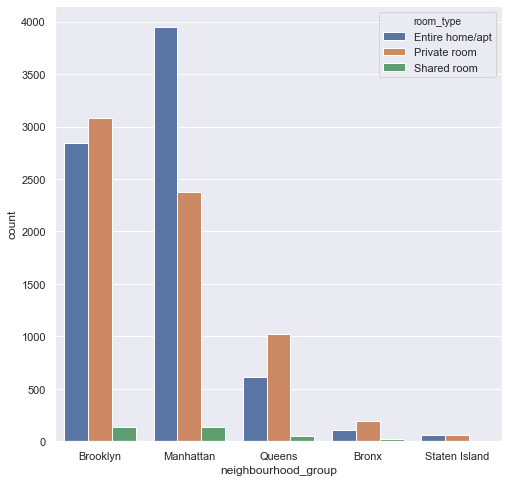

In [76]:
#Check neighbourhood_group and room_type count distribution
plt.figure(figsize = (8,8))
sns.countplot(x="neighbourhood_group",hue = 'room_type', data=dt)
plt.show()

**The distribution is almost similar to the train dataset. Therefore, the predictions should be commensurate as well**

In [77]:
##Replacing null values in host_name with Unknown
dt["host_name"] = dt["host_name"].fillna("Unknown")

In [78]:
#Replacing null values in name with Unknown
dt["name"] = dt["name"].fillna("Unknown")

In [79]:
#Replacing null values in reviews_per_month with 0
dt["reviews_per_month"] = dt["reviews_per_month"].fillna(0)

In [80]:
#ONE HOT ENCODE neighbourhood_group
#getting dummies for room_type
test_room_dummies = pd.get_dummies(dt.room_type)
test_room_dummies
#merging the dummies with the dataframe
test_merged_rooms = pd.concat([dt,test_room_dummies], axis = 'columns')
#dropping room_type column and a dummy variable to avoid the dummy variable trap
test_merged_rooms.drop(['room_type', 'Shared room'], axis = 'columns', inplace = True)
test_merged_rooms

id                                               name    host_id  \
0       1525602                    Perfect Temporary Brooklyn Home    1200603   
1      30430185                        BIG APPLE - COMFY KING ROOM  224414117   
2      21354525  Cozy Brooklyn Heights Getaway w/ Manhattan Access   11743513   
3      35995074  Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...    4128829   
4      34392081  Hello! This is a very cozy space in Williamsburg.  259630588   
...         ...                                                ...        ...   
14664  27730191  Stylish, Artsy & Comfortable Stay Near the Ocean.   32215382   
14665  29676417                     New York Moments (Ladies Only)  223248121   
14666   1813829                Enjoy Harlem Renassiance Sunny Room    9501531   
14667  25017403                                       Glamping Van   10407935   
14668  19057073    Bright central designer's apt - steps to train!     538008   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0        Andrea            Brooklyn       Crown Heights  40.66751  -73.95867   
1       Gabriel           Manhattan      Hell's Kitchen  40.75655  -73.99690   
2         Henry            Brooklyn    Brooklyn Heights  40.69252  -73.99121   
3          Sara              Queens    Ditmars Steinway  40.77292  -73.90101   
4         Alina            Brooklyn        Williamsburg  40.71863  -73.94980   
...         ...                 ...                 ...       ...        ...   
14664    Polina            Brooklyn      Sheepshead Bay  40.59446  -73.94289   
14665     Julia           Manhattan            Kips Bay  40.74319  -73.98074   
14666     Andre           Manhattan              Harlem  40.82519  -73.94530   
14667      Meng           Manhattan              Nolita  40.72238  -73.99466   
14668     Deren            Brooklyn  Bedford-Stuyvesant  40.68932  -73.94947   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   2                121  2019-05-31               1.70   
1                   1                 18  2019-05-05               2.49   
2                   1                 87  2019-06-16               4.29   
3                   9                  0         NaN               0.00   
4                   1                 28  2019-06-26              14.00   
...               ...                ...         ...                ...   
14664               2                  1  2019-05-20               0.59   
14665               2                  1  2019-01-01               0.16   
14666               1                 93  2019-07-02               1.34   
14667               1                 15  2019-05-27               1.12   
14668               5                 23  2019-06-17               0.95   

       calculated_host_listings_count  availability_365  Entire home/apt  \
0                                   1                39                1   
1                                  30               364                0   
2                                   1               108                0   
3                                   2               365                0   
4                                   2                20                0   
...                               ...               ...              ...   
14664                               1                36                1   
14665                               1               365                0   
14666                               3               358                0   
14667                               8                34                1   
14668                               1                 1                1   

       Private room  
0                 0  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
14664             0  
14665             0  
14666             1  
14667             0  
14668             0  



In [81]:
#getting dummies for neighbourhood_group
test_ngroup_dummies = pd.get_dummies(dt.neighbourhood_group)
test_ngroup_dummies
#merging the dummies with the dataframe
test_merged_ngroup = pd.concat([test_merged_rooms, test_ngroup_dummies], axis = 'columns')
test_merged_ngroup
#drop neighbourhood_group and a dummy variable(Staten Island)
test_merged_ngroup.drop(['neighbourhood_group','Staten Island'], axis = 'columns', inplace = True)
test_merged_ngroup.head(2)

id                             name    host_id host_name  \
0   1525602  Perfect Temporary Brooklyn Home    1200603    Andrea   
1  30430185      BIG APPLE - COMFY KING ROOM  224414117   Gabriel   

    neighbourhood  latitude  longitude  minimum_nights  number_of_reviews  \
0   Crown Heights  40.66751  -73.95867               2                121   
1  Hell's Kitchen  40.75655  -73.99690               1                 18   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2019-05-31               1.70                               1   
1  2019-05-05               2.49                              30   

   availability_365  Entire home/apt  Private room  Bronx  Brooklyn  \
0                39                1             0      0         1   
1               364                0             1      0         0   

   Manhattan  Queens  
0          0       0  
1          1       0

In [82]:
test_merged_ngroup = test_merged_ngroup[['id', 'name', 'host_id',
       'host_name','Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'neighbourhood', 'latitude', 'longitude',
       'Entire home/apt', 'Private room', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
test_merged_ngroup.drop(['name','host_name','neighbourhood'],axis =1, inplace = True)
test_merged_ngroup.head(2)

id    host_id  Bronx  Brooklyn  Manhattan  Queens  latitude  \
0   1525602    1200603      0         1          0       0  40.66751   
1  30430185  224414117      0         0          1       0  40.75655   

   longitude  Entire home/apt  Private room  minimum_nights  \
0  -73.95867                1             0               2   
1  -73.99690                0             1               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                121               1.70                               1   
1                 18               2.49                              30   

   availability_365  
0                39  
1               364

In [83]:
x_train.head(2)

id   host_id  Bronx  Brooklyn  Manhattan  Queens  latitude  longitude  \
0  5728806   4271676      0         0          1       0  40.72217  -73.99481   
1  2243769  11460768      0         0          1       0  40.80020  -73.96045   

   Entire home/apt  Private room  minimum_nights  number_of_reviews  \
0                0             1               7                  3   
1                1             0               1                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.06                               3                 0  
1               0.00                               1                 0

In [84]:
#test_merged_ngroup = scaler.transform(test_merged_ngroup)

In [134]:
#test_y_pred = model.predict(test_merged_ngroup)
test_y_pred = 0.30*grid_xgb.predict(test_merged_ngroup) + 0.70*model.predict(test_merged_ngroup)

In [135]:
test_y_pred

array([141.54665221, 178.81600037,  83.82286779, ...,  58.08251376,
       220.8317006 , 141.46777213])

In [136]:
submission_file = pd.DataFrame(test_y_pred,index = dt_ID,columns = ['price'])

In [137]:
submission_file.head()

price
id                  
1525602   141.546652
30430185  178.816000
21354525   83.822868
35995074   25.715579
34392081   73.657887

In [138]:
submission_file.to_csv('submission_file_hackatoons.csv', index=True)